In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu
from statsmodels.stats.multitest import multipletests
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [25]:
%matplotlib inline

In [27]:
#Load GP2 data
#G2P data
GP2_data_PSC = pd.read_csv('./results/GP2_data_PSC.csv', index_col=0)
GP2_data_BSPSPC = pd.read_csv('./results/GP2_data_BSPSPC.csv', index_col=0)

In [28]:
#Load rarefied genus counts
ab = pd.read_csv('./results/norm_merged_genus_abundances_filtered.csv', index_col=0)

In [5]:
GP2_data_PSC

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
new_id                                                                      
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0003         9.223         1.569         1.260         0.900   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0022         4.513         8.238         2.030        12.275   
2020-023_PSC_0024        10.978        12.949         5.973        11.817   
...                         ...           ...           ...           ...   
2020-023_PSC_0779         5.760         4.430         5.320         2.740   
2020-023_PSC_0780         1.750         0.000         4.690         0.000   
2020-023_PSC_0781        23.030         1.080         9.160         2.240   
2020-023_PSC_0782         1.400         1.260         2.550         3.190   
2020-023_PSC_0784         0.000         0.000         3.640         1.320   

                     PR3  
new_id                    
2020-023_PSC_0001   2.20  
2020-023_PSC_0003   2.20  
2020-023_PSC_0010   2.20  
2020-023_PSC_0022  20.40  
2020-023_PSC_0024   2.20  
...                  ...  
2020-023_PSC_0779   4.68  
2020-023_PSC_0780   2.78  
2020-023_PSC_0781   6.77  
2020-023_PSC_0782   1.77  
2020-023_PSC_0784   2.43  

[734 rows x 5 columns]

In [6]:
GP2_data_BSPSPC

GP2_Iso1_IgA  GP2_Iso1_IgG  GP2_Iso4_IgA  GP2_Iso4_IgG  \
new_id                                                                      
2020-023_BSP_0011          1.05          2.06          4.03          3.61   
2020-023_BSP_0041          1.31          1.74          1.10          1.91   
2020-023_BSP_0055          0.00          1.90          1.77          3.56   
2020-023_BSP_0096          1.67          4.19          1.95          3.91   
2020-023_BSP_0119          0.00          1.35          1.32          2.45   
2020-023_BSP_0132          1.37          2.43          2.34          4.08   
2020-023_BSP_0173          1.37          2.30          2.86          4.03   
2020-023_BSP_0198          3.50         13.92          3.31          6.48   
2020-023_BSP_0217          1.66          1.66          1.77          5.60   
2020-023_BSP_0249          1.96          3.94          5.88          7.04   
2020-023_BSP_0253          6.88          1.86          4.74          2.83   
2020-023_BSP_0261          1.41          3.28          3.62          3.43   
2020-023_BSP_0296          1.02          2.55          2.28          5.23   
2020-023_BSP_0312          0.99          1.24          2.92          4.00   
2020-023_BSP_0327          1.11          2.60          1.65          3.30   
2020-023_BSP_0348          2.23          2.68          3.19         14.38   
2020-023_BSP_0361          1.18          5.55          2.74         15.88   
2020-023_BSP_0379          2.23          3.07          3.76          6.75   
2020-023_BSP_0381          0.00          1.27          2.51          3.08   
2020-023_BSP_0388          0.00          1.18          1.08          3.05   
2020-023_BSP_0414          0.00          2.30          1.02         10.00   
2020-023_BSP_0421          1.19          0.00          1.43          3.45   
2020-023_BSP_0432          2.20          3.81          6.31          6.57   
2020-023_BSP_0438          1.25          2.53          3.70          8.49   
2020-023_BSP_0442          1.14          2.26          3.74          5.75   
2020-023_BSP_0450          6.60          5.90          7.74          6.15   
2020-023_BSP_0461          1.25          2.68          2.62          3.02   
2020-023_BSP_0464          0.00          2.08          1.48          2.17   
2020-023_BSP_0471          0.99          2.26          1.94          6.54   
2020-023_BSP_0473          0.00          2.01          1.59          8.53   
2020-023_BSP_0478          0.00          1.86          3.85          5.23   
2020-023_BSP_0483          0.00          1.38          1.71          2.54   
2020-023_BSP_0496          1.41          1.58          5.22          4.55   
2020-023_BSP_0544          1.88          1.45          2.50          4.07   
2020-023_BSP_0549          0.00          3.95          1.53         10.17   
2020-023_BSP_0566          3.59          1.50          3.33          3.95   
2020-023_BSP_0568          2.94          2.30          7.81          8.61   
2020-023_BSP_0592          1.95          1.31          2.07          4.04   
2020-023_BSP_0593          2.80          1.65         11.29          8.16   
2020-023_BSP_0594          0.00          2.06          1.94          6.54   
2020-023_BSP_0756          1.95          6.17          1.77          9.19   
2020-023_BSP_0762          2.44          2.45          3.19          4.68   
2020-023_SPC_0034          1.46          2.91          3.00          9.28   
2020-023_SPC_0171          2.09          1.58          7.95          3.84   
2020-023_SPC_0189          1.11          7.90          2.68          8.82   
2020-023_SPC_0409          0.00          1.35          1.66          7.30   
2020-023_SPC_0480          1.95         10.38          2.93          8.16   
2020-023_SPC_0515          1.46         11.27          0.00         10.31   
2020-023_SPC_0726          1.47          2.60          3.97          4.80   
2020-023_SPC_0741          0.00          1.27          1.72          6.79   

              

In [7]:
# List of columns to test
columns_to_test = ['GP2_Iso1_IgG', 'GP2_Iso1_IgA', 'GP2_Iso4_IgG', 'GP2_Iso4_IgA', 'PR3']
# Perform Shapiro-Wilk test for each column
normality_results = {}
for column in columns_to_test:
    group1 = GP2_data_PSC[GP2_data_PSC[column] != 0][column].dropna()
    group2 = GP2_data_BSPSPC[GP2_data_BSPSPC[column] != 0][column].dropna()
    _, p_value_group1 = shapiro(group1)
    _, p_value_group2 = shapiro(group2)
    normality_results[column] = (p_value_group1, p_value_group2)

# Print p-values for each column
print("Shapiro-Wilk test results for normality:")
for column, (p_value_group1, p_value_group2) in normality_results.items():
    print(f"{column}: Group1 p-value = {p_value_group1}, Group2 p-value = {p_value_group2}")

Shapiro-Wilk test results for normality:
GP2_Iso1_IgG: Group1 p-value = 1.3044314098488826e-37, Group2 p-value = 2.072748417347725e-09
GP2_Iso1_IgA: Group1 p-value = 4.935850753868648e-38, Group2 p-value = 7.167152205056482e-08
GP2_Iso4_IgG: Group1 p-value = 2.0216813204507e-40, Group2 p-value = 0.0005530338967218995
GP2_Iso4_IgA: Group1 p-value = 7.227477089448109e-41, Group2 p-value = 1.332758870375983e-06
PR3: Group1 p-value = 0.0, Group2 p-value = 4.875117156188935e-05


In [8]:
# List of columns to test
columns_to_test = ['GP2_Iso1_IgG', 'GP2_Iso1_IgA', 'GP2_Iso4_IgG', 'GP2_Iso4_IgA', 'PR3']

# Perform Mann-Whitney U test for each column
mannwhitneyu_results = {}
for column in columns_to_test:
    group1 = GP2_data_PSC[GP2_data_PSC[column] != 0][column].dropna()
    group2 = GP2_data_BSPSPC[GP2_data_BSPSPC[column] != 0][column].dropna()
    _, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    mannwhitneyu_results[column] = p_value

# Print p-values for each column
print("Mann-Whitney U test results:")
for column, p_value in mannwhitneyu_results.items():
    print(f"{column}: p-value = {p_value}")

Mann-Whitney U test results:
GP2_Iso1_IgG: p-value = 0.0012673251239810662
GP2_Iso1_IgA: p-value = 2.9795182692786916e-05
GP2_Iso4_IgG: p-value = 0.002721613357911637
GP2_Iso4_IgA: p-value = 0.44227873252485583
PR3: p-value = 0.09356304907893392


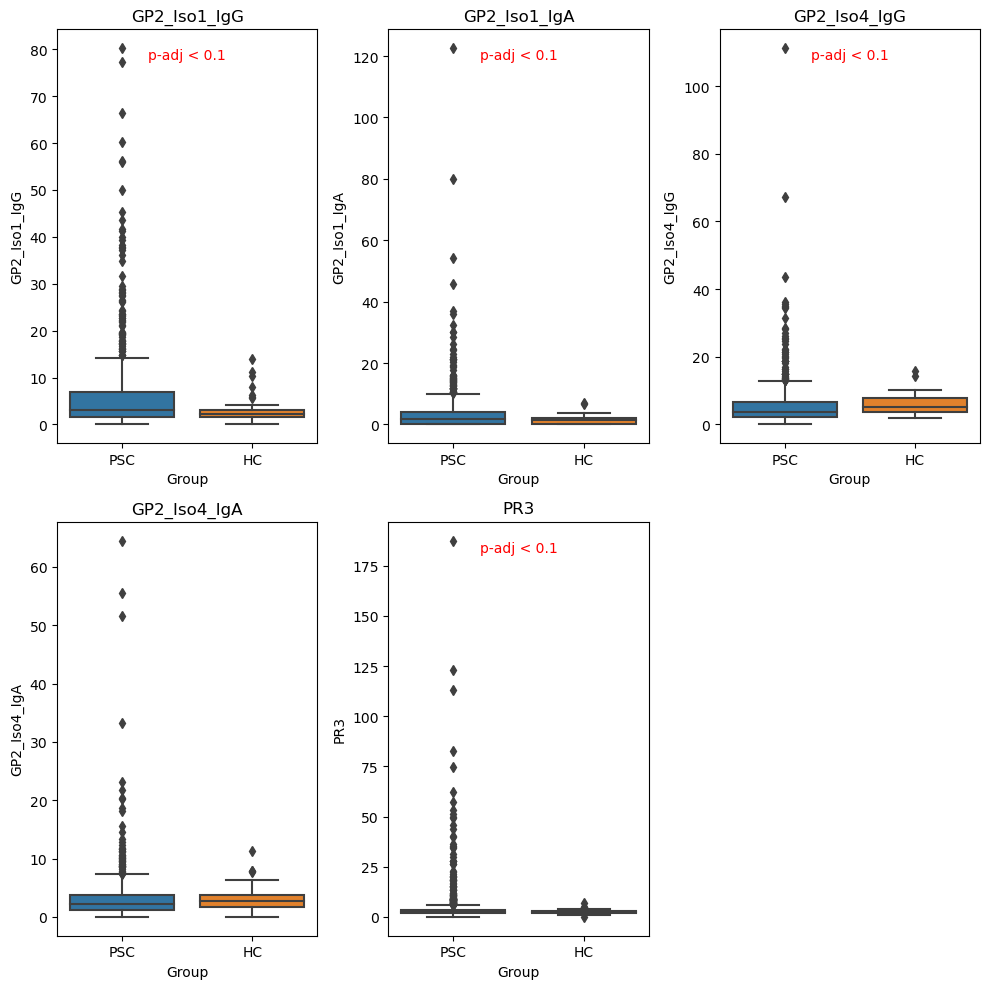

In [9]:
# Concatenate the dataframes and create a 'Group' column to differentiate PSC and BSPSPC
GP2_data_PSC['Group'] = 'PSC'
GP2_data_BSPSPC['Group'] = 'HC'
combined_data = pd.concat([GP2_data_PSC, GP2_data_BSPSPC])

# Initialize the figure
plt.figure(figsize=(10, 10))

# Iterate over each column and create a boxplot
for i, column in enumerate(columns_to_test, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Group', y=column, data=combined_data)
    plt.title(column)
    
    # Perform Mann-Whitney U test for the current column
    group1 = GP2_data_PSC[GP2_data_PSC[column] != 0][column].dropna()
    group2 = GP2_data_BSPSPC[GP2_data_BSPSPC[column] != 0][column].dropna()
    _, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    # Calculate adjusted p-value (padj) using Benjamini-Hochberg procedure
    p_values = [p_value]
    reject, padj, _, _ = multipletests(p_values, method='fdr_bh')
    
    # Add text indicating significance level
    if padj < 0.1:
        plt.text(0.5, combined_data[column].max(), 'p-adj < 0.1', ha='center', va='top', color='red')

# Adjust layout
plt.tight_layout()

plt.savefig('./results/GP2_wilcoxon.png')
# Show plot
plt.show()

In [29]:
GP2_data_PSC['Group'] = 'PSC'
GP2_data_BSPSPC['Group'] = 'BSPSPC'


In [30]:
GP2_data = pd.concat([GP2_data_PSC, GP2_data_BSPSPC], axis=0)

In [31]:
GP2_data

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
new_id                                                                      
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0003         9.223         1.569         1.260         0.900   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0022         4.513         8.238         2.030        12.275   
2020-023_PSC_0024        10.978        12.949         5.973        11.817   
...                         ...           ...           ...           ...   
2020-023_SPC_0409         1.350         0.000         7.300         1.660   
2020-023_SPC_0480        10.380         1.950         8.160         2.930   
2020-023_SPC_0515        11.270         1.460        10.310         0.000   
2020-023_SPC_0726         2.600         1.470         4.800         3.970   
2020-023_SPC_0741         1.270         0.000         6.790         1.720   

                     PR3   Group  
new_id                            
2020-023_PSC_0001   2.20     PSC  
2020-023_PSC_0003   2.20     PSC  
2020-023_PSC_0010   2.20     PSC  
2020-023_PSC_0022  20.40     PSC  
2020-023_PSC_0024   2.20     PSC  
...                  ...     ...  
2020-023_SPC_0409   1.71  BSPSPC  
2020-023_SPC_0480   2.85  BSPSPC  
2020-023_SPC_0515   1.35  BSPSPC  
2020-023_SPC_0726   2.33  BSPSPC  
2020-023_SPC_0741   1.91  BSPSPC  

[784 rows x 6 columns]

In [13]:
ab

C__Alphaproteobacteria  C__Deltaproteobacteria  \
2020-023_PSC_0001_srn                   134.0                    19.0   
2020-023_PSC_0006_srn                     8.0                    15.0   
2020-023_PSC_0007_srn                    17.0                     0.0   
2020-023_PSC_0010_srn                     0.0                     0.0   
2020-023_PSC_0015_srn                     4.0                     0.0   
...                                       ...                     ...   
2020-023_SPC_0189_stl                    44.0                     0.0   
2020-023_SPC_0409_stl                     0.0                     0.0   
2020-023_SPC_0515_stl                     0.0                     0.0   
2020-023_SPC_0726_stl                     0.0                     0.0   
2020-023_SPC_0741_stl                     0.0                     0.0   

                       F__Clostridiales_Incertae_Sedis_XII  \
2020-023_PSC_0001_srn                                  0.0   
2020-023_PSC_0006_srn                                  0.0   
2020-023_PSC_0007_srn                                  0.0   
2020-023_PSC_0010_srn                                  0.0   
2020-023_PSC_0015_srn                                  0.0   
...                                                    ...   
2020-023_SPC_0189_stl                                  0.0   
2020-023_SPC_0409_stl                                  0.0   
2020-023_SPC_0515_stl                                  0.0   
2020-023_SPC_0726_stl                                  0.0   
2020-023_SPC_0741_stl                                  9.0   

                       F__Coriobacteriaceae  F__Cryptomonadaceae  \
2020-023_PSC_0001_srn                   0.0                  0.0   
2020-023_PSC_0006_srn                   0.0                 27.0   
2020-023_PSC_0007_srn                   0.0                  8.0   
2020-023_PSC_0010_srn                   0.0                105.0   
2020-023_PSC_0015_srn                   0.0                  0.0   
...                                     ...                  ...   
2020-023_SPC_0189_stl                  37.0                  0.0   
2020-023_SPC_0409_stl                  17.0                  0.0   
2020-023_SPC_0515_stl                  16.0                  0.0   
2020-023_SPC_0726_stl                   2.0                  0.0   
2020-023_SPC_0741_stl                  11.0                  0.0   

                       F__Enterobacteriaceae  F__Erysipelotrichaceae  \
2020-023_PSC_0001_srn                    0.0                     0.0   
2020-023_PSC_0006_srn                    0.0                     0.0   
2020-023_PSC_0007_srn                    7.0                     0.0   
2020-023_PSC_0010_srn                    0.0                     0.0   
2020-023_PSC_0015_srn                    8.0                     0.0   
...                                      ...                     ...   
2020-023_SPC_0189_stl                    0.0                     2.0   
2020-023_SPC_0409_stl                    0.0                     8.0   
2020-023_SPC_0515_stl                   56.0                    55.0   
2020-023_SPC_0726_stl                    0.0                    15.0   
2020-023_SPC_0741_stl                    0.0                    14.0   

                       F__Lachnospiraceae  F__Porphyromonadaceae  \
2020-023_PSC_0001_srn                 0.0                    0.0   
2020-023_PSC_0006_srn               227.0                    0.0   
2020-023_PSC_0007_srn                21.0                    0.0   
2020-023_PSC_0010_srn                 0.0                    0.0   
2020-023_PSC_0015_srn                50.0                    0.0   
...                                   ...                    ...   
2020-023_SPC_0189_stl               333.0                    0.0   
2020-023_SPC_0409_stl               499.0                    0.0   
2020-023_SPC_0515_stl               747.0                    0.0   
2020-023_SPC_0726_stl               404

In [33]:
ab['Material'] = np.where(ab.index.str.contains('srn'), 'seren', 'stool')
ab['Group'] = np.where(ab.index.str.contains('PSC'), 'PSC', 'BSPSPC')

# For serum

In [15]:
ab_seren = ab[ab['Material'] == 'seren']
ab_seren = ab_seren.drop(columns = ['Material', 'Group'], axis=1)
ab_seren

C__Alphaproteobacteria  C__Deltaproteobacteria  \
2020-023_PSC_0001_srn                   134.0                    19.0   
2020-023_PSC_0006_srn                     8.0                    15.0   
2020-023_PSC_0007_srn                    17.0                     0.0   
2020-023_PSC_0010_srn                     0.0                     0.0   
2020-023_PSC_0015_srn                     4.0                     0.0   
...                                       ...                     ...   
2020-023_SPC_0409_srn                     0.0                     0.0   
2020-023_SPC_0480_srn                     0.0                     0.0   
2020-023_SPC_0515_srn                     0.0                     0.0   
2020-023_SPC_0726_srn                     0.0                   158.0   
2020-023_SPC_0741_srn                    42.0                     0.0   

                       F__Clostridiales_Incertae_Sedis_XII  \
2020-023_PSC_0001_srn                                  0.0   
2020-023_PSC_0006_srn                                  0.0   
2020-023_PSC_0007_srn                                  0.0   
2020-023_PSC_0010_srn                                  0.0   
2020-023_PSC_0015_srn                                  0.0   
...                                                    ...   
2020-023_SPC_0409_srn                                  0.0   
2020-023_SPC_0480_srn                                  0.0   
2020-023_SPC_0515_srn                                  0.0   
2020-023_SPC_0726_srn                                  0.0   
2020-023_SPC_0741_srn                                  0.0   

                       F__Coriobacteriaceae  F__Cryptomonadaceae  \
2020-023_PSC_0001_srn                   0.0                  0.0   
2020-023_PSC_0006_srn                   0.0                 27.0   
2020-023_PSC_0007_srn                   0.0                  8.0   
2020-023_PSC_0010_srn                   0.0                105.0   
2020-023_PSC_0015_srn                   0.0                  0.0   
...                                     ...                  ...   
2020-023_SPC_0409_srn                   0.0                  0.0   
2020-023_SPC_0480_srn                   0.0                  0.0   
2020-023_SPC_0515_srn                   0.0                  0.0   
2020-023_SPC_0726_srn                   0.0                  0.0   
2020-023_SPC_0741_srn                   0.0                  0.0   

                       F__Enterobacteriaceae  F__Erysipelotrichaceae  \
2020-023_PSC_0001_srn                    0.0                     0.0   
2020-023_PSC_0006_srn                    0.0                     0.0   
2020-023_PSC_0007_srn                    7.0                     0.0   
2020-023_PSC_0010_srn                    0.0                     0.0   
2020-023_PSC_0015_srn                    8.0                     0.0   
...                                      ...                     ...   
2020-023_SPC_0409_srn                    0.0                     0.0   
2020-023_SPC_0480_srn                   37.0                     0.0   
2020-023_SPC_0515_srn                    0.0                     0.0   
2020-023_SPC_0726_srn                    0.0                     0.0   
2020-023_SPC_0741_srn                    0.0                     0.0   

                       F__Lachnospiraceae  F__Porphyromonadaceae  \
2020-023_PSC_0001_srn                 0.0                    0.0   
2020-023_PSC_0006_srn               227.0                    0.0   
2020-023_PSC_0007_srn                21.0                    0.0   
2020-023_PSC_0010_srn                 0.0                    0.0   
2020-023_PSC_0015_srn                50.0                    0.0   
...                                   ...                    ...   
2020-023_SPC_0409_srn                 0.0                    0.0   
2020-023_SPC_0480_srn                 0.0                    0.0   
2020-023_SPC_0515_srn                 8.0                    0.0   
2020-023_SPC_0726_srn                 0

In [16]:
ab_seren.index = ab_seren.index.str.rstrip('_srn')

In [17]:
GP2_data['Group'] = (GP2_data['Group'] == 'BSPSPC').astype(int)


In [18]:
GP2_data_seren = GP2_data.loc[ab_seren.index]

In [19]:
ab_seren

C__Alphaproteobacteria  C__Deltaproteobacteria  \
2020-023_PSC_0001                   134.0                    19.0   
2020-023_PSC_0006                     8.0                    15.0   
2020-023_PSC_0007                    17.0                     0.0   
2020-023_PSC_0010                     0.0                     0.0   
2020-023_PSC_0015                     4.0                     0.0   
...                                   ...                     ...   
2020-023_SPC_0409                     0.0                     0.0   
2020-023_SPC_0480                     0.0                     0.0   
2020-023_SPC_0515                     0.0                     0.0   
2020-023_SPC_0726                     0.0                   158.0   
2020-023_SPC_0741                    42.0                     0.0   

                   F__Clostridiales_Incertae_Sedis_XII  F__Coriobacteriaceae  \
2020-023_PSC_0001                                  0.0                   0.0   
2020-023_PSC_0006                                  0.0                   0.0   
2020-023_PSC_0007                                  0.0                   0.0   
2020-023_PSC_0010                                  0.0                   0.0   
2020-023_PSC_0015                                  0.0                   0.0   
...                                                ...                   ...   
2020-023_SPC_0409                                  0.0                   0.0   
2020-023_SPC_0480                                  0.0                   0.0   
2020-023_SPC_0515                                  0.0                   0.0   
2020-023_SPC_0726                                  0.0                   0.0   
2020-023_SPC_0741                                  0.0                   0.0   

                   F__Cryptomonadaceae  F__Enterobacteriaceae  \
2020-023_PSC_0001                  0.0                    0.0   
2020-023_PSC_0006                 27.0                    0.0   
2020-023_PSC_0007                  8.0                    7.0   
2020-023_PSC_0010                105.0                    0.0   
2020-023_PSC_0015                  0.0                    8.0   
...                                ...                    ...   
2020-023_SPC_0409                  0.0                    0.0   
2020-023_SPC_0480                  0.0                   37.0   
2020-023_SPC_0515                  0.0                    0.0   
2020-023_SPC_0726                  0.0                    0.0   
2020-023_SPC_0741                  0.0                    0.0   

                   F__Erysipelotrichaceae  F__Lachnospiraceae  \
2020-023_PSC_0001                     0.0                 0.0   
2020-023_PSC_0006                     0.0               227.0   
2020-023_PSC_0007                     0.0                21.0   
2020-023_PSC_0010                     0.0                 0.0   
2020-023_PSC_0015                     0.0                50.0   
...                                   ...                 ...   
2020-023_SPC_0409                     0.0                 0.0   
2020-023_SPC_0480                     0.0                 0.0   
2020-023_SPC_0515                     0.0                 8.0   
2020-023_SPC_0726                     0.0                 0.0   
2020-023_SPC_0741                     0.0               295.0   

                   F__Porphyromonadaceae  F__Ruminococcaceae  ...  \
2020-023_PSC_0001                    0.0                66.0  ...   
2020-023_PSC_0006                    0.0                 0.0  ...   
2020-023_PSC_0007                    0.0                 1.0  ...   
2020-023_PSC_0010                    0.0                 0.0  ...   
2020-023_PSC_0015                    0.0                 0.0  ...   
...                                  ...                 ...  ...   
2020-023_SPC_0409                    0.0                 0.0  ...   
2020-023_SPC_0480                    0.0                 0.0  ...   
2020-023_SPC_0515                    0.0      

In [20]:
# log-transformation for ab_seren
ab_seren= ab_seren.apply(lambda x: np.log(x + 1))

In [21]:
ab_seren.columns

Index(['C__Alphaproteobacteria', 'C__Deltaproteobacteria',
       'F__Clostridiales_Incertae_Sedis_XII', 'F__Coriobacteriaceae',
       'F__Cryptomonadaceae', 'F__Enterobacteriaceae',
       'F__Erysipelotrichaceae', 'F__Lachnospiraceae', 'F__Porphyromonadaceae',
       'F__Ruminococcaceae', 'G__Acidaminococcus', 'G__Akkermansia',
       'G__Alistipes', 'G__Anaerostipes', 'G__Anaerotruncus', 'G__Anaerovorax',
       'G__Bacillus', 'G__Bacteroides', 'G__Barnesiella', 'G__Bifidobacterium',
       'G__Bilophila', 'G__Blautia', 'G__Butyricicoccus', 'G__Butyricimonas',
       'G__Catabacter', 'G__Clostridium_IV', 'G__Clostridium_XVIII',
       'G__Clostridium_XlVa', 'G__Clostridium_XlVb', 'G__Collinsella',
       'G__Coprobacter', 'G__Coprococcus', 'G__Corynebacterium',
       'G__Dialister', 'G__Dorea', 'G__Eggerthella', 'G__Escherichia.Shigella',
       'G__Faecalibacterium', 'G__Flavobacterium', 'G__Flavonifractor',
       'G__Fluviicola', 'G__Fusicatenibacter', 'G__Holdemanella',
      

In [22]:
# Substitute dots with underscores in column names to avoid errors in lm formula
ab_seren.columns = ab_seren.columns.str.replace('.', '_')

/tmp/ipykernel_539/1671243111.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ab_seren.columns = ab_seren.columns.str.replace('.', '_')


In [23]:
ab_seren.columns

Index(['C__Alphaproteobacteria', 'C__Deltaproteobacteria',
       'F__Clostridiales_Incertae_Sedis_XII', 'F__Coriobacteriaceae',
       'F__Cryptomonadaceae', 'F__Enterobacteriaceae',
       'F__Erysipelotrichaceae', 'F__Lachnospiraceae', 'F__Porphyromonadaceae',
       'F__Ruminococcaceae', 'G__Acidaminococcus', 'G__Akkermansia',
       'G__Alistipes', 'G__Anaerostipes', 'G__Anaerotruncus', 'G__Anaerovorax',
       'G__Bacillus', 'G__Bacteroides', 'G__Barnesiella', 'G__Bifidobacterium',
       'G__Bilophila', 'G__Blautia', 'G__Butyricicoccus', 'G__Butyricimonas',
       'G__Catabacter', 'G__Clostridium_IV', 'G__Clostridium_XVIII',
       'G__Clostridium_XlVa', 'G__Clostridium_XlVb', 'G__Collinsella',
       'G__Coprobacter', 'G__Coprococcus', 'G__Corynebacterium',
       'G__Dialister', 'G__Dorea', 'G__Eggerthella', 'G__Escherichia_Shigella',
       'G__Faecalibacterium', 'G__Flavobacterium', 'G__Flavonifractor',
       'G__Fluviicola', 'G__Fusicatenibacter', 'G__Holdemanella',
      

In [24]:
GP2_data_seren = GP2_data_seren.dropna()

In [25]:
GP2_data_seren

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0006         2.640         1.340         3.030         1.410   
2020-023_PSC_0007        10.060         3.280        14.370         3.550   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0015         2.560         0.000         3.560         0.000   
...                         ...           ...           ...           ...   
2020-023_SPC_0409         1.350         0.000         7.300         1.660   
2020-023_SPC_0480        10.380         1.950         8.160         2.930   
2020-023_SPC_0515        11.270         1.460        10.310         0.000   
2020-023_SPC_0726         2.600         1.470         4.800         3.970   
2020-023_SPC_0741         1.270         0.000         6.790         1.720   

                    PR3  Group  
2020-023_PSC_0001  2.20      0  
2020-023_PSC_0006  2.04      0  
2020-023_PSC_0007  2.93      0  
2020-023_PSC_0010  2.20      0  
2020-023_PSC_0015  3.27      0  
...                 ...    ...  
2020-023_SPC_0409  1.71      1  
2020-023_SPC_0480  2.85      1  
2020-023_SPC_0515  1.35      1  
2020-023_SPC_0726  2.33      1  
2020-023_SPC_0741  1.91      1  

[161 rows x 6 columns]

In [45]:
# Initialize an empty DataFrame to store the results
results_seren_Iso1_IgA = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_seren.columns:
    # Extract the data for the current column
    data = ab_seren[[column]]
    Iso1_IgA = GP2_data_seren[['GP2_Iso1_IgA', 'Group']]
    Iso1_IgA = Iso1_IgA[Iso1_IgA['GP2_Iso1_IgA'] != 0]
    data = data[data.index.isin(Iso1_IgA.index)]
    data = pd.concat([data, Iso1_IgA], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgA"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgA = result.params['GP2_Iso1_IgA']
    p_value_Iso1_IgA = result.pvalues['GP2_Iso1_IgA']
    
    
    # Append the results to the DataFrame
    results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)

/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum

/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-package

/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-package

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_I

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.450453
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/269569347.py:27: FutureW

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/269569347.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgA = results_seren_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with l

In [49]:
results_seren_Iso1_IgA.index = results_seren_Iso1_IgA['Genus']

In [46]:
# Initialize an empty DataFrame to store the results
results_seren_Iso4_IgG = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_seren.columns:
    # Extract the data for the current column
    data = ab_seren[[column]]
    Iso4_IgG = GP2_data_seren[['GP2_Iso4_IgG', 'Group']]
    Iso4_IgG = Iso4_IgG[Iso4_IgG['GP2_Iso4_IgG'] != 0]
    data = data[data.index.isin(Iso4_IgG.index)]
    data = pd.concat([data, Iso4_IgG], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso4_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso4_IgG = result.params['GP2_Iso4_IgG']
    p_value_Iso4_IgG = result.pvalues['GP2_Iso4_IgG']
    
    
    # Append the results to the DataFrame
    results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)

/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximu

/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso4_IgG = results_seren_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/2899355804.py:27: FutureWarning: The frame.append method is

In [50]:
results_seren_Iso4_IgG.index = results_seren_Iso4_IgG['Genus']

In [47]:
# Initialize an empty DataFrame to store the results
results_seren_Iso1_IgG = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_seren.columns:
    # Extract the data for the current column
    data = ab_seren[[column]]
    Iso1_IgG = GP2_data_seren[['GP2_Iso1_IgG', 'Group']]
    Iso1_IgG = Iso1_IgG[Iso1_IgG['GP2_Iso1_IgG'] != 0]
    data = data[data.index.isin(Iso1_IgG.index)]
    data = pd.concat([data, Iso1_IgG], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgG = result.params['GP2_Iso1_IgG']
    p_value_Iso1_IgG = result.pvalues['GP2_Iso1_IgG']
    
    # Append the results to the DataFrame
    results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)

/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_valu

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWa

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWa

/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(ms

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/1135338874.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_Iso1_IgG = results_seren_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)


In [51]:
results_seren_Iso1_IgG.index = results_seren_Iso1_IgG['Genus']

In [48]:
# Initialize an empty DataFrame to store the results
results_seren_PR3 = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_seren.columns:
    # Extract the data for the current column
    data = ab_seren[[column]]
    PR3 = GP2_data_seren[['PR3', 'Group']]
    PR3 = PR3[PR3['PR3'] != 0]
    data = data[data.index.isin(PR3.index)]
    data = pd.concat([data, PR3], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ PR3"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_PR3 = result.params['PR3']
    p_value_PR3 = result.pvalues['PR3']
    
    # Append the results to the DataFrame
    results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)

/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-p

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2055: UserWarning: The random effects covariance matrix is singular.
  warnings.warn(_warn_cov_sing)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.333286
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_va

/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-p

/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-p

/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/tmp/ipykernel_561/3638006961.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_seren_PR3 = results_seren_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: R

In [52]:
results_seren_PR3.index = results_seren_PR3['Genus']

In [44]:
results_seren_PR3

Genus  GP2_Iso1_IgA_assoc  \
0                C__Alphaproteobacteria           -0.016718   
1                C__Deltaproteobacteria           -0.015274   
2   F__Clostridiales_Incertae_Sedis_XII           -0.002647   
3                  F__Coriobacteriaceae           -0.000737   
4                   F__Cryptomonadaceae           -0.013314   
..                                  ...                 ...   
71                     O__Clostridiales            0.005768   
72                        P__Firmicutes           -0.004115   
73                     P__Parcubacteria            0.002984   
74                    P__Proteobacteria            0.016690   
75                    P__Proteobacteria                 NaN   

    GP2_Iso1_IgA_P-Value  GP2_Iso4_IgG_assoc  GP2_Iso4_IgG_P-Value  PR3_assoc  \
0               0.236990           -0.021589              0.236990        NaN   
1               0.933396           -0.001484              0.933396        NaN   
2               0.948329            0.000414              0.948329        NaN   
3               0.595816           -0.001161              0.595816        NaN   
4               0.003292           -0.041837              0.003292        NaN   
..                   ...                 ...                   ...        ...   
71              0.383406           -0.015388              0.383406        NaN   
72              0.577532           -0.008468              0.577532        NaN   
73              0.101113           -0.022487              0.101113        NaN   
74              0.036302           -0.034836              0.036302        NaN   
75                   NaN                 NaN                   NaN   0.037777   

    PR3_P-Value  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
71          NaN  
72          NaN  
73          NaN  
74          NaN  
75     0.659134  

[76 rows x 7 columns]

In [56]:
results_seren_all = pd.concat([results_seren_Iso1_IgG[['GP2_Iso1_IgG_assoc']], results_seren_Iso1_IgA[['GP2_Iso1_IgA_assoc']],results_seren_Iso4_IgG[['GP2_Iso4_IgG_assoc']], results_seren_PR3[['PR3_assoc']]], axis=1)

In [58]:
results_seren_all.to_csv('./results/results_seren_all_mlm.csv', index = True)

In [57]:
results_seren_all

GP2_Iso1_IgG_assoc  GP2_Iso1_IgA_assoc  \
Genus                                                                         
C__Alphaproteobacteria                        -0.010455           -0.016056   
C__Deltaproteobacteria                        -0.002723           -0.016281   
F__Clostridiales_Incertae_Sedis_XII           -0.001099           -0.002513   
F__Coriobacteriaceae                          -0.000570           -0.001879   
F__Cryptomonadaceae                           -0.032330           -0.022186   
...                                                 ...                 ...   
O__Bacteroidales                               0.000353            0.015376   
O__Clostridiales                               0.001366           -0.001837   
P__Firmicutes                                  0.000297           -0.010132   
P__Parcubacteria                              -0.001804           -0.001197   
P__Proteobacteria                             -0.016581            0.012689   

                                     GP2_Iso4_IgG_assoc  PR3_assoc  
Genus                                                               
C__Alphaproteobacteria                        -0.023062  -0.035662  
C__Deltaproteobacteria                        -0.002896  -0.029071  
F__Clostridiales_Incertae_Sedis_XII            0.000180  -0.000178  
F__Coriobacteriaceae                          -0.001223  -0.000094  
F__Cryptomonadaceae                           -0.043021  -0.017167  
...                                                 ...        ...  
O__Bacteroidales                              -0.002383  -0.002864  
O__Clostridiales                              -0.014877  -0.021581  
P__Firmicutes                                 -0.008828  -0.064474  
P__Parcubacteria                              -0.022222  -0.050066  
P__Proteobacteria                             -0.033353   0.037777  

[75 rows x 4 columns]

# For stool

In [34]:
ab_stool = ab[ab['Material'] == 'stool']
ab_stool = ab_stool.drop(columns = ['Material', 'Group'], axis=1)
ab_stool

C__Alphaproteobacteria  C__Deltaproteobacteria  \
2020-023_PSC_0001_stl                     0.0                     0.0   
2020-023_PSC_0002_stl                     0.0                     0.0   
2020-023_PSC_0003_stl                     2.0                     0.0   
2020-023_PSC_0005_stl                     0.0                     0.0   
2020-023_PSC_0006_stl                    10.0                     0.0   
...                                       ...                     ...   
2020-023_SPC_0189_stl                    44.0                     0.0   
2020-023_SPC_0409_stl                     0.0                     0.0   
2020-023_SPC_0515_stl                     0.0                     0.0   
2020-023_SPC_0726_stl                     0.0                     0.0   
2020-023_SPC_0741_stl                     0.0                     0.0   

                       F__Clostridiales_Incertae_Sedis_XII  \
2020-023_PSC_0001_stl                                  5.0   
2020-023_PSC_0002_stl                                  0.0   
2020-023_PSC_0003_stl                                  5.0   
2020-023_PSC_0005_stl                                  7.0   
2020-023_PSC_0006_stl                                  9.0   
...                                                    ...   
2020-023_SPC_0189_stl                                  0.0   
2020-023_SPC_0409_stl                                  0.0   
2020-023_SPC_0515_stl                                  0.0   
2020-023_SPC_0726_stl                                  0.0   
2020-023_SPC_0741_stl                                  9.0   

                       F__Coriobacteriaceae  F__Cryptomonadaceae  \
2020-023_PSC_0001_stl                   0.0                  0.0   
2020-023_PSC_0002_stl                   0.0                  0.0   
2020-023_PSC_0003_stl                  10.0                  0.0   
2020-023_PSC_0005_stl                  10.0                  0.0   
2020-023_PSC_0006_stl                 193.0                  0.0   
...                                     ...                  ...   
2020-023_SPC_0189_stl                  37.0                  0.0   
2020-023_SPC_0409_stl                  17.0                  0.0   
2020-023_SPC_0515_stl                  16.0                  0.0   
2020-023_SPC_0726_stl                   2.0                  0.0   
2020-023_SPC_0741_stl                  11.0                  0.0   

                       F__Enterobacteriaceae  F__Erysipelotrichaceae  \
2020-023_PSC_0001_stl                    0.0                     0.0   
2020-023_PSC_0002_stl                    0.0                     0.0   
2020-023_PSC_0003_stl                  315.0                    45.0   
2020-023_PSC_0005_stl                    8.0                    24.0   
2020-023_PSC_0006_stl                    0.0                    21.0   
...                                      ...                     ...   
2020-023_SPC_0189_stl                    0.0                     2.0   
2020-023_SPC_0409_stl                    0.0                     8.0   
2020-023_SPC_0515_stl                   56.0                    55.0   
2020-023_SPC_0726_stl                    0.0                    15.0   
2020-023_SPC_0741_stl                    0.0                    14.0   

                       F__Lachnospiraceae  F__Porphyromonadaceae  \
2020-023_PSC_0001_stl               593.0                    0.0   
2020-023_PSC_0002_stl                42.0                    0.0   
2020-023_PSC_0003_stl               233.0                    0.0   
2020-023_PSC_0005_stl               240.0                    0.0   
2020-023_PSC_0006_stl               508.0                    0.0   
...                                   ...                    ...   
2020-023_SPC_0189_stl               333.0                    0.0   
2020-023_SPC_0409_stl               499.0                    0.0   
2020-023_SPC_0515_stl               747.0                    0.0   
2020-023_SPC_0726_stl               404

In [37]:
ab_stool.index = ab_stool.index.str.rstrip('_stl')

In [38]:
GP2_data_stool = GP2_data.loc[ab_stool.index]

In [39]:
# log-transformation for ab_stool
ab_stool= ab_stool.apply(lambda x: np.log(x + 1))

In [40]:
ab_stool.columns = ab_stool.columns.str.replace('.', '_')

/tmp/ipykernel_491/2548575168.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ab_stool.columns = ab_stool.columns.str.replace('.', '_')


In [64]:
GP2_data_stool = GP2_data_stool.dropna()

In [65]:
# Initialize an empty DataFrame to store the results
results_stool_Iso1_IgA = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_stool.columns:
    # Extract the data for the current column
    data = ab_stool[[column]]
    Iso1_IgA = GP2_data_stool[['GP2_Iso1_IgA', 'Group']]
    Iso1_IgA = Iso1_IgA[Iso1_IgA['GP2_Iso1_IgA'] != 0]
    data = data[data.index.isin(Iso1_IgA.index)]
    data = pd.concat([data, Iso1_IgA], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgA"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgA = result.params['GP2_Iso1_IgA']
    p_value_Iso1_IgA = result.pvalues['GP2_Iso1_IgA']
    
    # Append the results to the DataFrame
    results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.763526
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.293168
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Gen

/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/tmp/ipykernel_561/4040922696.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgA = results_stool_Iso1_IgA.append({'Genus': column, 'GP2_Iso1_IgA_assoc': coef_Iso1_IgA, 'GP2_Iso1_IgA_P-Value': p_value_Iso1_IgA}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packa

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.754205
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/

In [66]:
results_stool_Iso1_IgA.index = results_stool_Iso1_IgA['Genus']

In [67]:
# Initialize an empty DataFrame to store the results
results_stool_Iso4_IgG = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_stool
for column in ab_stool.columns:
    # Extract the data for the current column
    data = ab_stool[[column]]
    Iso4_IgG = GP2_data_stool[['GP2_Iso4_IgG', 'Group']]
    Iso4_IgG = Iso4_IgG[Iso4_IgG['GP2_Iso4_IgG'] != 0]
    data = data[data.index.isin(Iso4_IgG.index)]
    data = pd.concat([data, Iso4_IgG], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso4_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso4_IgG = result.params['GP2_Iso4_IgG']
    p_value_Iso4_IgG = result.pvalues['GP2_Iso4_IgG']
    
    
    # Append the results to the DataFrame
    results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4

/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: Conv

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.428515
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4178269884.py:27: Future

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is

/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/tmp/ipykernel_561/4178269884.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso4_IgG = results_stool_Iso4_IgG.append({'Genus': column, 'GP2_Iso4_IgG_assoc': coef_Iso4_IgG, 'GP2_Iso4_IgG_P-Value': p_value_Iso4_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packa

In [68]:
results_stool_Iso4_IgG.index = results_stool_Iso4_IgG['Genus']

In [69]:
# Initialize an empty DataFrame to store the results
results_stool_Iso1_IgG = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_stool
for column in ab_stool.columns:
    # Extract the data for the current column
    data = ab_stool[[column]]
    Iso1_IgG = GP2_data_stool[['GP2_Iso1_IgG', 'Group']]
    Iso1_IgG = Iso1_IgG[Iso1_IgG['GP2_Iso1_IgG'] != 0]
    data = data[data.index.isin(Iso1_IgG.index)]
    data = pd.concat([data, Iso1_IgG], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ GP2_Iso1_IgG"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_Iso1_IgG = result.params['GP2_Iso1_IgG']
    p_value_Iso1_IgG = result.pvalues['GP2_Iso1_IgG']
    
    # Append the results to the DataFrame
    results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarn

/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_I

/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is de

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus

/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_I

/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_Iso1_IgG}, ignore_index=True)
/tmp/ipykernel_561/381475735.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_Iso1_IgG = results_stool_Iso1_IgG.append({'Genus': column, 'GP2_Iso1_IgG_assoc': coef_Iso1_IgG, 'GP2_Iso1_IgG_P-Value': p_value_I

In [70]:
results_stool_Iso1_IgG.index = results_stool_Iso1_IgG['Genus']

In [71]:
# Initialize an empty DataFrame to store the results
results_stool_PR3 = pd.DataFrame(columns=['Genus'])

# Loop through each column in ab_seren
for column in ab_stool.columns:
    # Extract the data for the current column
    data = ab_stool[[column]]
    PR3 = GP2_data_stool[['PR3', 'Group']]
    PR3 = PR3[PR3['PR3'] != 0]
    data = data[data.index.isin(PR3.index)]
    data = pd.concat([data, PR3], axis=1)
    data = data.dropna()
    
    # Construct the formula 
    formula = f"{column} ~ PR3"
    
    # Fit the mixed linear model
    model = MixedLM.from_formula(formula, data=data, groups=data['Group'])
    result = model.fit()
    
    # Extract and store the coefficient and p-value
    coef_PR3 = result.params['PR3']
    p_value_PR3 = result.pvalues['PR3']
    
    # Append the results to the DataFrame
    results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/en

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_inde

/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:1635: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warni

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/conda/envs/

/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_value_PR3}, ignore_index=True)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regres

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 0.476957
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_561/592208664.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_stool_PR3 = results_stool_PR3.append({'Genus': column, 'PR3_assoc': coef_PR3, 'PR3_P-Value': p_val

In [72]:
results_stool_PR3.index = results_stool_PR3['Genus']

In [73]:
results_stool_all = pd.concat([results_stool_Iso1_IgG[['GP2_Iso1_IgG_assoc']], results_stool_Iso1_IgA[['GP2_Iso1_IgA_assoc']],results_stool_Iso4_IgG[['GP2_Iso4_IgG_assoc']], results_stool_PR3[['PR3_assoc']]], axis=1)

In [74]:
results_stool_all.to_csv('./results/results_stool_all_mlm.csv', index = True)

In [75]:
results_stool_all

GP2_Iso1_IgG_assoc  GP2_Iso1_IgA_assoc  \
Genus                                                                         
C__Alphaproteobacteria                        -0.002363           -0.005462   
C__Deltaproteobacteria                         0.000045           -0.000000   
F__Clostridiales_Incertae_Sedis_XII           -0.002206            0.000404   
F__Coriobacteriaceae                          -0.008587           -0.012886   
F__Cryptomonadaceae                           -0.000000           -0.000000   
...                                                 ...                 ...   
O__Bacteroidales                              -0.020408           -0.013557   
O__Clostridiales                              -0.001581           -0.016229   
P__Firmicutes                                 -0.013836           -0.023238   
P__Parcubacteria                               0.000089           -0.000219   
P__Proteobacteria                             -0.003756           -0.002183   

                                     GP2_Iso4_IgG_assoc  PR3_assoc  
Genus                                                               
C__Alphaproteobacteria                         0.006245  -0.003755  
C__Deltaproteobacteria                         0.000540  -0.000009  
F__Clostridiales_Incertae_Sedis_XII           -0.003258  -0.005817  
F__Coriobacteriaceae                           0.000869  -0.017588  
F__Cryptomonadaceae                           -0.000000  -0.000000  
...                                                 ...        ...  
O__Bacteroidales                               0.005507  -0.015694  
O__Clostridiales                               0.033684  -0.030788  
P__Firmicutes                                  0.000456  -0.004380  
P__Parcubacteria                              -0.000296  -0.000309  
P__Proteobacteria                              0.000473  -0.012543  

[75 rows x 4 columns]

# Barplots for GP2 association and diff abund results

In [2]:
#Load mlr data
results_stool_all = pd.read_csv('./results/results_stool_all_mlm.csv', index_col=0)
results_seren_all = pd.read_csv('./results/results_seren_all_mlm.csv', index_col=0)

In [3]:
#load results of differential abundance comparison
res_prim_stool = pd.read_csv( "./results/2020-023_res_prim_stool.csv", index_col=0)
res_prim_seren = pd.read_csv( "./results/2020-023_res_prim_seren.csv", index_col=0)

In [4]:
#load relative abundance 
rel_ab = pd.read_csv( "./results/relative_abundance_avrg.csv", index_col=0)

In [5]:
rel_ab = rel_ab.T

In [6]:
rel_ab = rel_ab*100

In [7]:
rel_ab.index= rel_ab.index.str.replace('.', '_')

/tmp/ipykernel_491/1719783919.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rel_ab.index= rel_ab.index.str.replace('.', '_')


In [8]:
rel_ab

Combined            BSPSPC_seren  BSPSPC_stool  PSC_seren  PSC_stool
G__Bacteroides          4.126222     19.014468   0.834828  24.830429
G__Flavobacterium       0.865778      0.000000  15.433448   0.007193
G__Alistipes            2.291111      7.409149   0.365862   5.795712
K__Bacteria             4.473333      1.361489   9.074138   0.331306
F__Lachnospiraceae      3.043556      5.006596   0.911379   4.473801
...                          ...           ...        ...        ...
G__Yokenella            0.000000      0.000000   0.000000   0.000019
G__Mangrovibacter       0.000000      0.000000   0.000000   0.000019
G__Lachnospira          0.000000      0.000000   0.000000   0.000019
G__Geothrix             0.000000      0.000000   0.000000   0.000019
G__Gallicola            0.000000      0.000000   0.000000   0.000019

[814 rows x 4 columns]

In [9]:
res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')

/tmp/ipykernel_491/301798902.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
/tmp/ipykernel_491/301798902.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')


In [10]:
#filter diff abund results
res_prim_seren_filt = res_prim_seren[(res_prim_seren['passed_ss_GroupPSC'] == True) & (res_prim_seren['q_GroupPSC'] < 0.1)]
res_prim_stool_filt = res_prim_stool[(res_prim_stool['passed_ss_GroupPSC'] == True) & (res_prim_stool['q_GroupPSC'] < 0.1)]

In [11]:
# Subset mlr data
subset_res_prim_stool = results_stool_all[results_stool_all.index.isin(res_prim_stool_filt['taxon'])]

In [12]:
res_prim_stool_filt.index = res_prim_stool_filt['taxon']

In [13]:
# Subset mlr data
subset_res_prim_seren = results_seren_all[results_seren_all.index.isin(res_prim_seren_filt['taxon'])]

In [14]:
res_prim_seren_filt.index = res_prim_seren_filt['taxon']

In [15]:
merged_stool = pd.concat([subset_res_prim_stool,res_prim_stool_filt[['lfc_GroupPSC']]], axis=1)

In [16]:
merged_stool = pd.concat([merged_stool,rel_ab[['BSPSPC_stool', 'PSC_stool']]], axis=1)

In [17]:
merged_stool = merged_stool.dropna()

In [18]:
merged_stool

GP2_Iso1_IgG_assoc  GP2_Iso1_IgA_assoc  \
F__Porphyromonadaceae              -0.014159           -0.010132   
F__Ruminococcaceae                 -0.000507           -0.001003   
G__Alistipes                       -0.024668           -0.019222   
G__Escherichia_Shigella             0.017571            0.003063   
G__Flavonifractor                   0.014789            0.003081   
G__Oxalobacter                     -0.003262           -0.003092   
G__Phascolarctobacterium           -0.013430           -0.014490   
G__Prevotella                      -0.039382           -0.004950   
G__Sutterella                      -0.019372           -0.009145   
O__Clostridiales                   -0.001581           -0.016229   
P__Firmicutes                      -0.013836           -0.023238   

                          GP2_Iso4_IgG_assoc  PR3_assoc  lfc_GroupPSC  \
F__Porphyromonadaceae               0.004347  -0.004014     -1.296659   
F__Ruminococcaceae                  0.019802  -0.018705     -0.736090   
G__Alistipes                        0.008779  -0.043416     -0.676990   
G__Escherichia_Shigella             0.001689  -0.020645      1.061698   
G__Flavonifractor                   0.006300  -0.024029      0.679829   
G__Oxalobacter                      0.019191  -0.011550     -0.691819   
G__Phascolarctobacterium            0.020242  -0.008887     -0.807648   
G__Prevotella                       0.010593   0.013363     -1.062308   
G__Sutterella                      -0.003893  -0.001043     -0.850096   
O__Clostridiales                    0.033684  -0.030788     -1.269890   
P__Firmicutes                       0.000456  -0.004380     -0.930675   

                          BSPSPC_stool  PSC_stool  
F__Porphyromonadaceae         0.837447   0.439981  
F__Ruminococcaceae            6.087021   4.716023  
G__Alistipes                  7.409149   5.795712  
G__Escherichia_Shigella       1.774894   5.868343  
G__Flavonifractor             0.089149   0.361404  
G__Oxalobacter                0.136809   0.066998  
G__Phascolarctobacterium      1.314468   0.647232  
G__Prevotella                 5.363830   3.707680  
G__Sutterella                 1.592128   0.840643  
O__Clostridiales              4.717447   2.040682  
P__Firmicutes                 1.806170   0.765906

In [19]:
merged_stool = merged_stool.rename(columns={
    'GP2_Iso1_IgG_assoc': 'GP2_Iso1_IgG_coef',
    'GP2_Iso1_IgA_assoc': 'GP2_Iso1_IgA_coef',
    'GP2_Iso4_IgG_assoc': 'GP2_Iso4_IgG_coef',
    'PR3_assoc': 'PR3_coef',
    'lfc_GroupPSC': 'LogFC',
    'BSPSPC_stool': 'HC_rel_abundance',
    'PSC_stool': 'PSC_rel_abundance'
})

In [20]:
merged_seren = pd.concat([subset_res_prim_seren,res_prim_seren_filt[['lfc_GroupPSC']]], axis=1)
merged_seren = pd.concat([merged_seren,rel_ab[['BSPSPC_seren', 'PSC_seren']]], axis=1)
merged_seren = merged_seren.dropna()
merged_seren

GP2_Iso1_IgG_assoc  GP2_Iso1_IgA_assoc  \
F__Cryptomonadaceae              -0.032330           -0.022186   
F__Enterobacteriaceae            -0.004745           -0.009875   
F__Erysipelotrichaceae           -0.001597           -0.009261   
F__Ruminococcaceae               -0.001783            0.005047   
G__Alistipes                      0.002146            0.013774   
G__Anaerostipes                   0.001459           -0.013683   
G__Bacillus                      -0.024211           -0.045340   
G__Barnesiella                   -0.001862           -0.010915   
G__Butyricicoccus                -0.002612           -0.008647   
G__Clostridium_XlVa               0.002586            0.021900   
G__Coprococcus                   -0.008152            0.008684   
G__Flavobacterium                -0.002475           -0.006032   
G__Fusicatenibacter              -0.003792            0.001904   
G__Limnohabitans                  0.003723            0.008802   
G__Massilia                      -0.003811           -0.073805   
G__Pseudarcicella                -0.008163            0.004335   
G__Ruminococcus2                 -0.007135           -0.003308   
G__Streptococcus                 -0.017792           -0.006603   
K__Bacteria                       0.003863            0.003639   
O__Bacteroidales                  0.000353            0.015376   
P__Proteobacteria                -0.016581            0.012689   

                        GP2_Iso4_IgG_assoc  PR3_assoc  lfc_GroupPSC  \
F__Cryptomonadaceae              -0.043021  -0.017167      1.546408   
F__Enterobacteriaceae             0.001734   0.046684     -0.499901   
F__Erysipelotrichaceae           -0.007076  -0.023680      1.014818   
F__Ruminococcaceae                0.003786   0.072579     -0.608060   
G__Alistipes                     -0.003945  -0.127211     -0.832957   
G__Anaerostipes                   0.025663   0.007583      0.736013   
G__Bacillus                       0.021297   0.057438      2.724516   
G__Barnesiella                   -0.002116   0.073123     -0.427581   
G__Butyricicoccus                -0.002625   0.039179     -0.639426   
G__Clostridium_XlVa              -0.002916  -0.016728     -0.882877   
G__Coprococcus                   -0.002534   0.023626     -0.776315   
G__Flavobacterium                -0.012768  -0.048367      2.864714   
G__Fusicatenibacter              -0.004123  -0.004932     -0.882191   
G__Limnohabitans                 -0.011121   0.029372      1.263989   
G__Massilia                       0.035717  -0.054301      0.856865   
G__Pseudarcicella                -0.002049   0.072541      1.661051   
G__Ruminococcus2                 -0.008675   0.122276     -0.778378   
G__Streptococcus                 -0.006717   0.096776     -0.608809   
K__Bacteria                      -0.007399  -0.002253      1.697157   
O__Bacteroidales                 -0.002383  -0.002864     -1.499677   
P__Proteobacteria                -0.033353   0.037777      0.874898   

                        BSPSPC_seren  PSC_seren  
F__Cryptomonadaceae         0.027111   0.967931  
F__Enterobacteriaceae       0.210667   0.060345  
F__Erysipelotrichaceae      0.045778   0.056897  
F__Ruminococcaceae          1.720444   0.539655  
G__Alistipes                2.291111   0.365862  
G__Anaerostipes             0.010222   0.117586  
G__Bacillus                 0.523111  10.713103  
G__Barnesiella              0.124889   0.053103  
G__Butyricicoccus           0.113333   0.065517  
G__Clostridium_XlVa         0.205333   0.035862  
G__Coprococcus              0.339111   0.062759  
G__Flavobacterium           0.865778  15.433448  
G__Fusicatenibacter         0.179111   0.053448  
G__Limnohabitans            0.292444   3.920690  
G__Massilia                 0.188889   4.560345  
G__Pseudarcicella           0.029778   0.666207  
G__Ruminococcus2            0.332444   0.189655  
G__Streptococcus            0.421333   0.341724  
K__Bacteria                 4.473333   9.074138  
O__Bacte

In [21]:
merged_seren = merged_seren.rename(columns={
    'GP2_Iso1_IgG_assoc': 'GP2_Iso1_IgG_coef',
    'GP2_Iso1_IgA_assoc': 'GP2_Iso1_IgA_coef',
    'GP2_Iso4_IgG_assoc': 'GP2_Iso4_IgG_coef',
    'PR3_assoc': 'PR3_coef',
    'lfc_GroupPSC': 'LogFC',
    'BSPSPC_seren': 'HC_rel_abundance',
    'PSC_seren': 'PSC_rel_abundance'
})

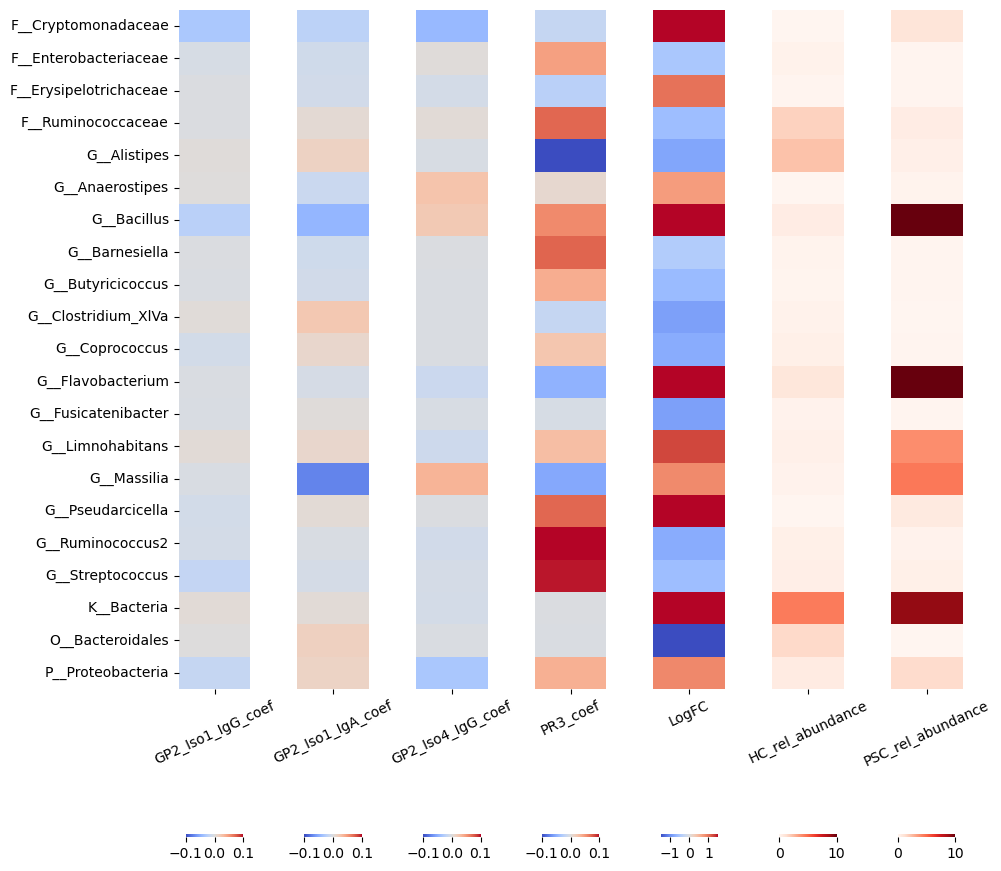

In [50]:
# Loop through each column in the list
columns_to_plot = ['GP2_Iso1_IgG_coef', 'GP2_Iso1_IgA_coef', 'GP2_Iso4_IgG_coef', 'PR3_coef', 'LogFC', 'HC_rel_abundance', 'PSC_rel_abundance']
# Define vmin and vmax for each color bar
vmin_vmax = [(-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.1), (-1.5, 1.5), (0, 10), (0, 10)]

plt.figure(figsize=(10, 10))
for i, (column, (vmin, vmax)) in enumerate(zip(columns_to_plot, vmin_vmax)):
    plt.subplot(1, 7, i+1)  # Create subplots for each column
    if i < 5:
        cmap = 'coolwarm'
    else:
        cmap = 'Reds'
    sns.heatmap(merged_seren[[column]], cmap=cmap, annot=False, cbar_kws={'orientation': 'horizontal', "shrink": 0.8}, cbar=True, vmin = vmin, vmax = vmax)
    plt.xticks(rotation=25)
    if i == 0:
        plt.yticks(rotation=0)  # Rotate y-axis ticks for better readability
    else:
        plt.yticks([])  # Remove y-axis ticks for other subplots
plt.savefig('./results/lfc_assoc_seren_all.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  # Adjust layout
plt.show()

In [22]:
merged_stool

GP2_Iso1_IgG_coef  GP2_Iso1_IgA_coef  \
F__Porphyromonadaceae             -0.014159          -0.010132   
F__Ruminococcaceae                -0.000507          -0.001003   
G__Alistipes                      -0.024668          -0.019222   
G__Escherichia_Shigella            0.017571           0.003063   
G__Flavonifractor                  0.014789           0.003081   
G__Oxalobacter                    -0.003262          -0.003092   
G__Phascolarctobacterium          -0.013430          -0.014490   
G__Prevotella                     -0.039382          -0.004950   
G__Sutterella                     -0.019372          -0.009145   
O__Clostridiales                  -0.001581          -0.016229   
P__Firmicutes                     -0.013836          -0.023238   

                          GP2_Iso4_IgG_coef  PR3_coef     LogFC  \
F__Porphyromonadaceae              0.004347 -0.004014 -1.296659   
F__Ruminococcaceae                 0.019802 -0.018705 -0.736090   
G__Alistipes                       0.008779 -0.043416 -0.676990   
G__Escherichia_Shigella            0.001689 -0.020645  1.061698   
G__Flavonifractor                  0.006300 -0.024029  0.679829   
G__Oxalobacter                     0.019191 -0.011550 -0.691819   
G__Phascolarctobacterium           0.020242 -0.008887 -0.807648   
G__Prevotella                      0.010593  0.013363 -1.062308   
G__Sutterella                     -0.003893 -0.001043 -0.850096   
O__Clostridiales                   0.033684 -0.030788 -1.269890   
P__Firmicutes                      0.000456 -0.004380 -0.930675   

                          HC_rel_abundance  PSC_rel_abundance  
F__Porphyromonadaceae             0.837447           0.439981  
F__Ruminococcaceae                6.087021           4.716023  
G__Alistipes                      7.409149           5.795712  
G__Escherichia_Shigella           1.774894           5.868343  
G__Flavonifractor                 0.089149           0.361404  
G__Oxalobacter                    0.136809           0.066998  
G__Phascolarctobacterium          1.314468           0.647232  
G__Prevotella                     5.363830           3.707680  
G__Sutterella                     1.592128           0.840643  
O__Clostridiales                  4.717447           2.040682  
P__Firmicutes                     1.806170           0.765906

In [23]:
#rename non-genus name with the _G__NA suffix
merged_stool.rename(index={'O__Clostridiales': 'O__Clostridiales_G__NA'}, inplace=True)
merged_stool.rename(index={'F__Ruminococcaceae': 'F__Ruminococcaceae_G__NA'}, inplace=True)
merged_stool.rename(index={'P__Firmicutes': 'P__Firmicutes_G__NA'}, inplace=True)

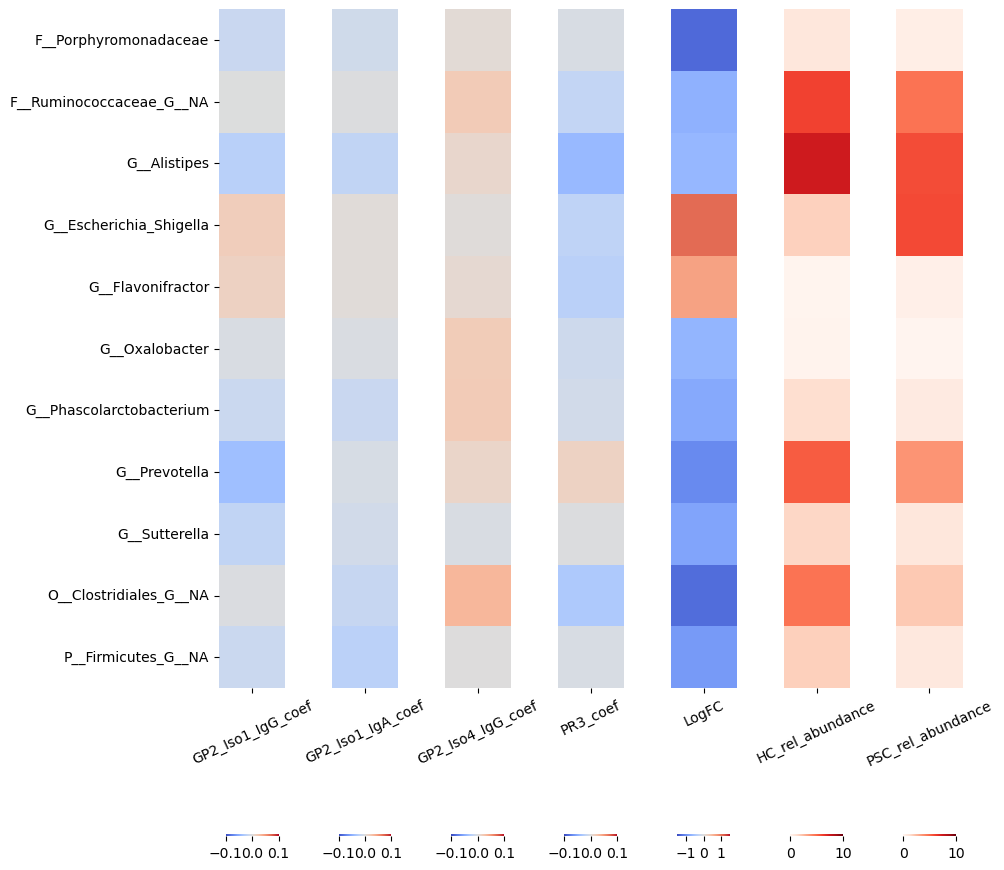

In [26]:
# Loop through each column in the list
columns_to_plot = ['GP2_Iso1_IgG_coef', 'GP2_Iso1_IgA_coef', 'GP2_Iso4_IgG_coef', 'PR3_coef', 'LogFC', 'HC_rel_abundance', 'PSC_rel_abundance']
# Define vmin and vmax for each color bar
vmin_vmax = [(-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.1), (-1.5, 1.5), (0, 10), (0, 10)]

plt.figure(figsize=(10, 10))
for i, (column, (vmin, vmax)) in enumerate(zip(columns_to_plot, vmin_vmax)):
    plt.subplot(1, 7, i+1)  # Create subplots for each column
    if i < 5:
        cmap = 'coolwarm'
    else:
        cmap = 'Reds'
    sns.heatmap(merged_stool[[column]], cmap=cmap, annot=False, cbar_kws={'orientation': 'horizontal', "shrink": 0.8}, cbar=True, vmin = vmin, vmax = vmax)
    plt.xticks(rotation=25)
    if i == 0:
        plt.yticks(rotation=0)  # Rotate y-axis ticks for better readability
    else:
        plt.yticks([])  # Remove y-axis ticks for other subplots
plt.savefig('./results/lfc_assoc_stool_all.png', dpi=300, bbox_inches='tight')
plt.tight_layout()  # Adjust layout
plt.show()

# Dotplots

In [152]:
GP2_data_seren

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0006         2.640         1.340         3.030         1.410   
2020-023_PSC_0007        10.060         3.280        14.370         3.550   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0015         2.560         0.000         3.560         0.000   
...                         ...           ...           ...           ...   
2020-023_SPC_0409         1.350         0.000         7.300         1.660   
2020-023_SPC_0480        10.380         1.950         8.160         2.930   
2020-023_SPC_0515        11.270         1.460        10.310         0.000   
2020-023_SPC_0726         2.600         1.470         4.800         3.970   
2020-023_SPC_0741         1.270         0.000         6.790         1.720   

                    PR3  Group  
2020-023_PSC_0001  2.20      0  
2020-023_PSC_0006  2.04      0  
2020-023_PSC_0007  2.93      0  
2020-023_PSC_0010  2.20      0  
2020-023_PSC_0015  3.27      0  
...                 ...    ...  
2020-023_SPC_0409  1.71      1  
2020-023_SPC_0480  2.85      1  
2020-023_SPC_0515  1.35      1  
2020-023_SPC_0726  2.33      1  
2020-023_SPC_0741  1.91      1  

[161 rows x 6 columns]

In [157]:
ab_seren

C__Alphaproteobacteria  C__Deltaproteobacteria  \
2020-023_PSC_0001                4.905275                2.995732   
2020-023_PSC_0006                2.197225                2.772589   
2020-023_PSC_0007                2.890372                0.000000   
2020-023_PSC_0010                0.000000                0.000000   
2020-023_PSC_0015                1.609438                0.000000   
...                                   ...                     ...   
2020-023_SPC_0409                0.000000                0.000000   
2020-023_SPC_0480                0.000000                0.000000   
2020-023_SPC_0515                0.000000                0.000000   
2020-023_SPC_0726                0.000000                5.068904   
2020-023_SPC_0741                3.761200                0.000000   

                   F__Clostridiales_Incertae_Sedis_XII  F__Coriobacteriaceae  \
2020-023_PSC_0001                                  0.0                   0.0   
2020-023_PSC_0006                                  0.0                   0.0   
2020-023_PSC_0007                                  0.0                   0.0   
2020-023_PSC_0010                                  0.0                   0.0   
2020-023_PSC_0015                                  0.0                   0.0   
...                                                ...                   ...   
2020-023_SPC_0409                                  0.0                   0.0   
2020-023_SPC_0480                                  0.0                   0.0   
2020-023_SPC_0515                                  0.0                   0.0   
2020-023_SPC_0726                                  0.0                   0.0   
2020-023_SPC_0741                                  0.0                   0.0   

                   F__Cryptomonadaceae  F__Enterobacteriaceae  \
2020-023_PSC_0001             0.000000               0.000000   
2020-023_PSC_0006             3.332205               0.000000   
2020-023_PSC_0007             2.197225               2.079442   
2020-023_PSC_0010             4.663439               0.000000   
2020-023_PSC_0015             0.000000               2.197225   
...                                ...                    ...   
2020-023_SPC_0409             0.000000               0.000000   
2020-023_SPC_0480             0.000000               3.637586   
2020-023_SPC_0515             0.000000               0.000000   
2020-023_SPC_0726             0.000000               0.000000   
2020-023_SPC_0741             0.000000               0.000000   

                   F__Erysipelotrichaceae  F__Lachnospiraceae  \
2020-023_PSC_0001                     0.0            0.000000   
2020-023_PSC_0006                     0.0            5.429346   
2020-023_PSC_0007                     0.0            3.091042   
2020-023_PSC_0010                     0.0            0.000000   
2020-023_PSC_0015                     0.0            3.931826   
...                                   ...                 ...   
2020-023_SPC_0409                     0.0            0.000000   
2020-023_SPC_0480                     0.0            0.000000   
2020-023_SPC_0515                     0.0            2.197225   
2020-023_SPC_0726                     0.0            0.000000   
2020-023_SPC_0741                     0.0            5.690359   

                   F__Porphyromonadaceae  F__Ruminococcaceae  ...  \
2020-023_PSC_0001                    0.0            4.204693  ...   
2020-023_PSC_0006                    0.0            0.000000  ...   
2020-023_PSC_0007                    0.0            0.693147  ...   
2020-023_PSC_0010                    0.0            0.000000  ...   
2020-023_PSC_0015                    0.0            0.000000  ...   
...                                  ...                 ...  ...   
2020-023_SPC_0409                    0.0            0.000000  ...   
2020-023_SPC_0480                    0.0            0.000000  ...   
2020-023_SPC_0515                    0.0      

In [158]:
subset_ab_seren = ab_seren[merged_seren.index]

In [159]:
subset_ab_seren

F__Cryptomonadaceae  F__Enterobacteriaceae  \
2020-023_PSC_0001             0.000000               0.000000   
2020-023_PSC_0006             3.332205               0.000000   
2020-023_PSC_0007             2.197225               2.079442   
2020-023_PSC_0010             4.663439               0.000000   
2020-023_PSC_0015             0.000000               2.197225   
...                                ...                    ...   
2020-023_SPC_0409             0.000000               0.000000   
2020-023_SPC_0480             0.000000               3.637586   
2020-023_SPC_0515             0.000000               0.000000   
2020-023_SPC_0726             0.000000               0.000000   
2020-023_SPC_0741             0.000000               0.000000   

                   F__Erysipelotrichaceae  F__Ruminococcaceae  G__Alistipes  \
2020-023_PSC_0001                     0.0            4.204693      0.000000   
2020-023_PSC_0006                     0.0            0.000000      0.000000   
2020-023_PSC_0007                     0.0            0.693147      0.000000   
2020-023_PSC_0010                     0.0            0.000000      0.000000   
2020-023_PSC_0015                     0.0            0.000000      0.000000   
...                                   ...                 ...           ...   
2020-023_SPC_0409                     0.0            0.000000      6.552508   
2020-023_SPC_0480                     0.0            0.000000      0.000000   
2020-023_SPC_0515                     0.0            0.000000      4.976734   
2020-023_SPC_0726                     0.0            0.000000      0.000000   
2020-023_SPC_0741                     0.0            5.963579      6.226537   

                   G__Anaerostipes  G__Bacillus  G__Barnesiella  \
2020-023_PSC_0001         0.000000     3.555348             0.0   
2020-023_PSC_0006         0.000000     4.595120             0.0   
2020-023_PSC_0007         0.000000     6.541030             0.0   
2020-023_PSC_0010         0.000000     0.000000             0.0   
2020-023_PSC_0015         3.044522     6.642487             0.0   
...                            ...          ...             ...   
2020-023_SPC_0409         0.000000     0.000000             0.0   
2020-023_SPC_0480         0.000000     2.772589             0.0   
2020-023_SPC_0515         0.000000     1.098612             0.0   
2020-023_SPC_0726         0.000000     0.000000             0.0   
2020-023_SPC_0741         0.000000     0.000000             0.0   

                   G__Butyricicoccus  G__Clostridium_XlVa  ...  \
2020-023_PSC_0001           0.000000             0.000000  ...   
2020-023_PSC_0006           2.772589             0.000000  ...   
2020-023_PSC_0007           0.000000             0.000000  ...   
2020-023_PSC_0010           3.891820             0.000000  ...   
2020-023_PSC_0015           0.000000             0.000000  ...   
...                              ...                  ...  ...   
2020-023_SPC_0409           0.000000             0.000000  ...   
2020-023_SPC_0480           0.000000             0.000000  ...   
2020-023_SPC_0515           0.000000             0.000000  ...   
2020-023_SPC_0726           0.000000             0.000000  ...   
2020-023_SPC_0741           0.000000             4.094345  ...   

                   G__Flavobacterium  G__Fusicatenibacter  G__Limnohabitans  \
2020-023_PSC_0001           5.783825                  0.0          3.761200   
2020-023_PSC_0006           6.192362                  0.0          2.639057   
2020-023_PSC_0007           5.384495                  0.0          3.496508   
2020-023_PSC_0010           6.437752                  0.0          5.690359   
2020-023_PSC_0015           5.123964                  0.0          4.543295   
...                              ...                  ...               ...   
2020-023_SPC_0409           3.951244                  0.0          0.000000   
2020-023_SPC_0480           0.000000                  0.0  

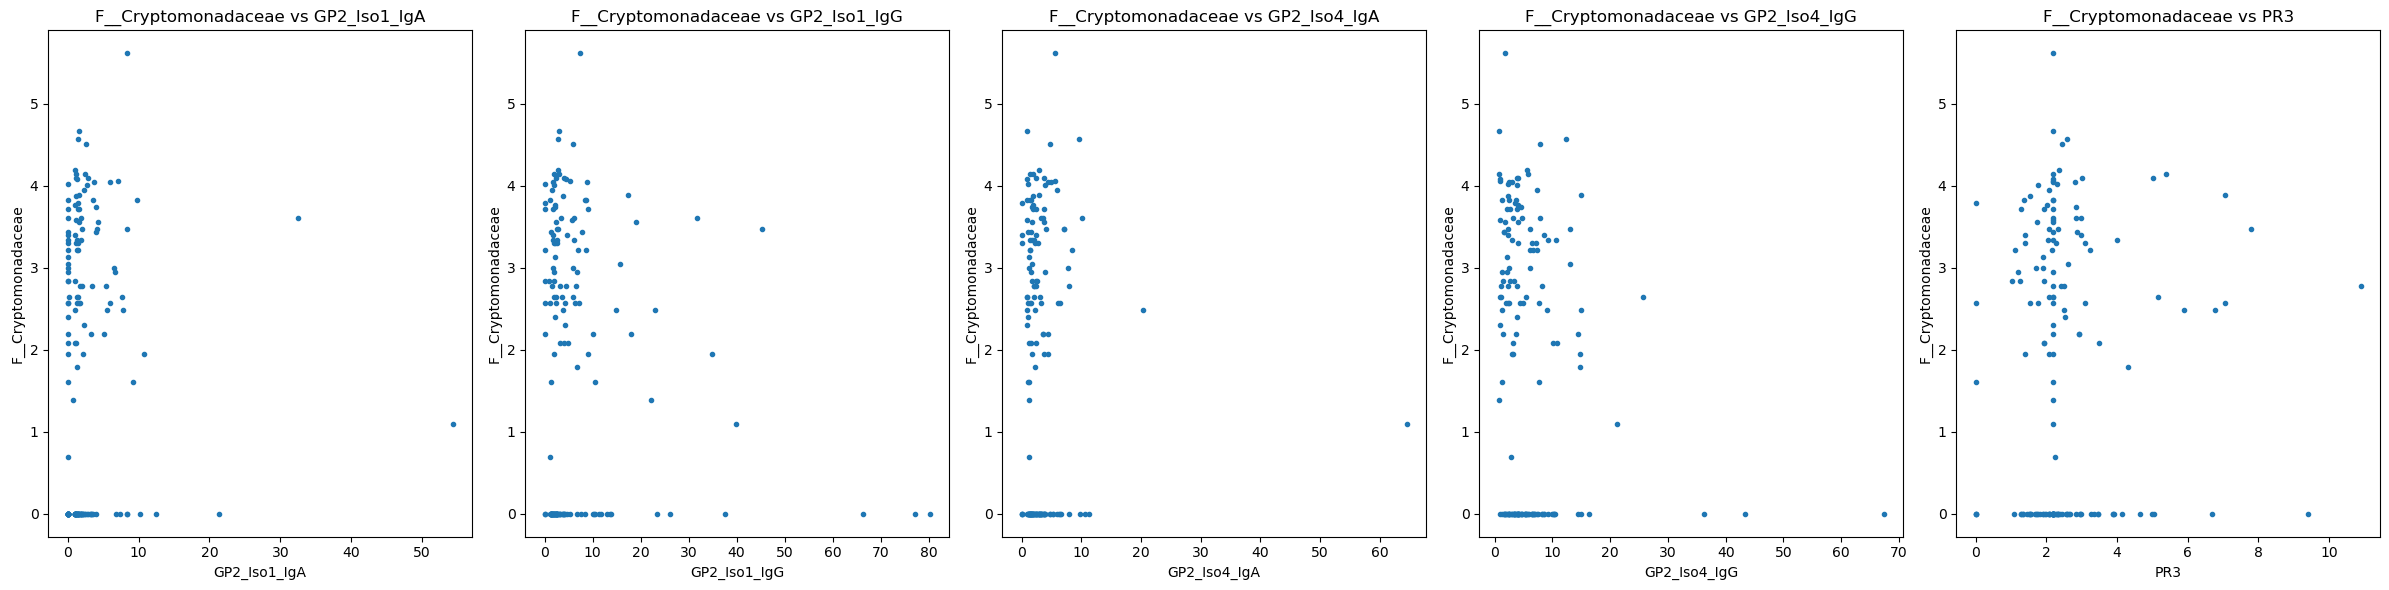

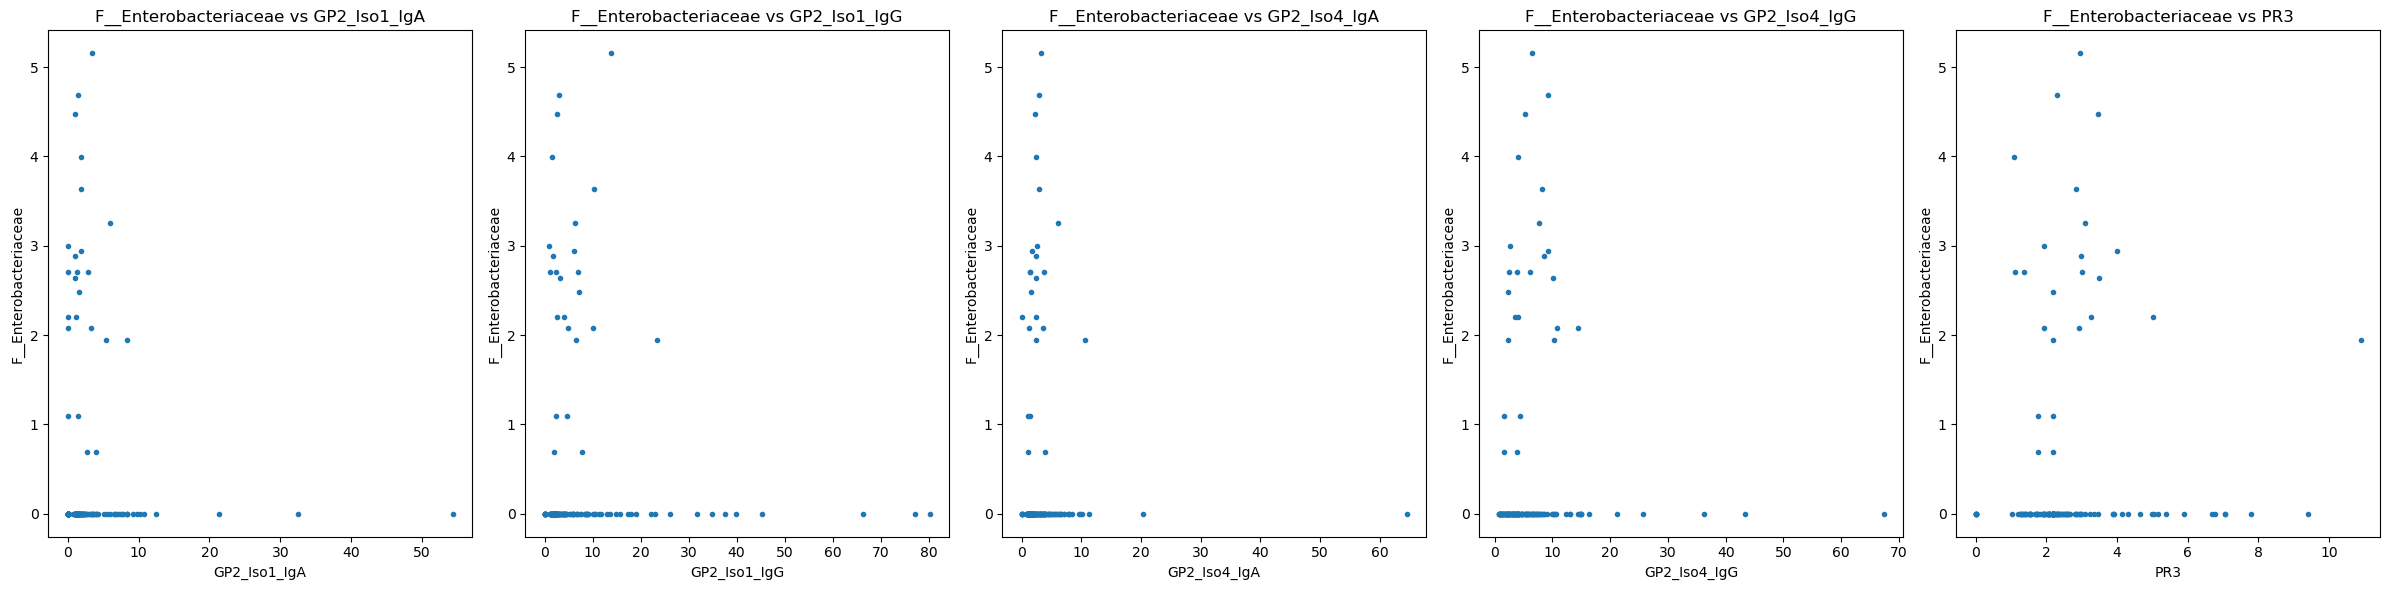

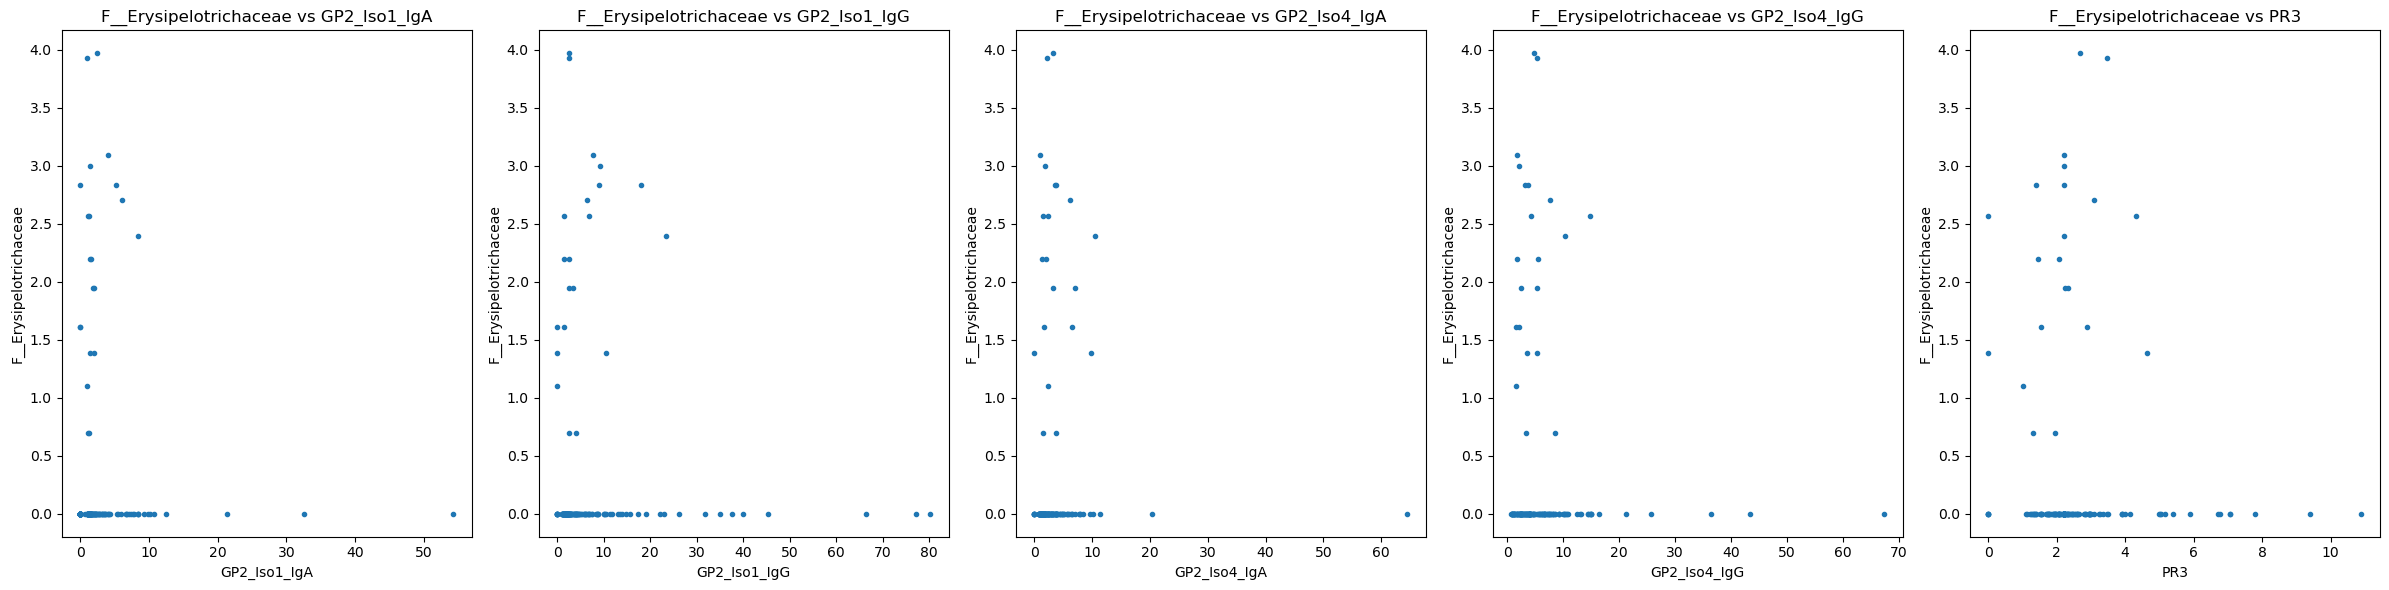

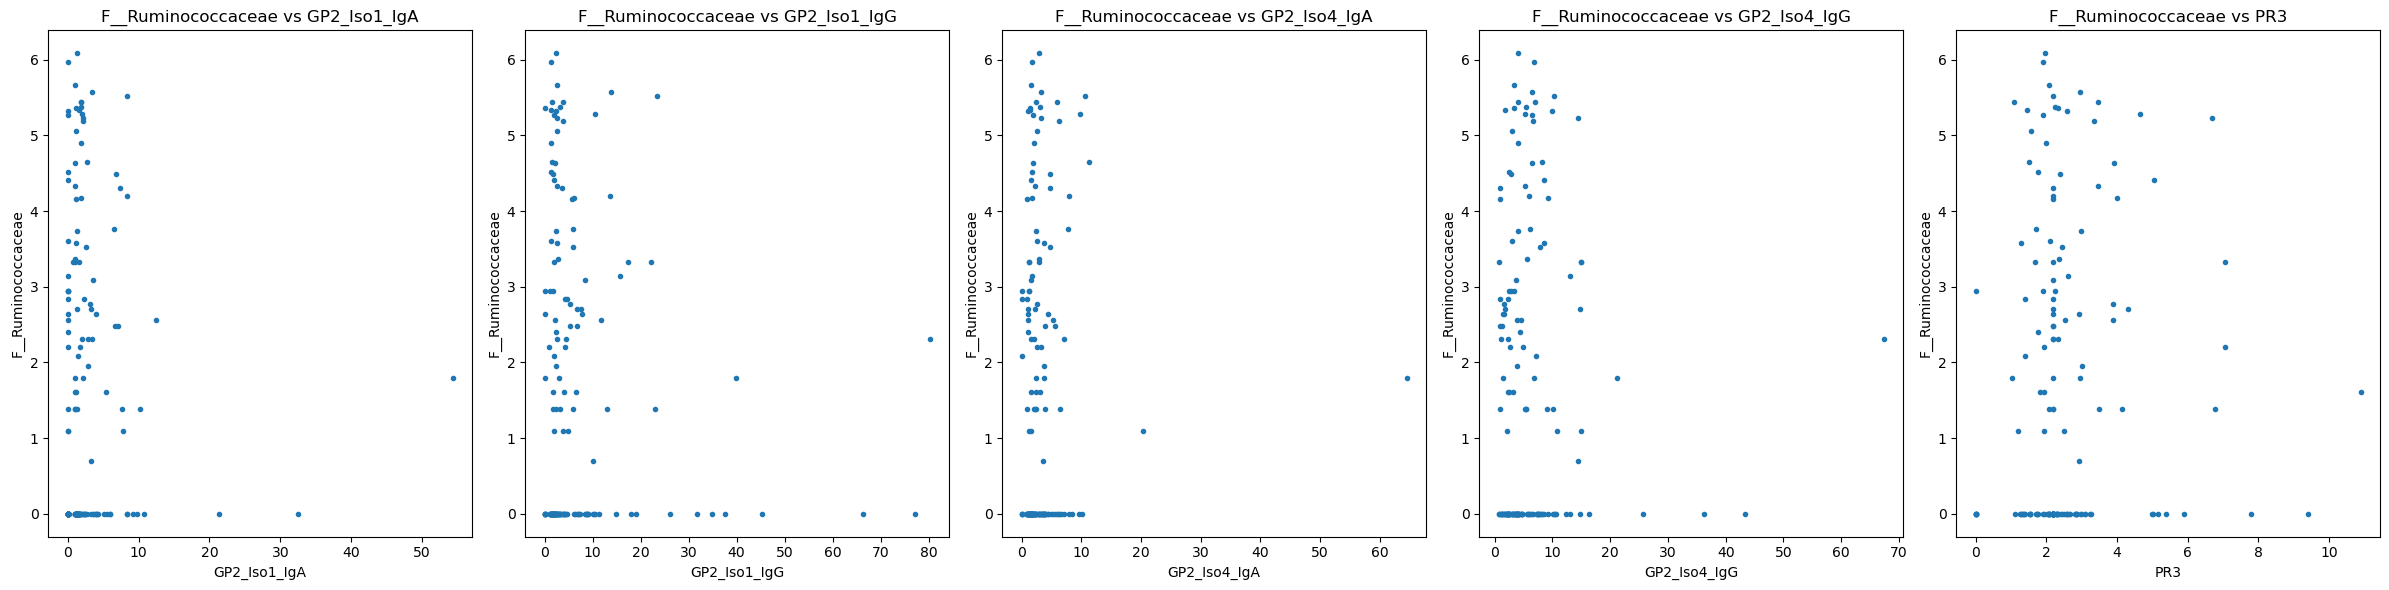

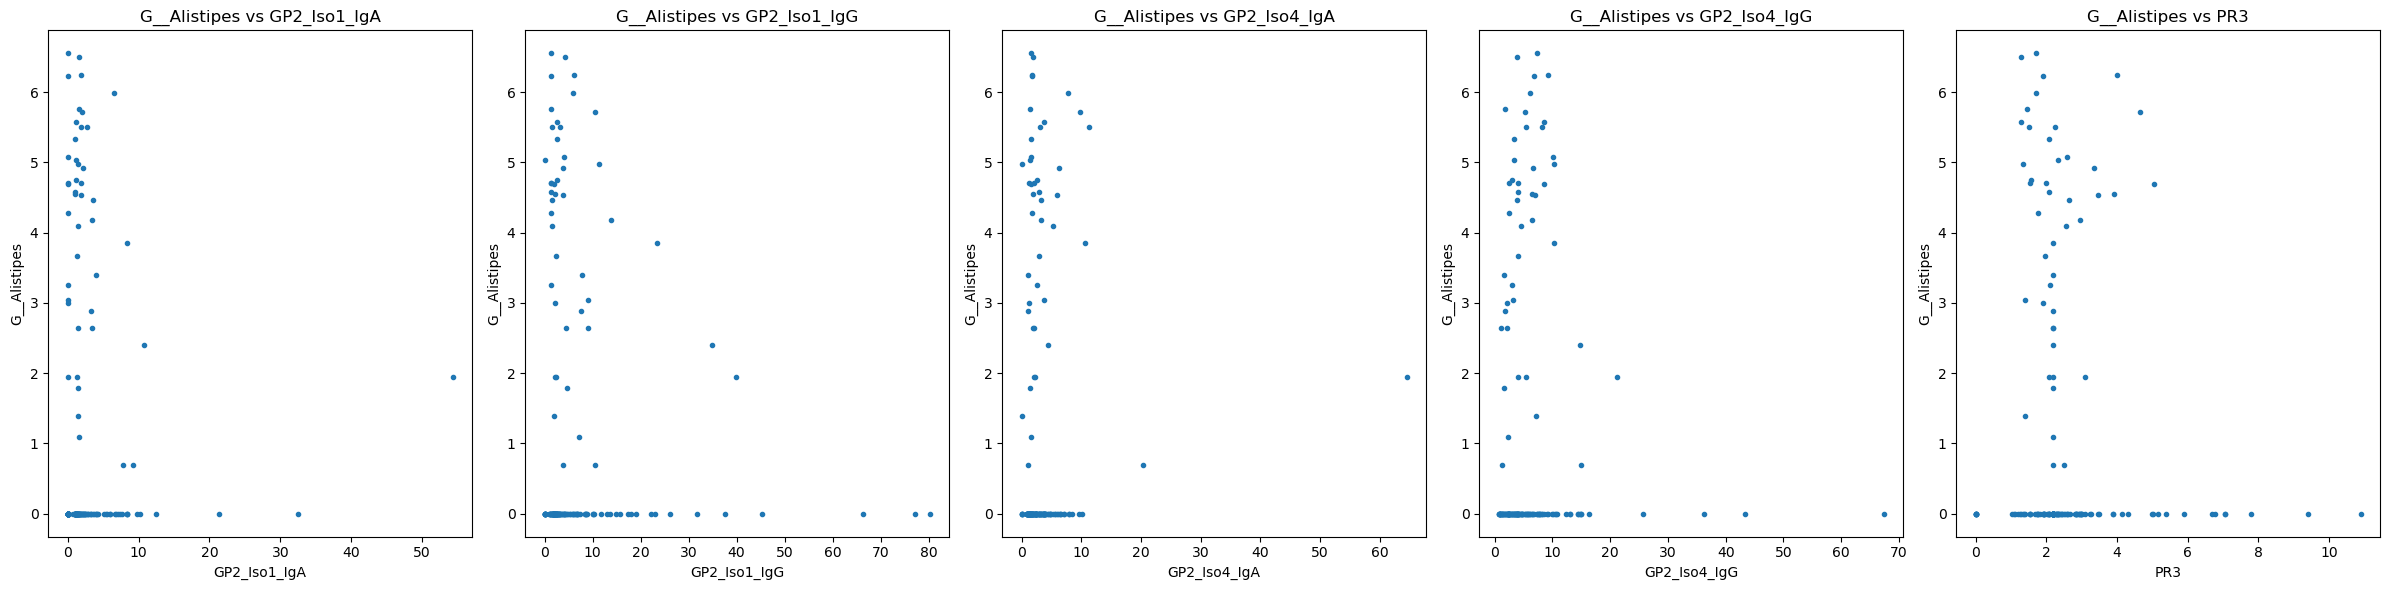

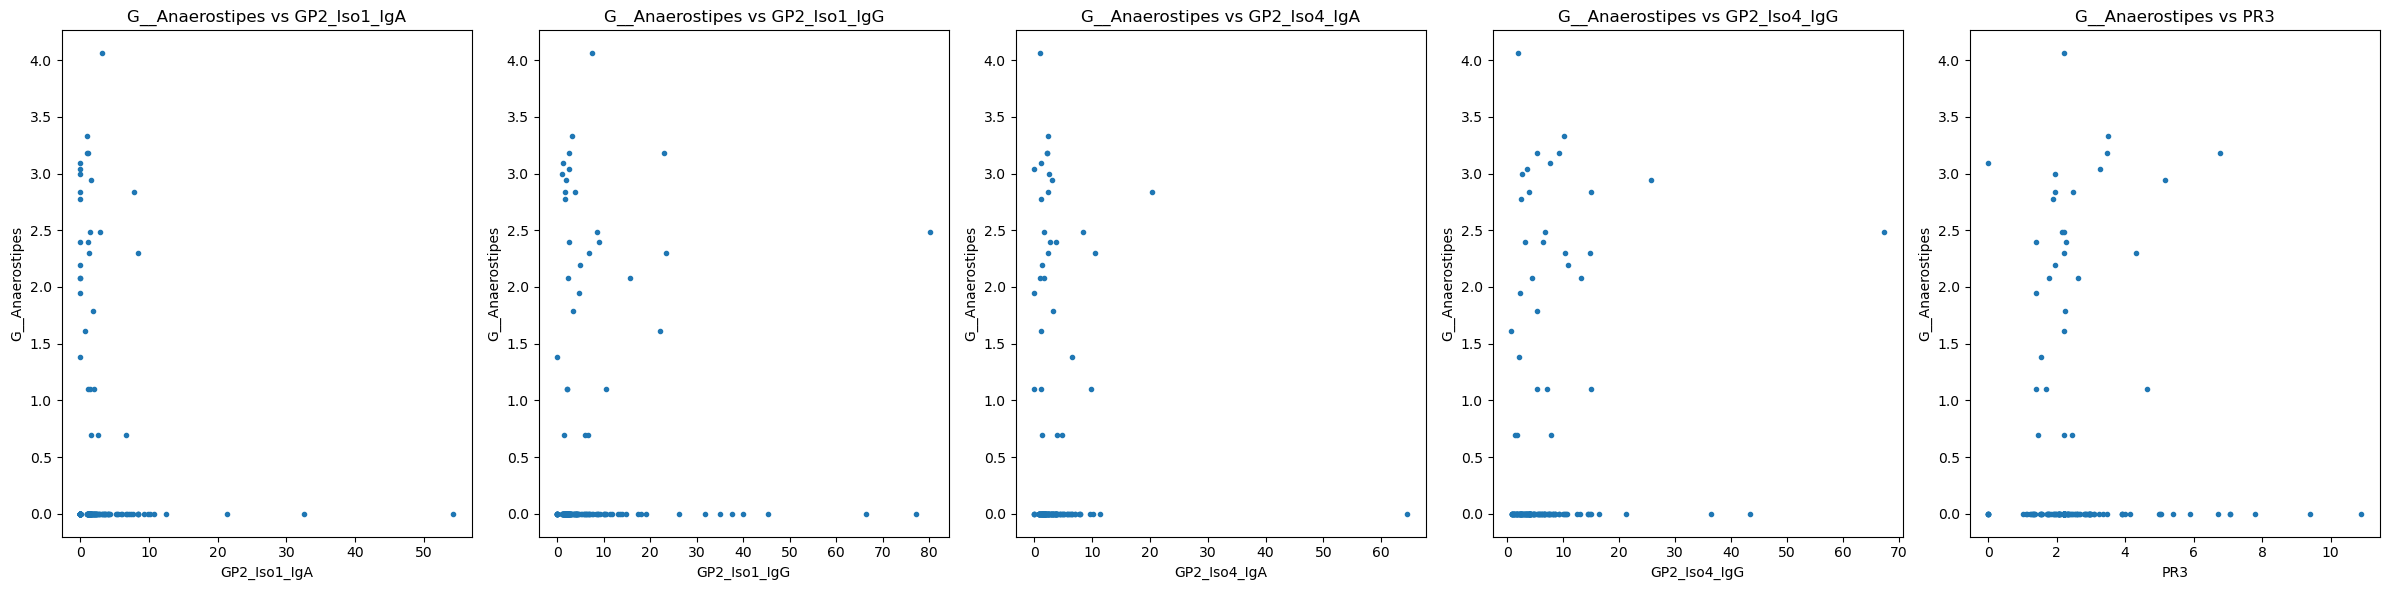

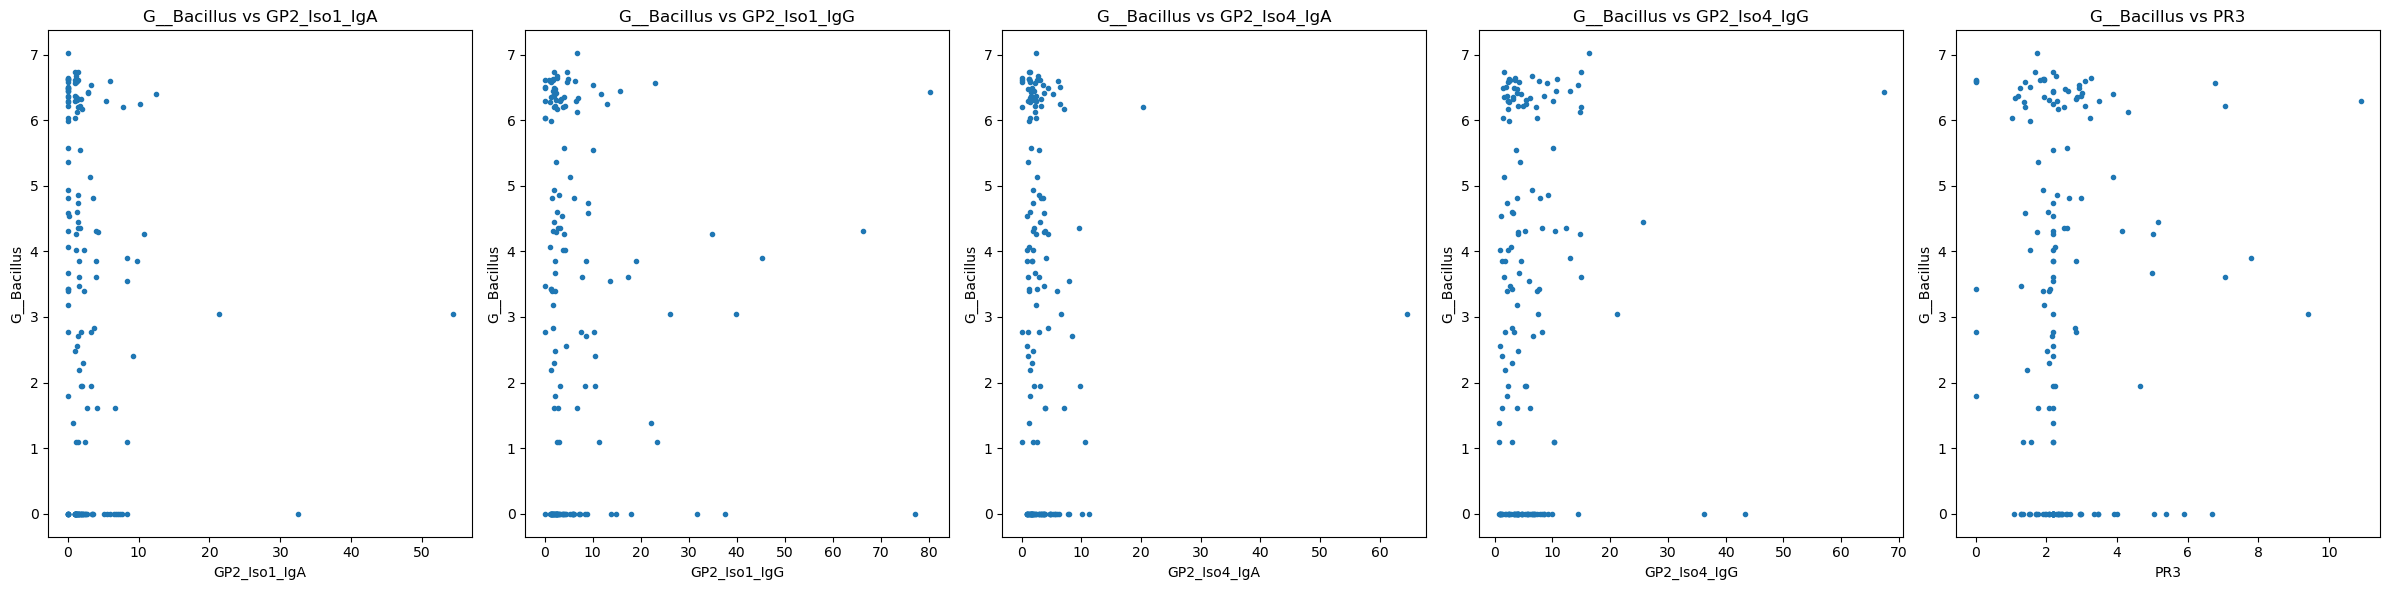

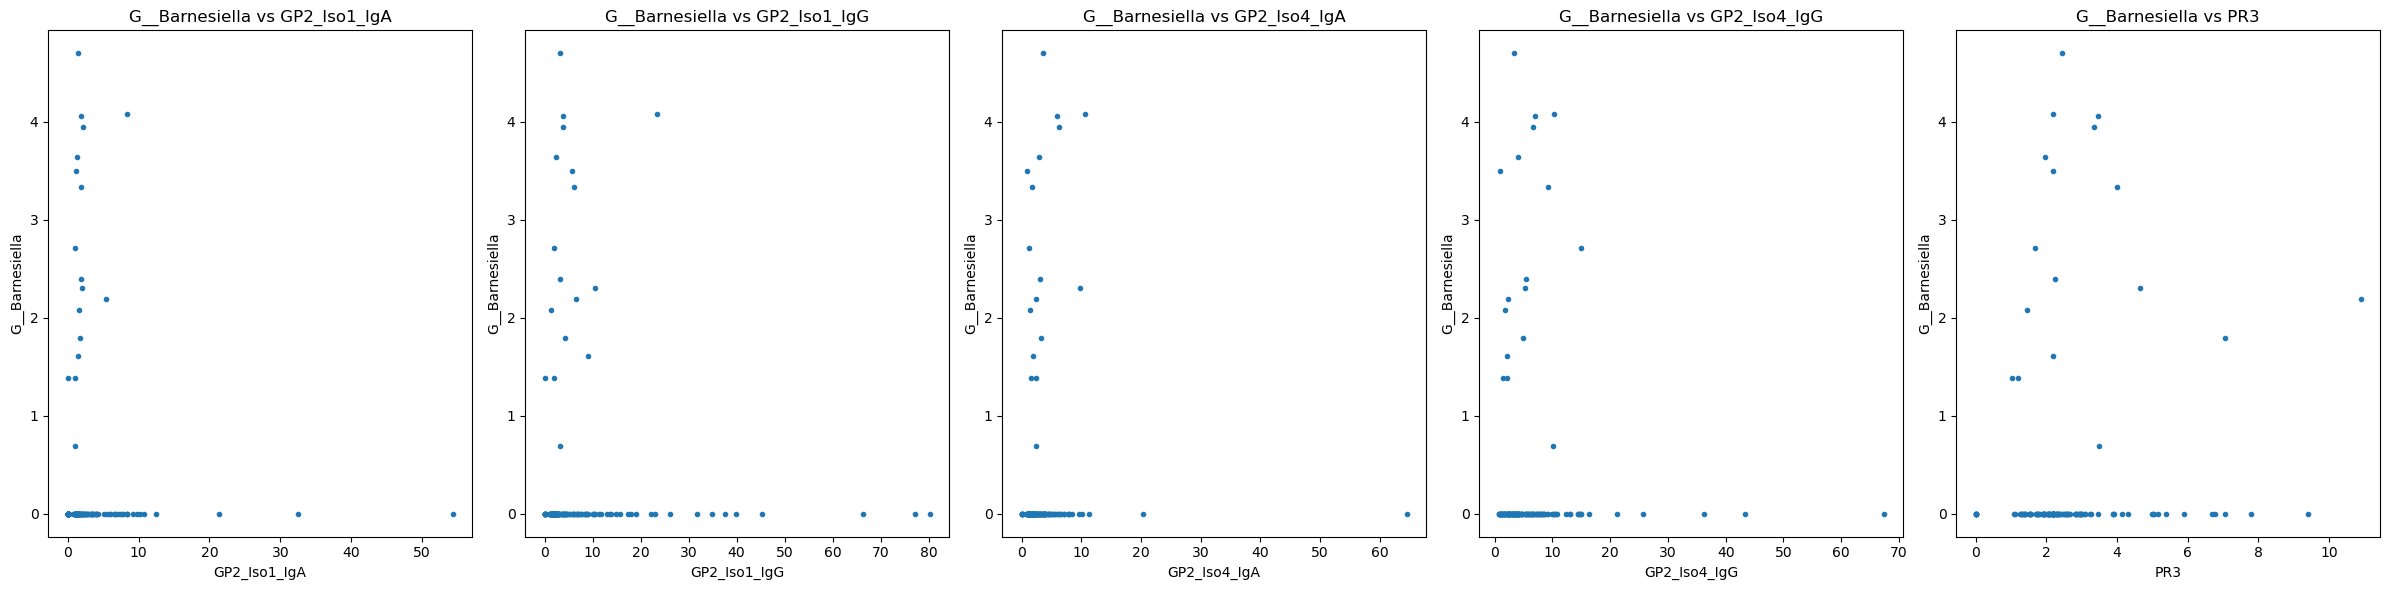

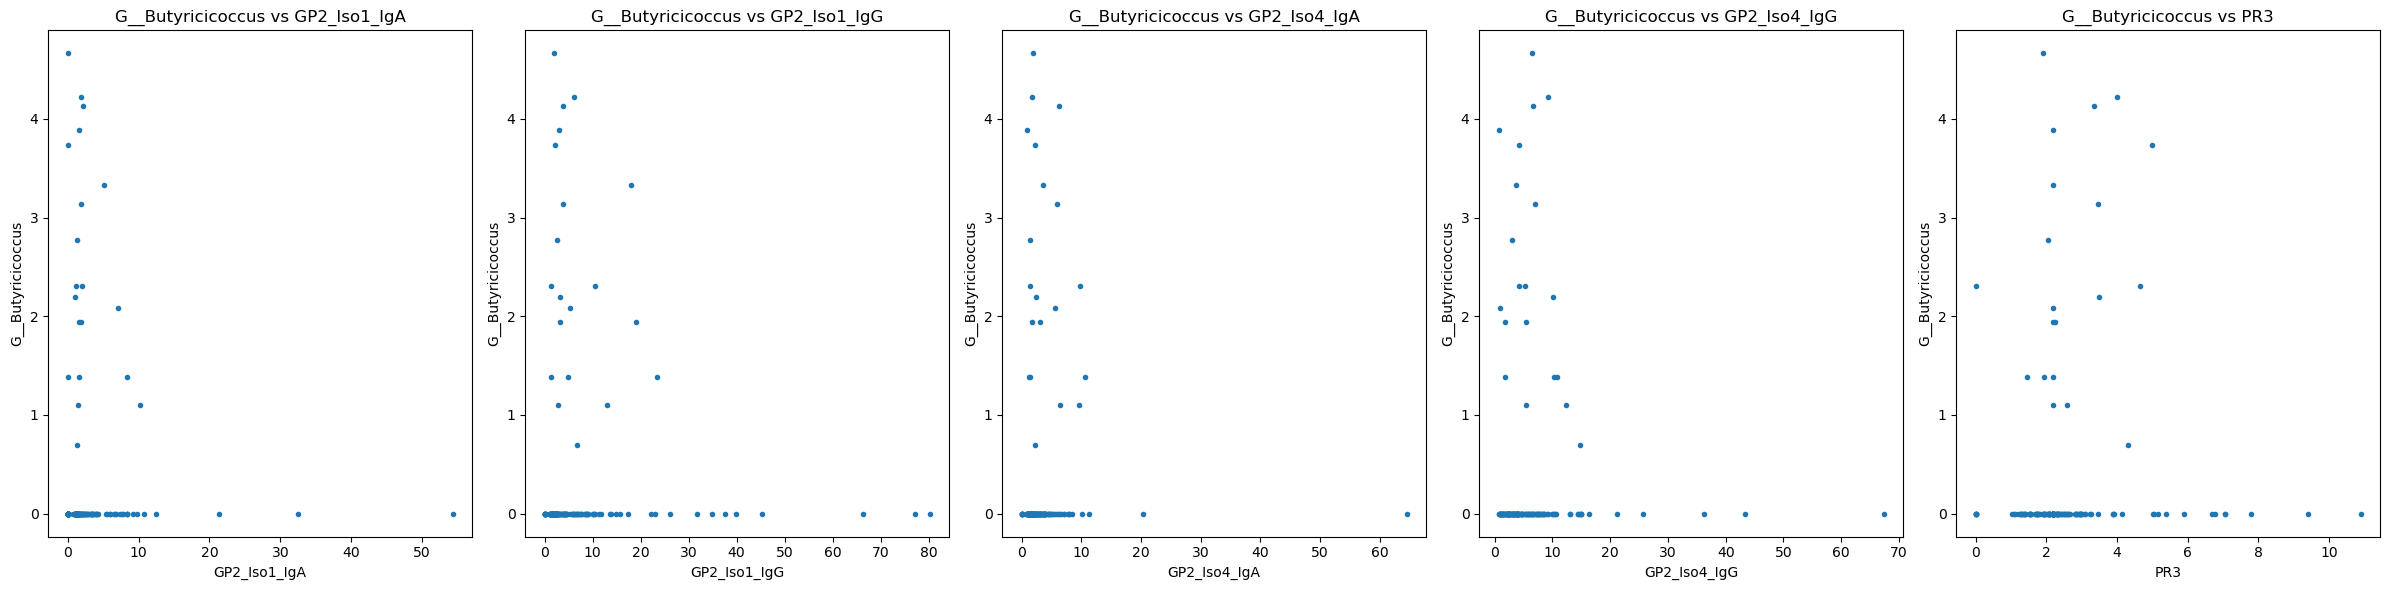

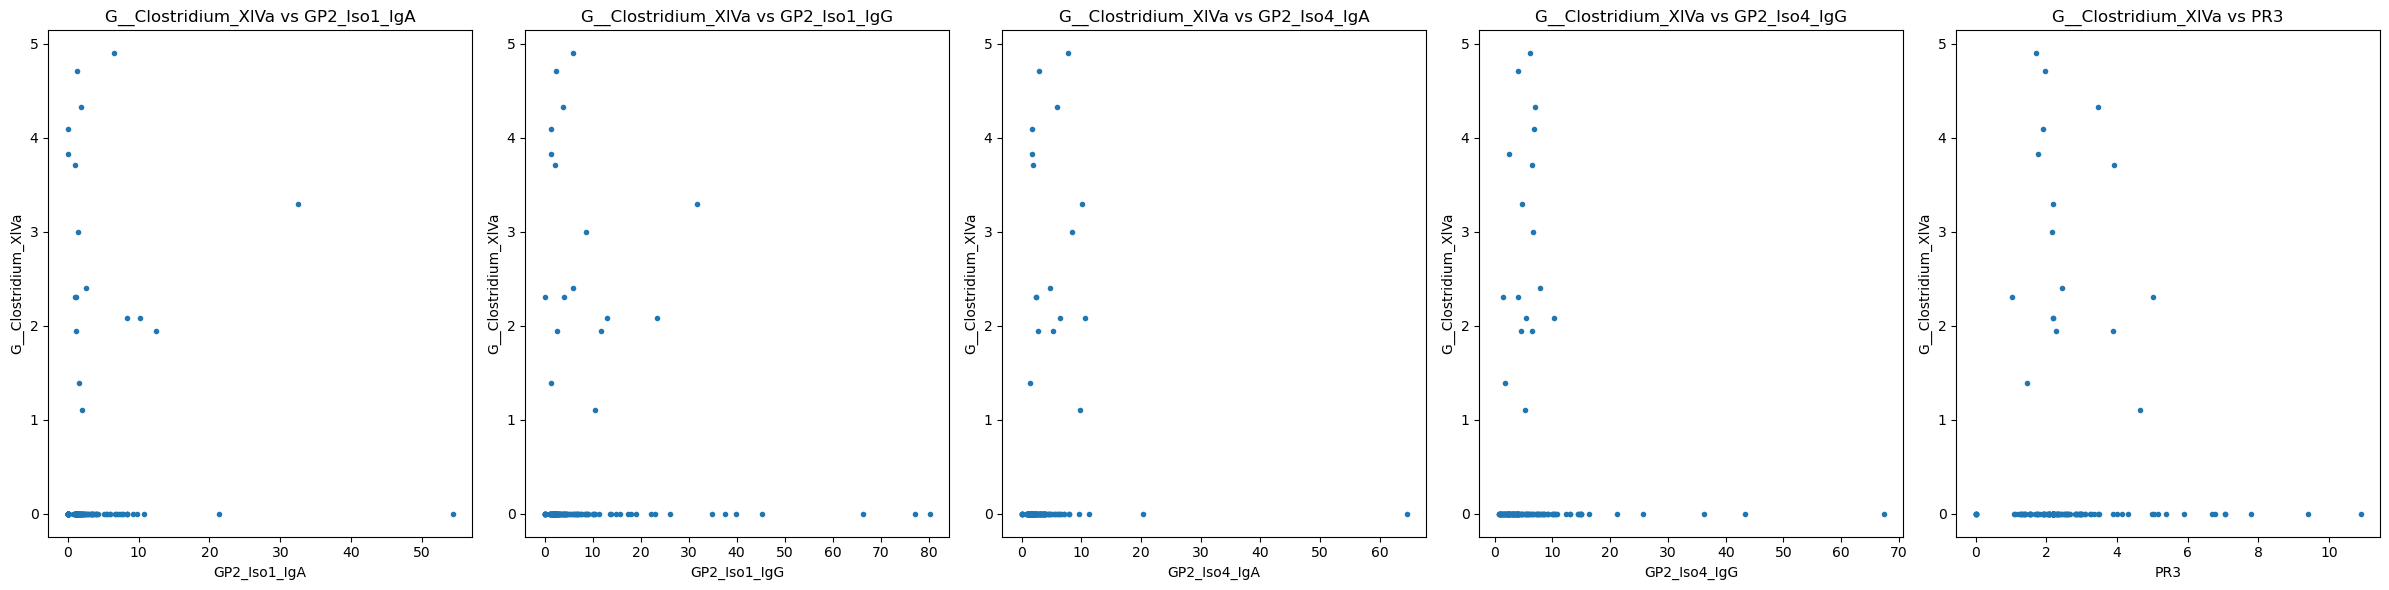

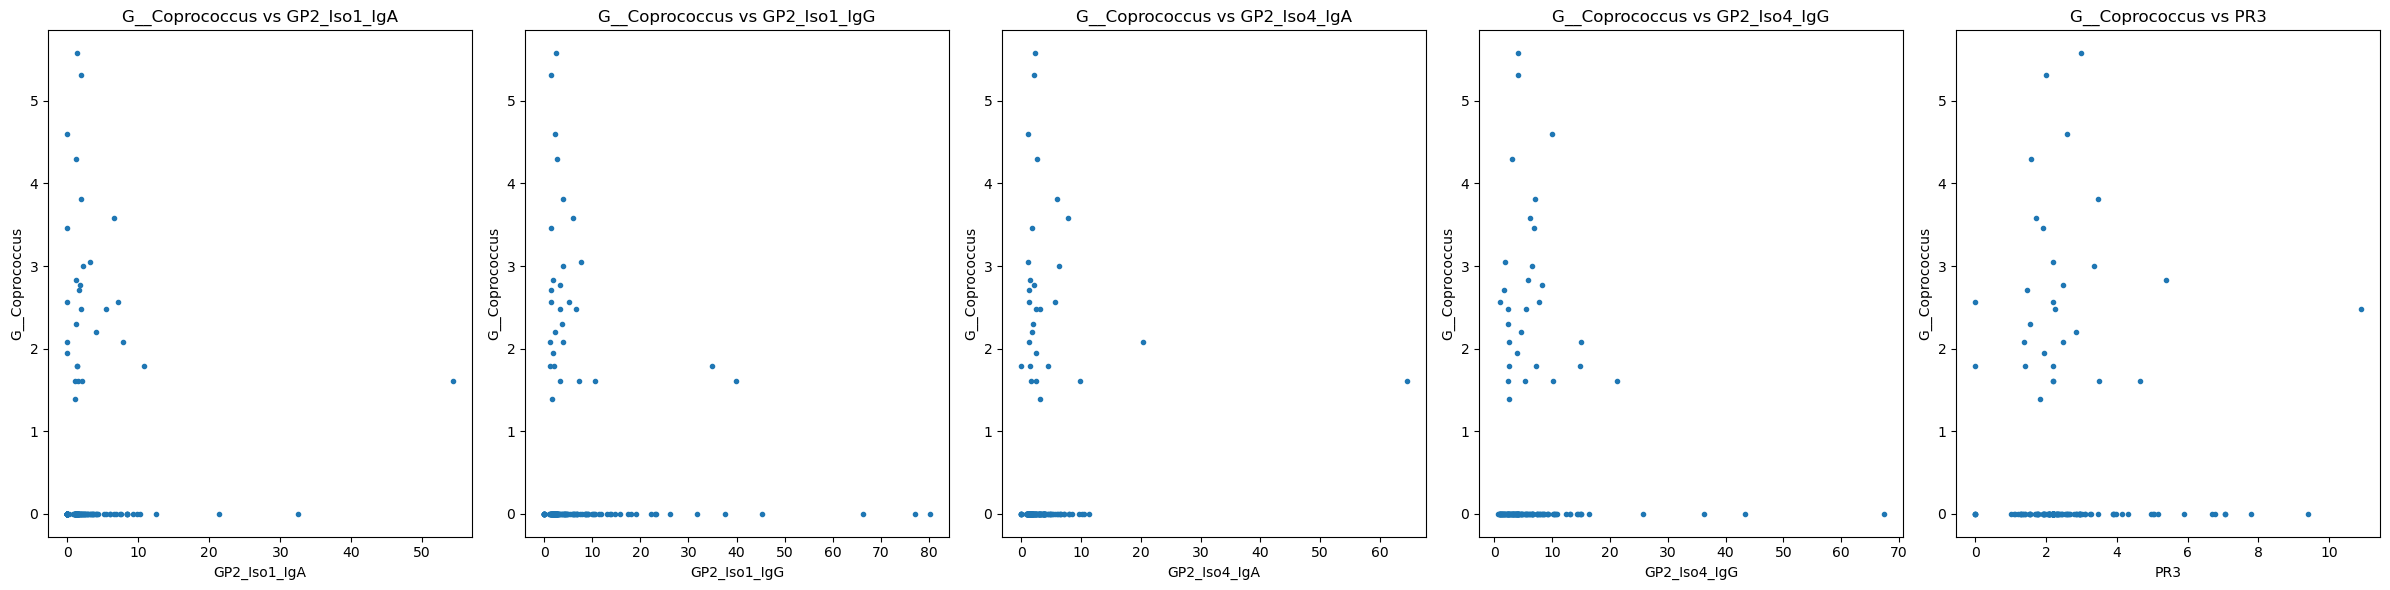

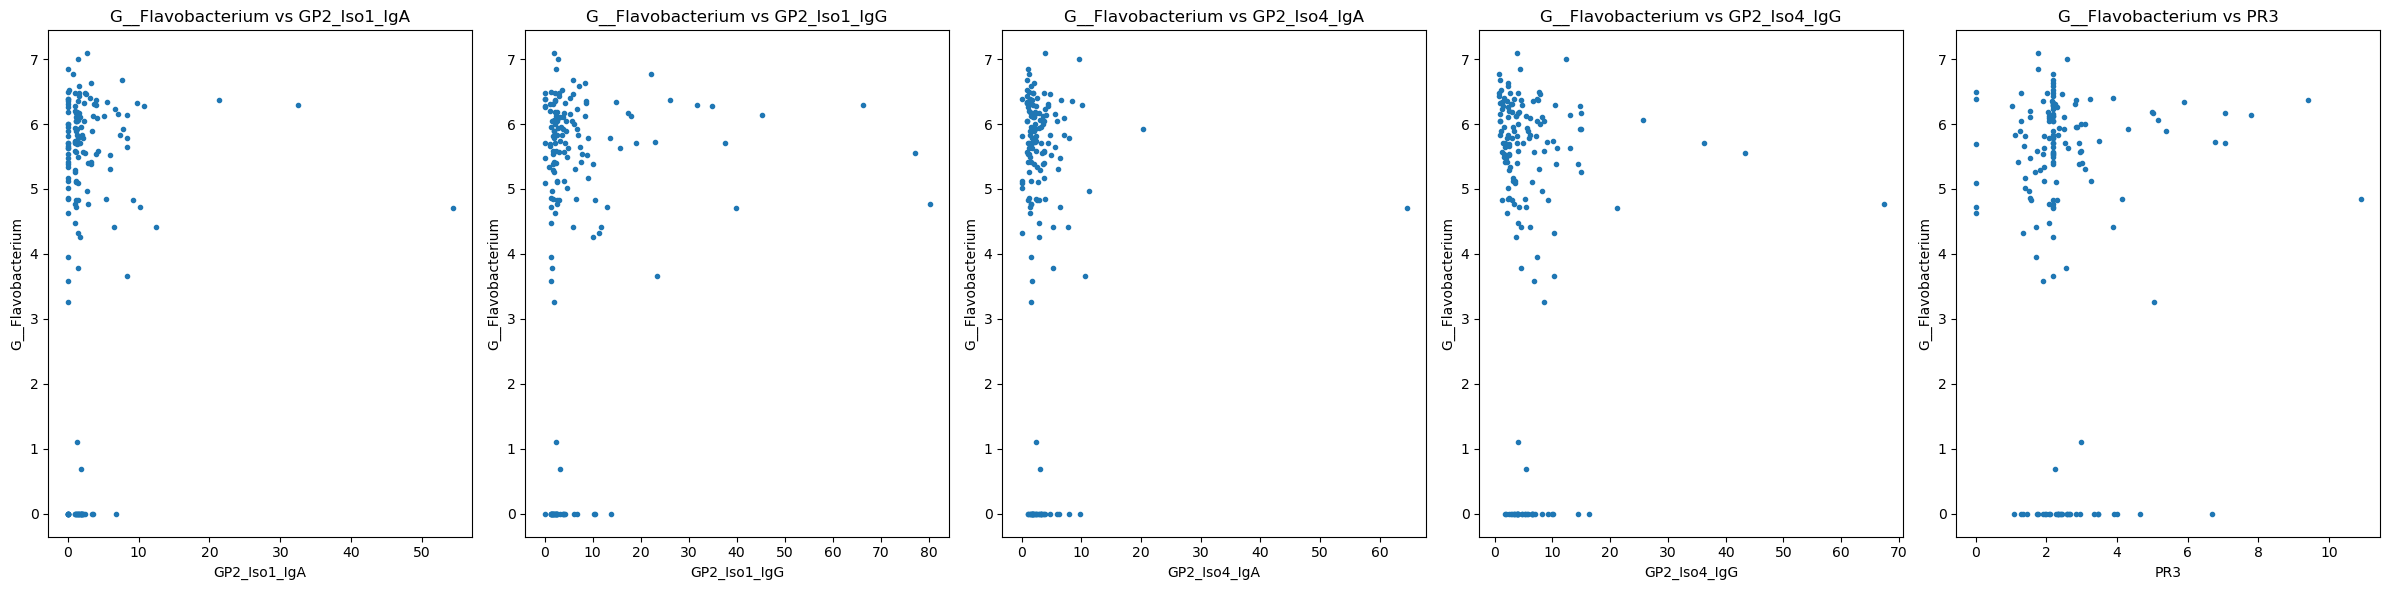

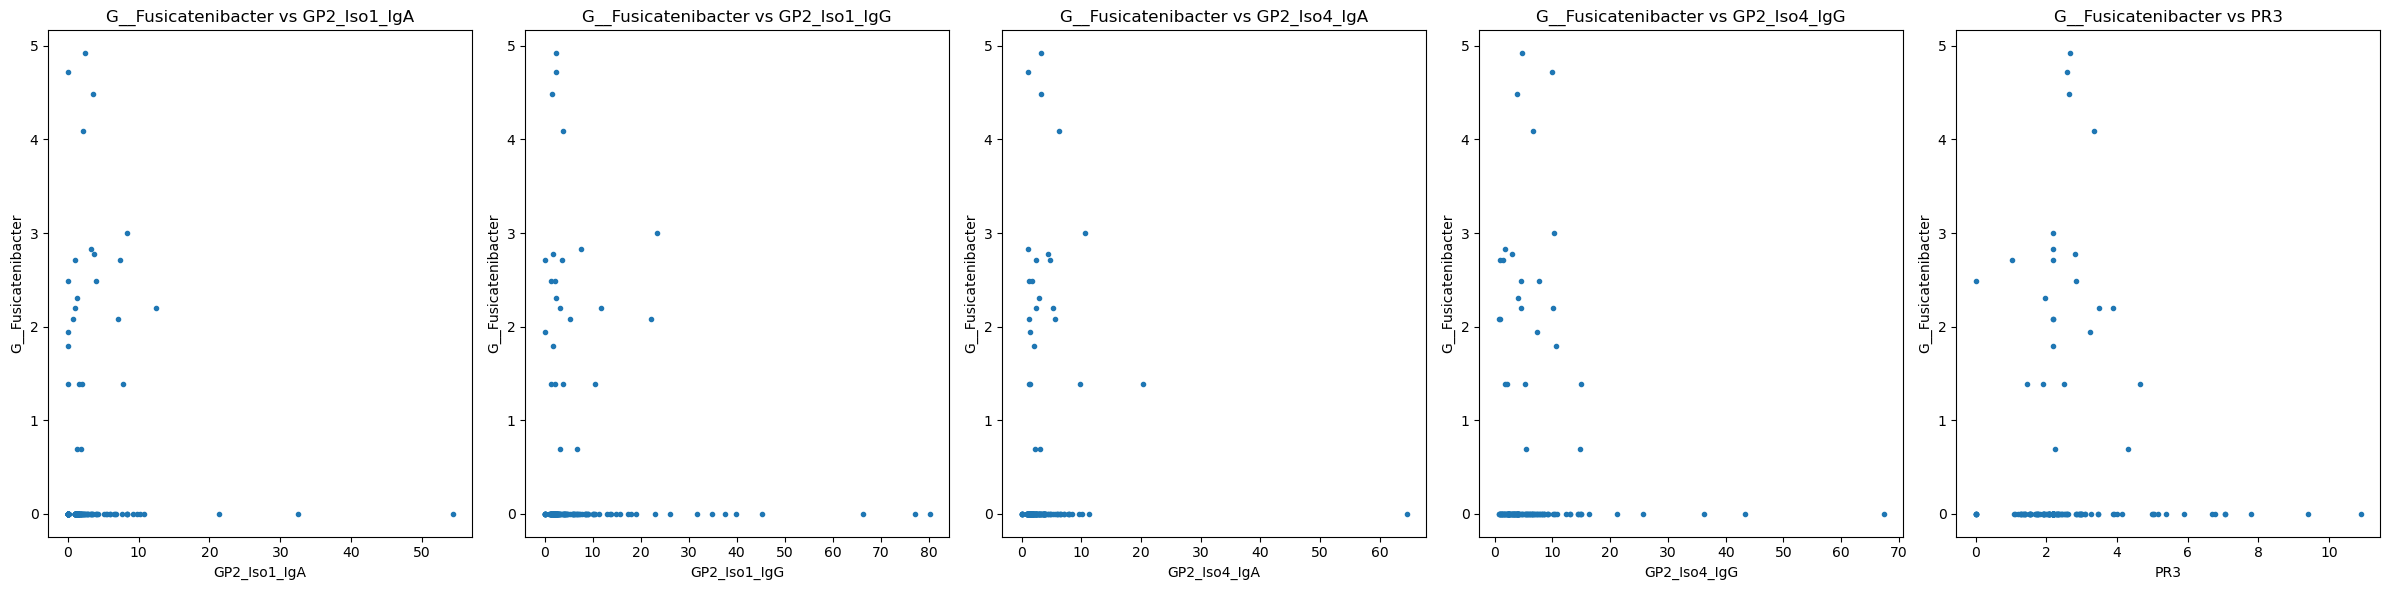

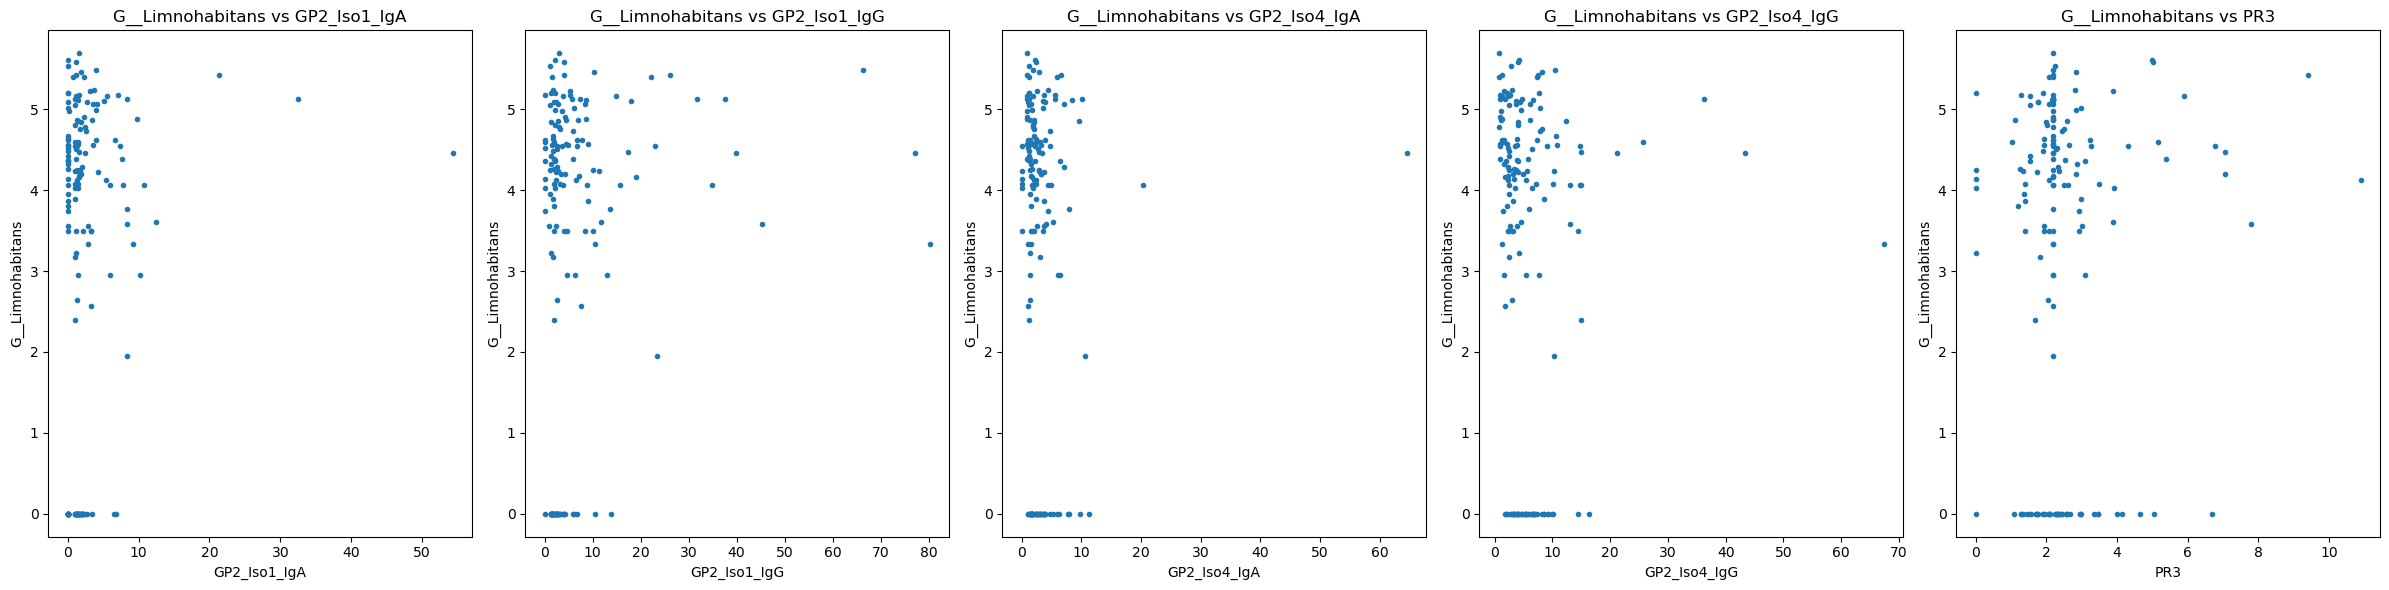

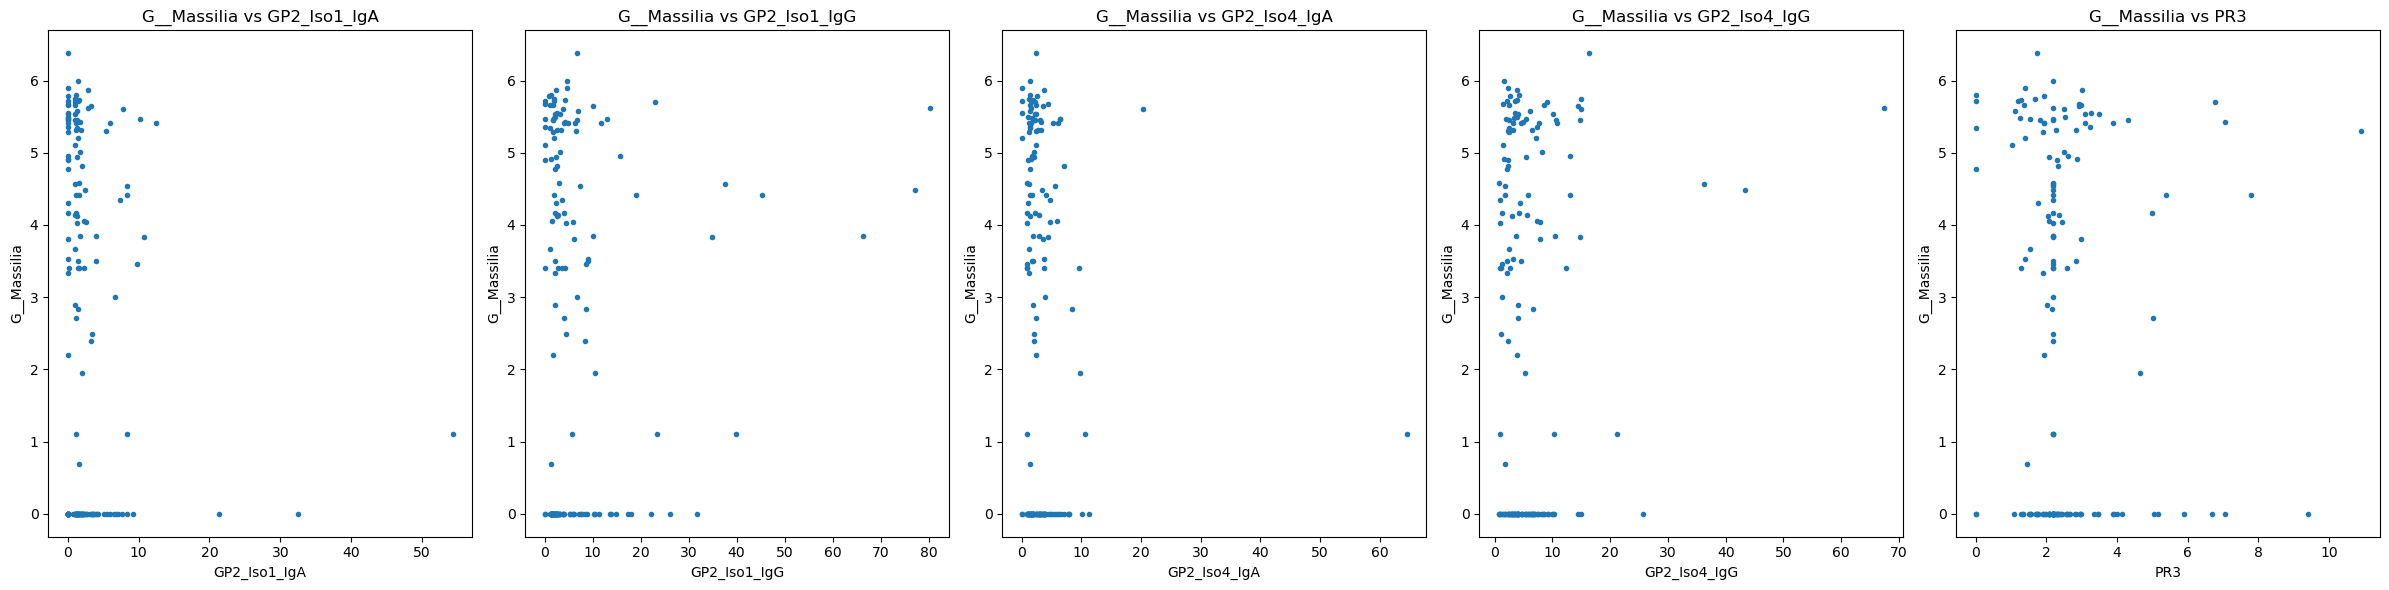

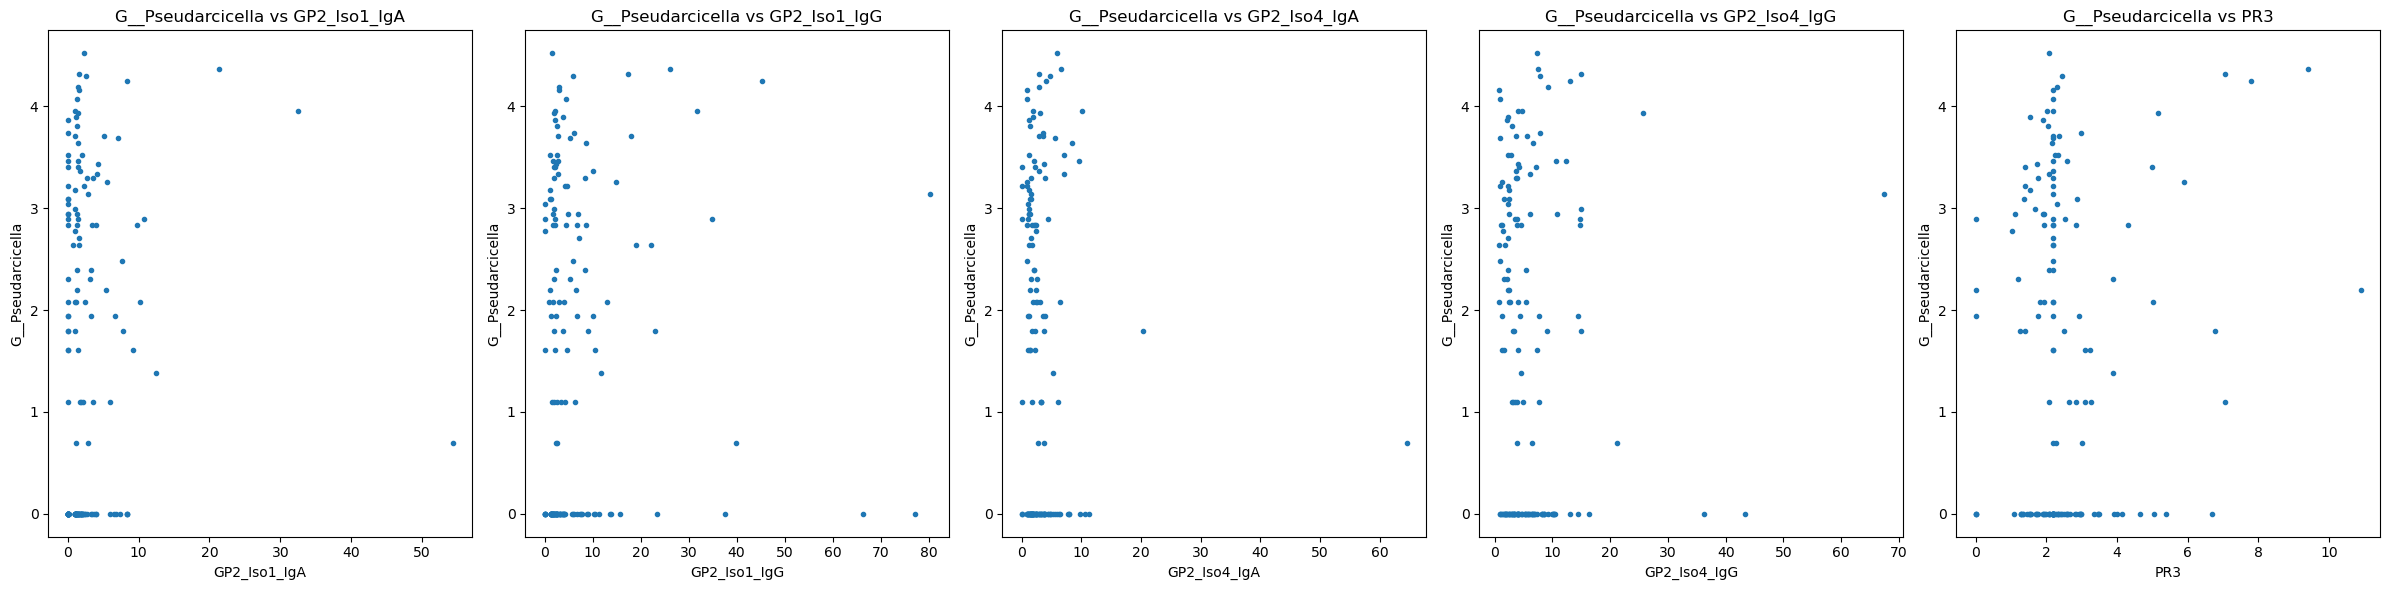

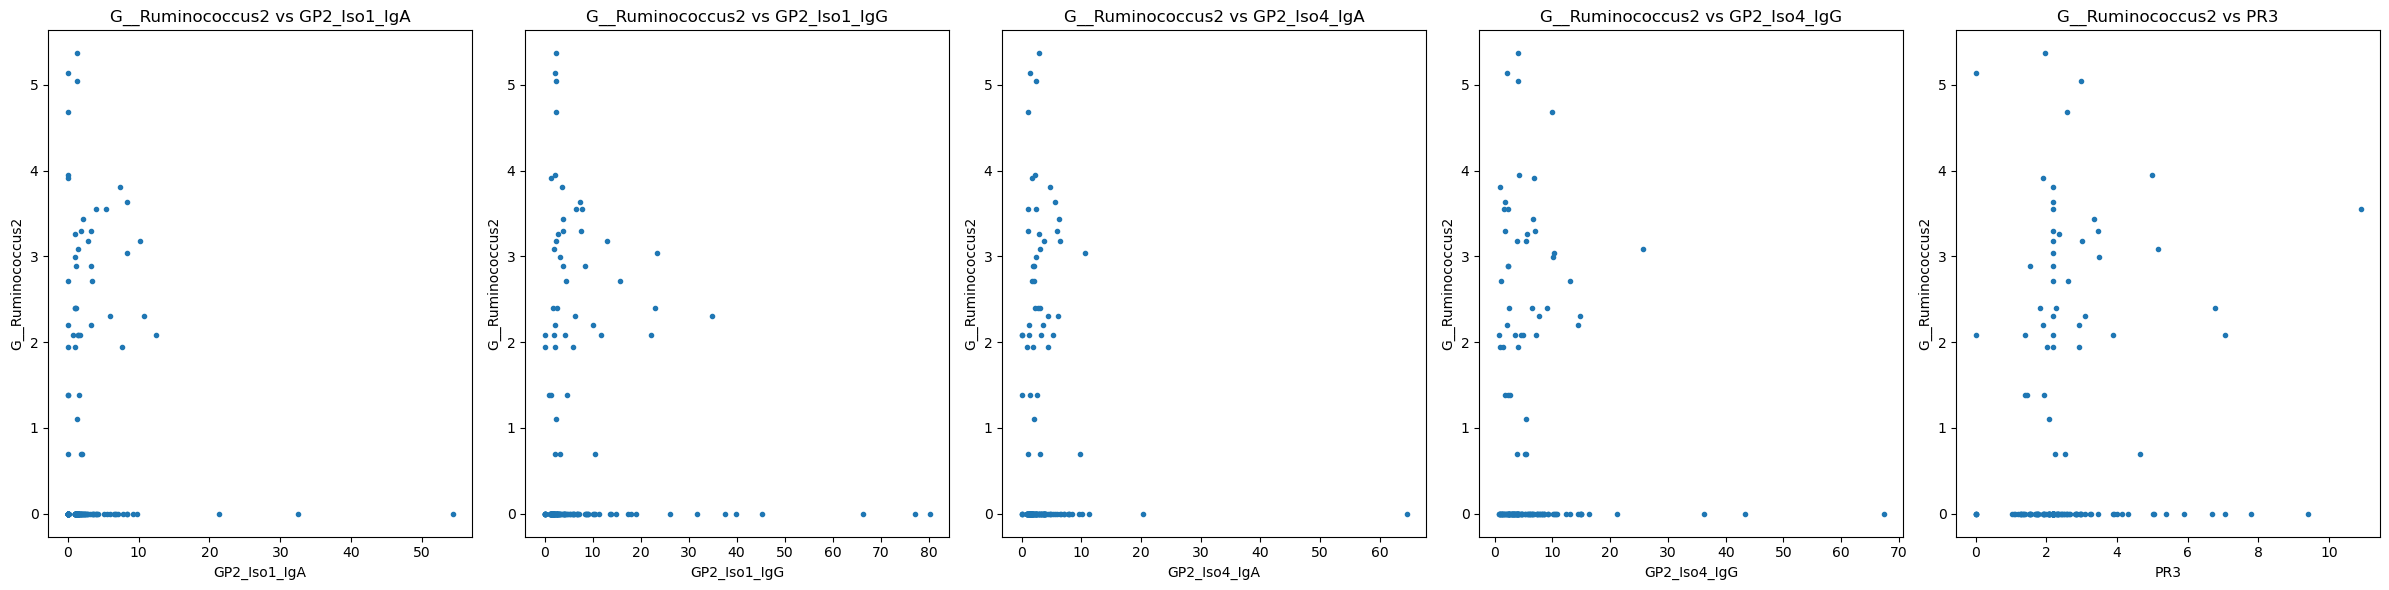

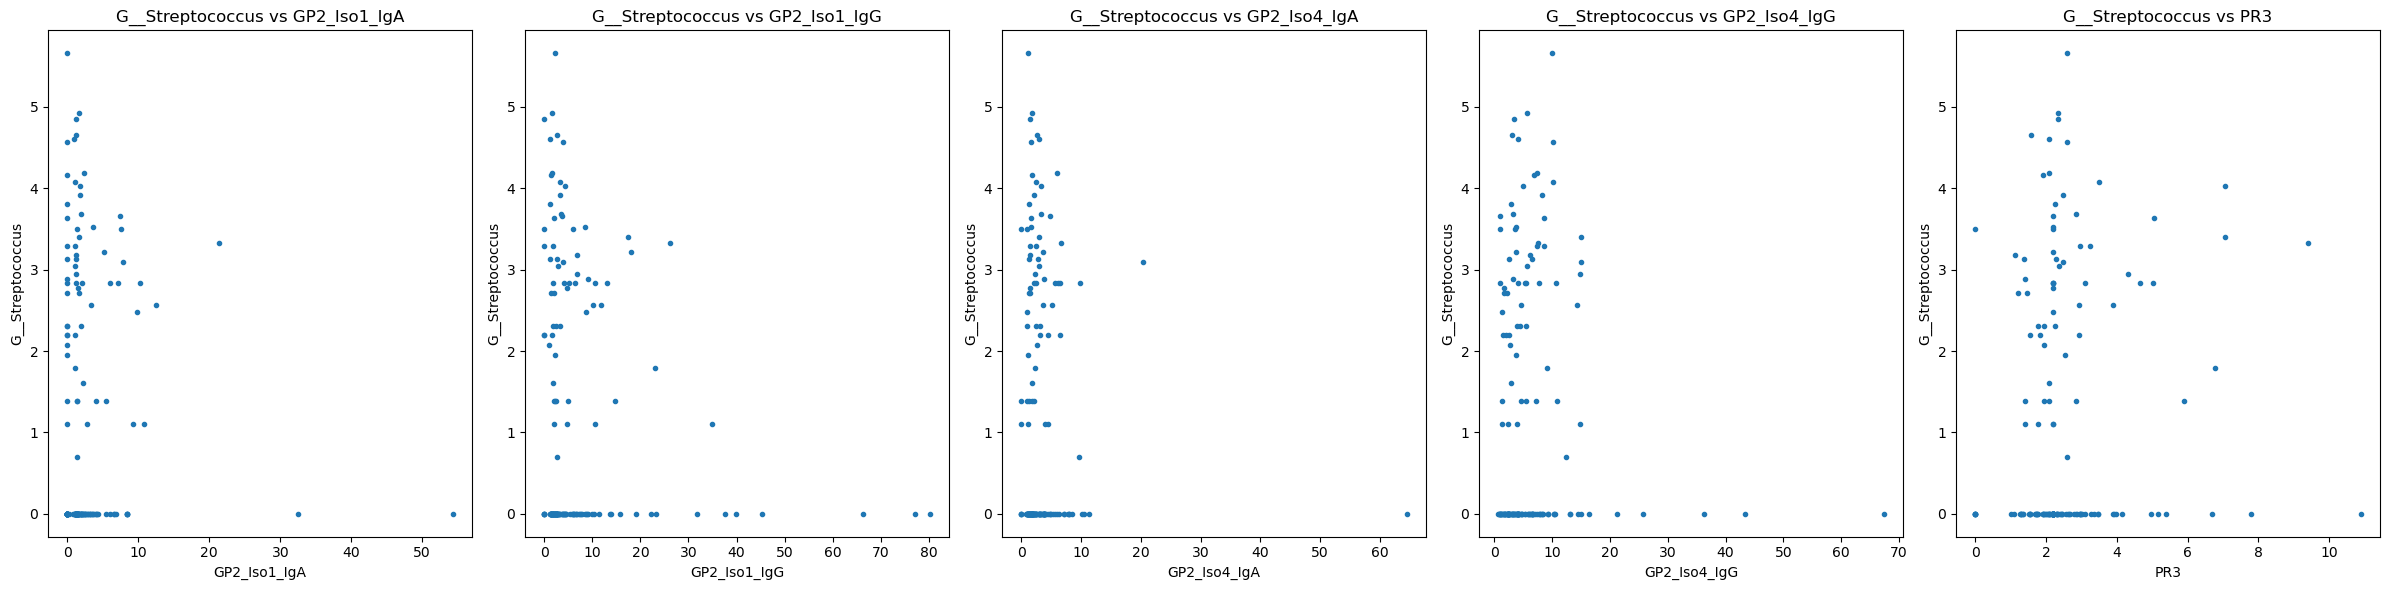

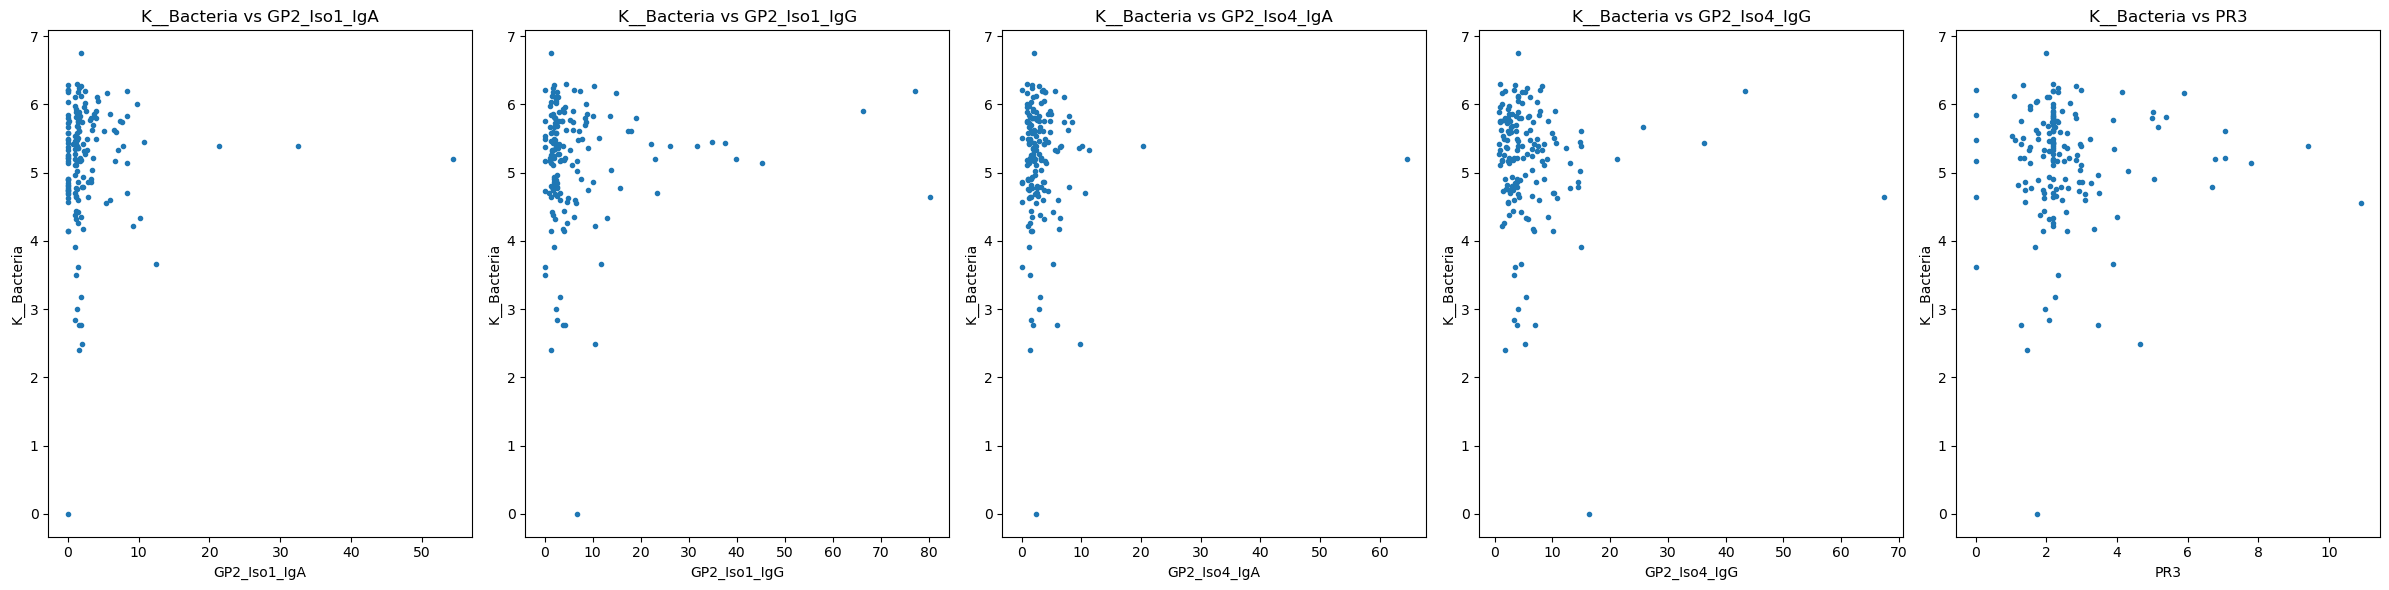

In [170]:
# Iterate over each column in subset_ab_seren
for taxon_column in subset_ab_seren.columns:
    # Set figure size
    plt.figure(figsize=(24, 6))
    
    # Iterate over each column in GP2_data_seren except 'Group'
    for i, column in enumerate(GP2_data_seren.columns.difference(['Group']), start=1):
        # Create a subplot for the current indicator
        plt.subplot(1, len(GP2_data_seren.columns) - 1, i)
        
        # Plot the current taxa against the indicator
        plt.plot(GP2_data_seren[column], subset_ab_seren[taxon_column], 'o', markersize=3)
        
        # Add labels and title
        plt.title(f"{taxon_column} vs {column}")
        plt.xlabel(column)
        plt.ylabel(taxon_column)
    
    # Adjust layout and show plot for each taxa
    plt.tight_layout()
    plt.savefig('./results/seren_assoc_per_taxa.png', dpi=300, bbox_inches='tight')
    plt.show()

## for stool

In [171]:
subset_ab_stool = ab_stool[merged_stool.index]

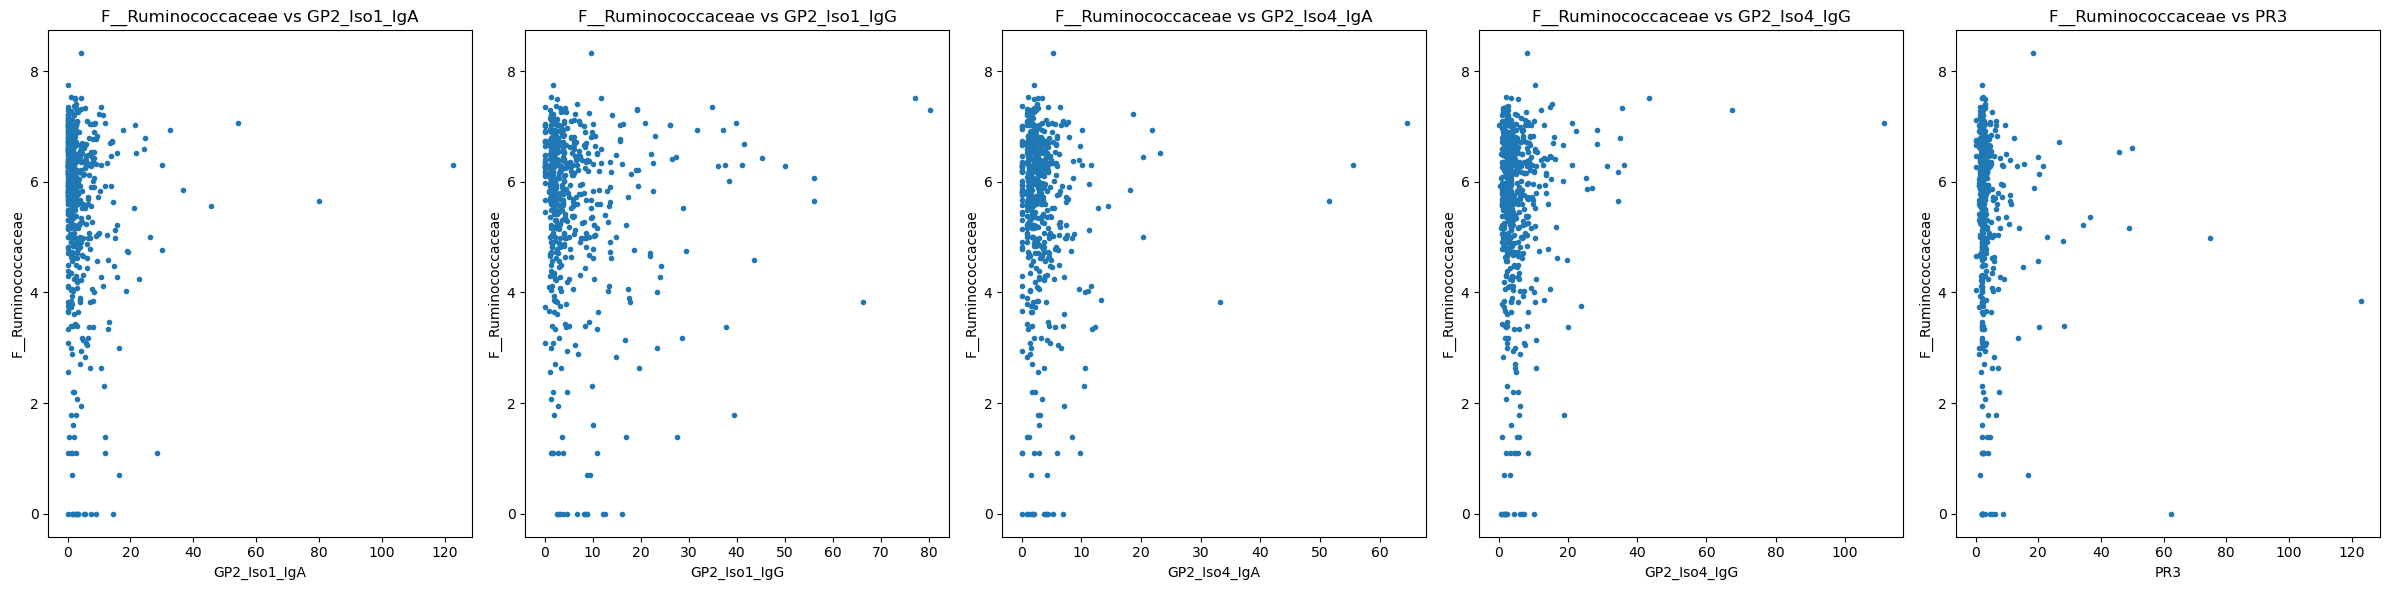

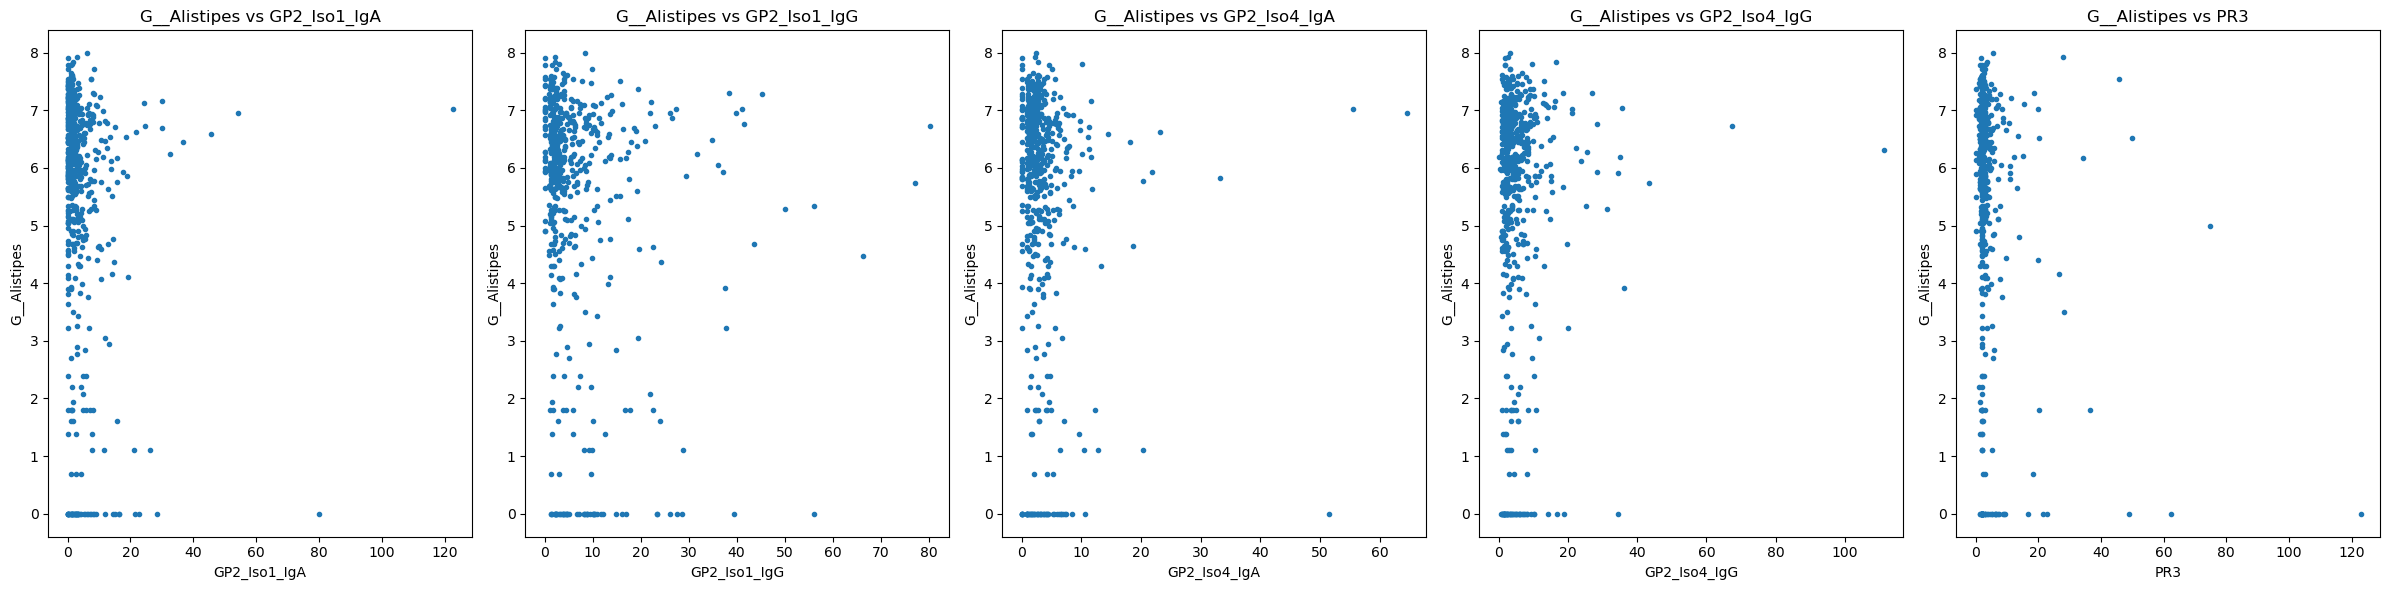

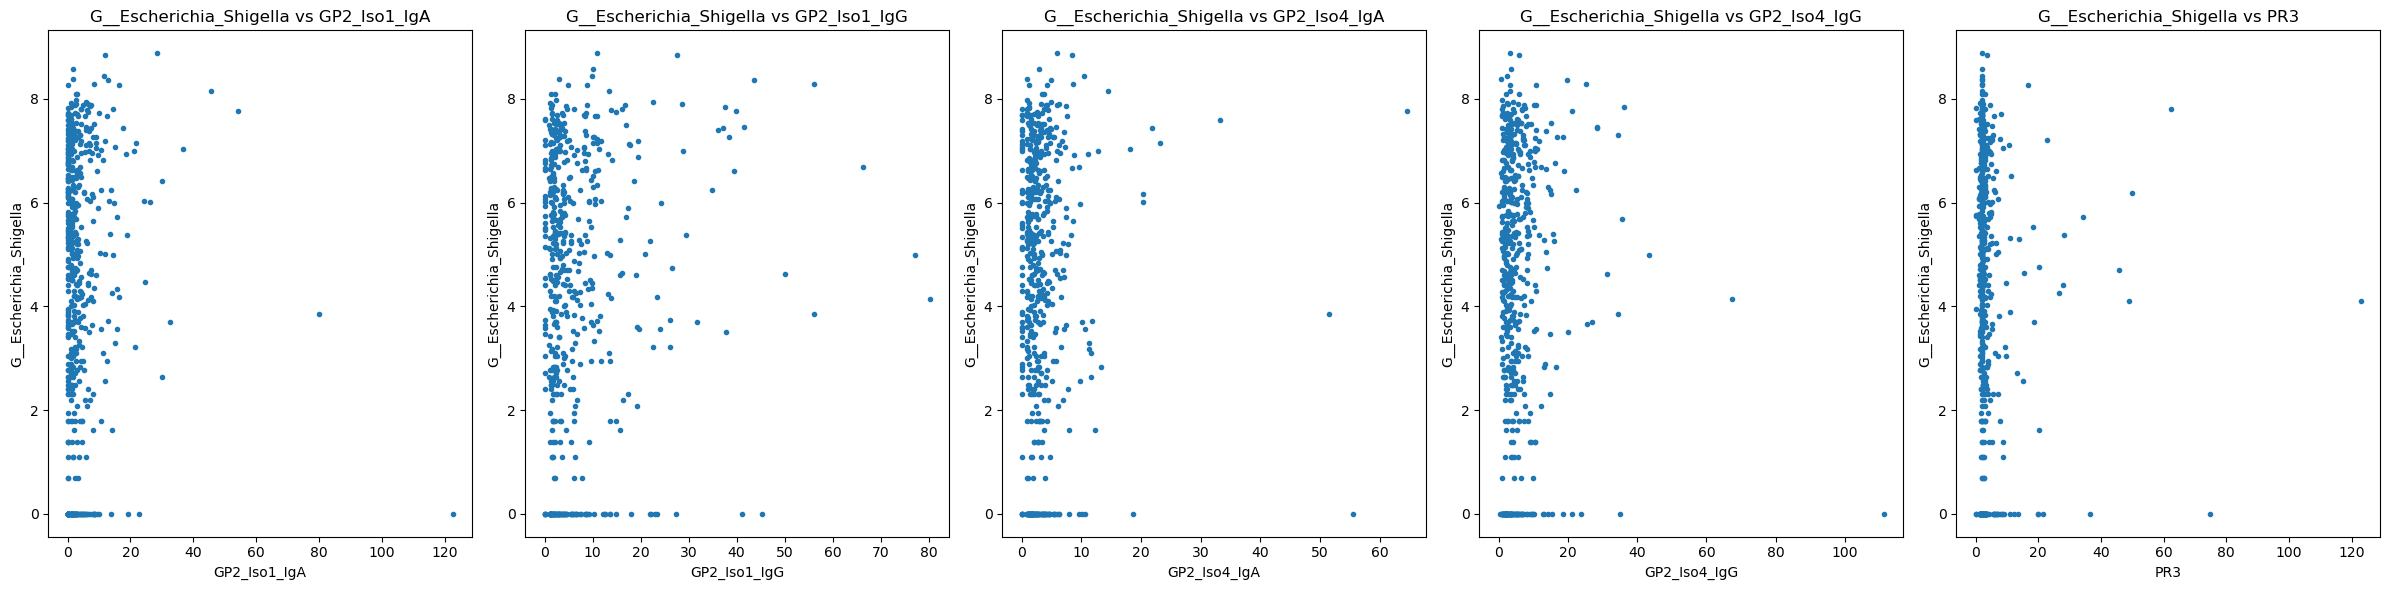

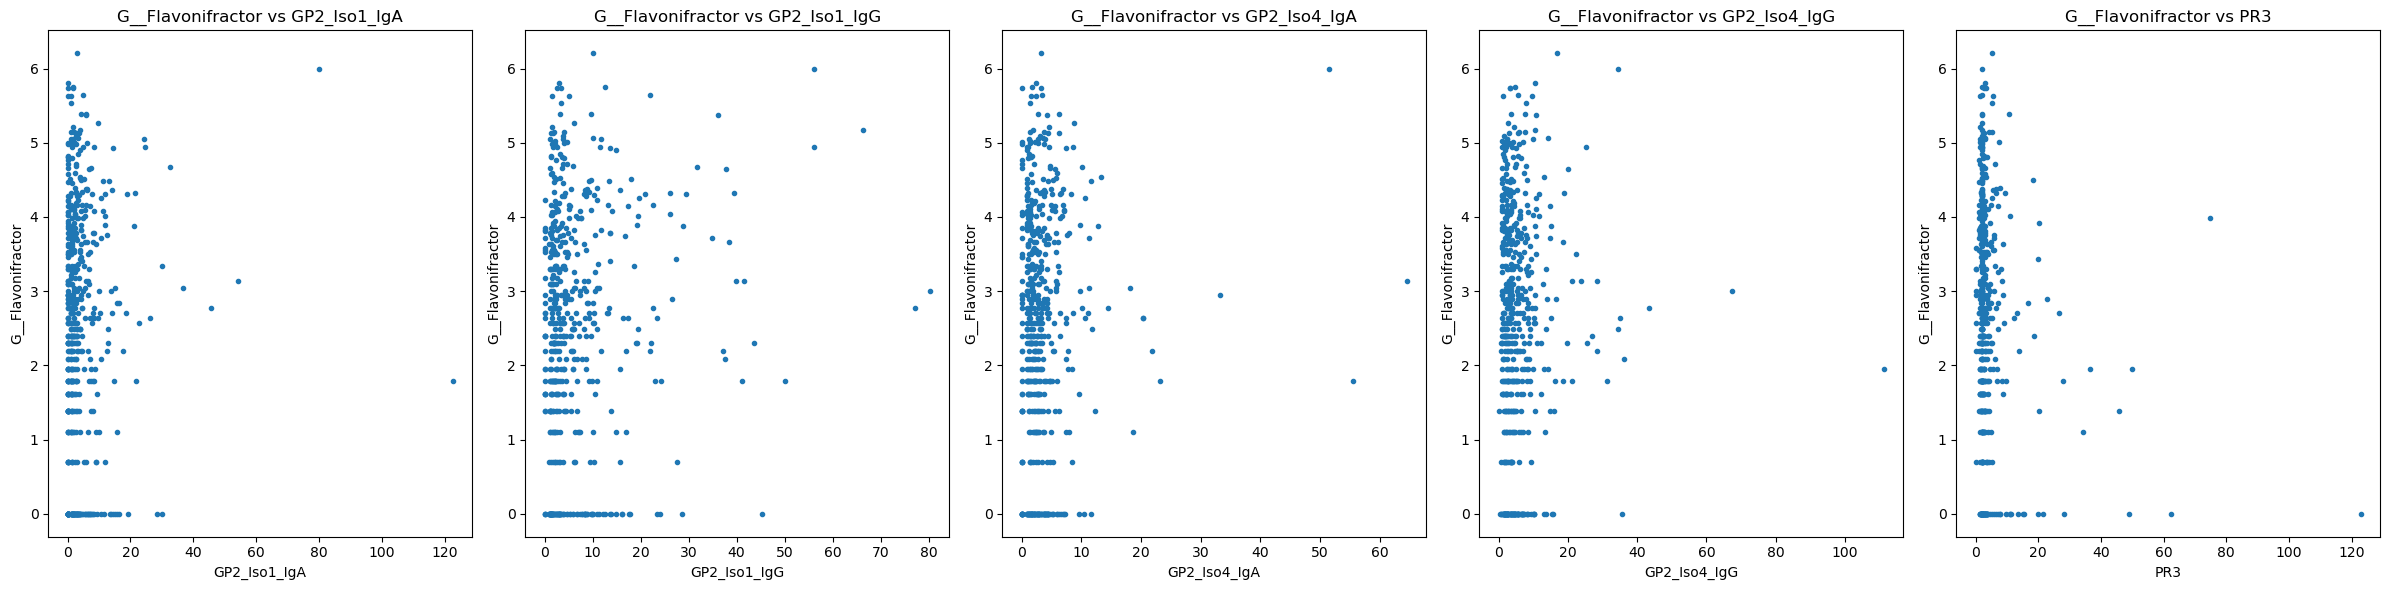

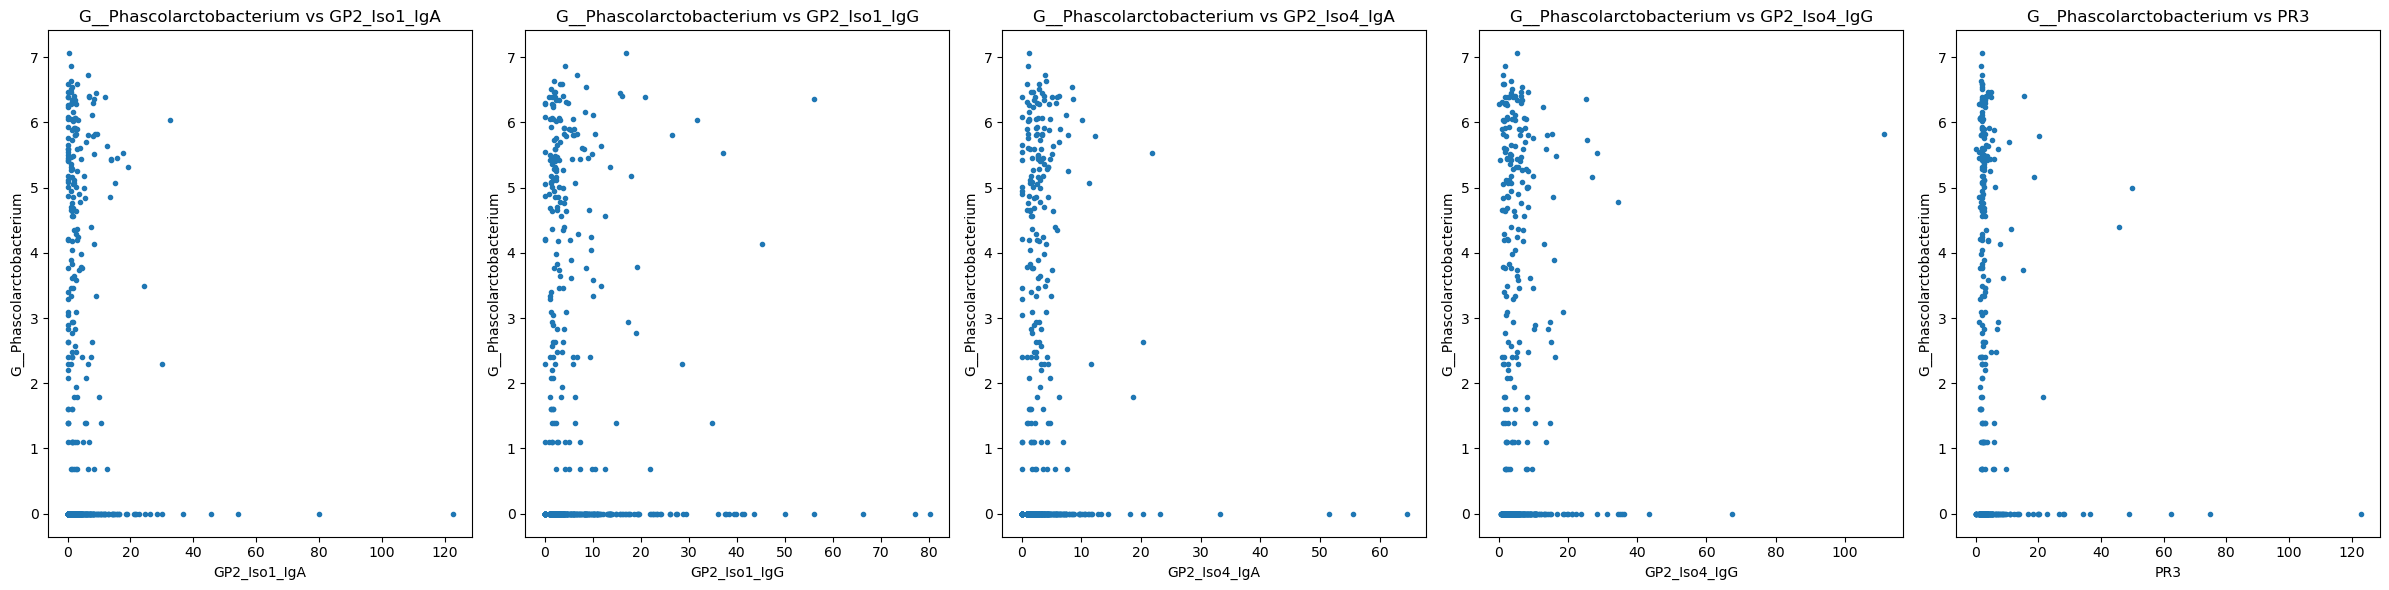

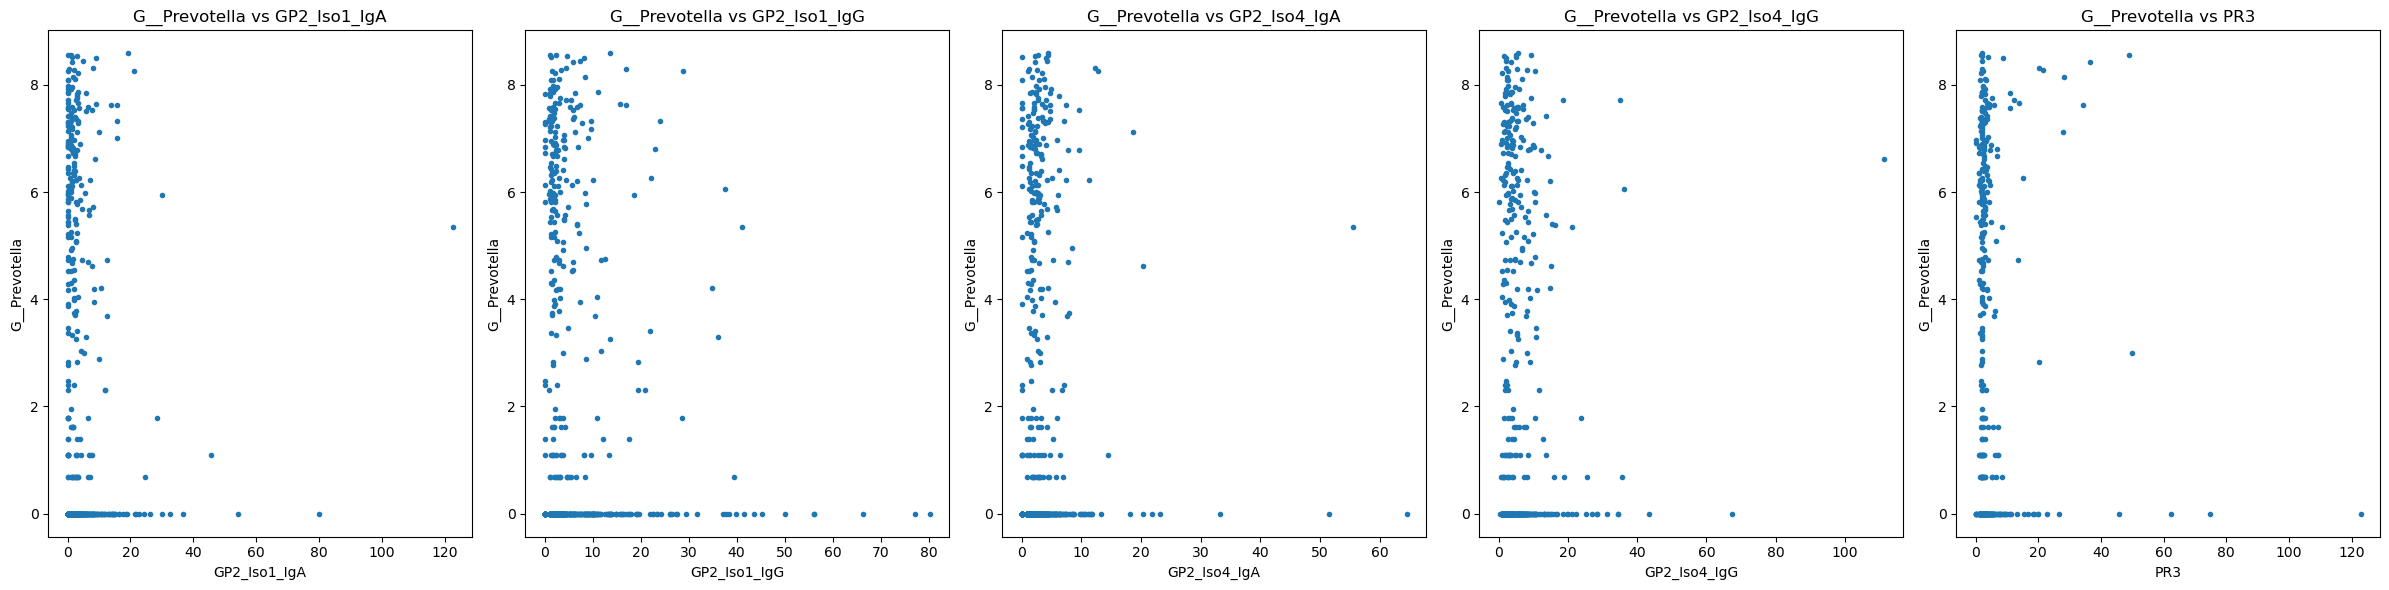

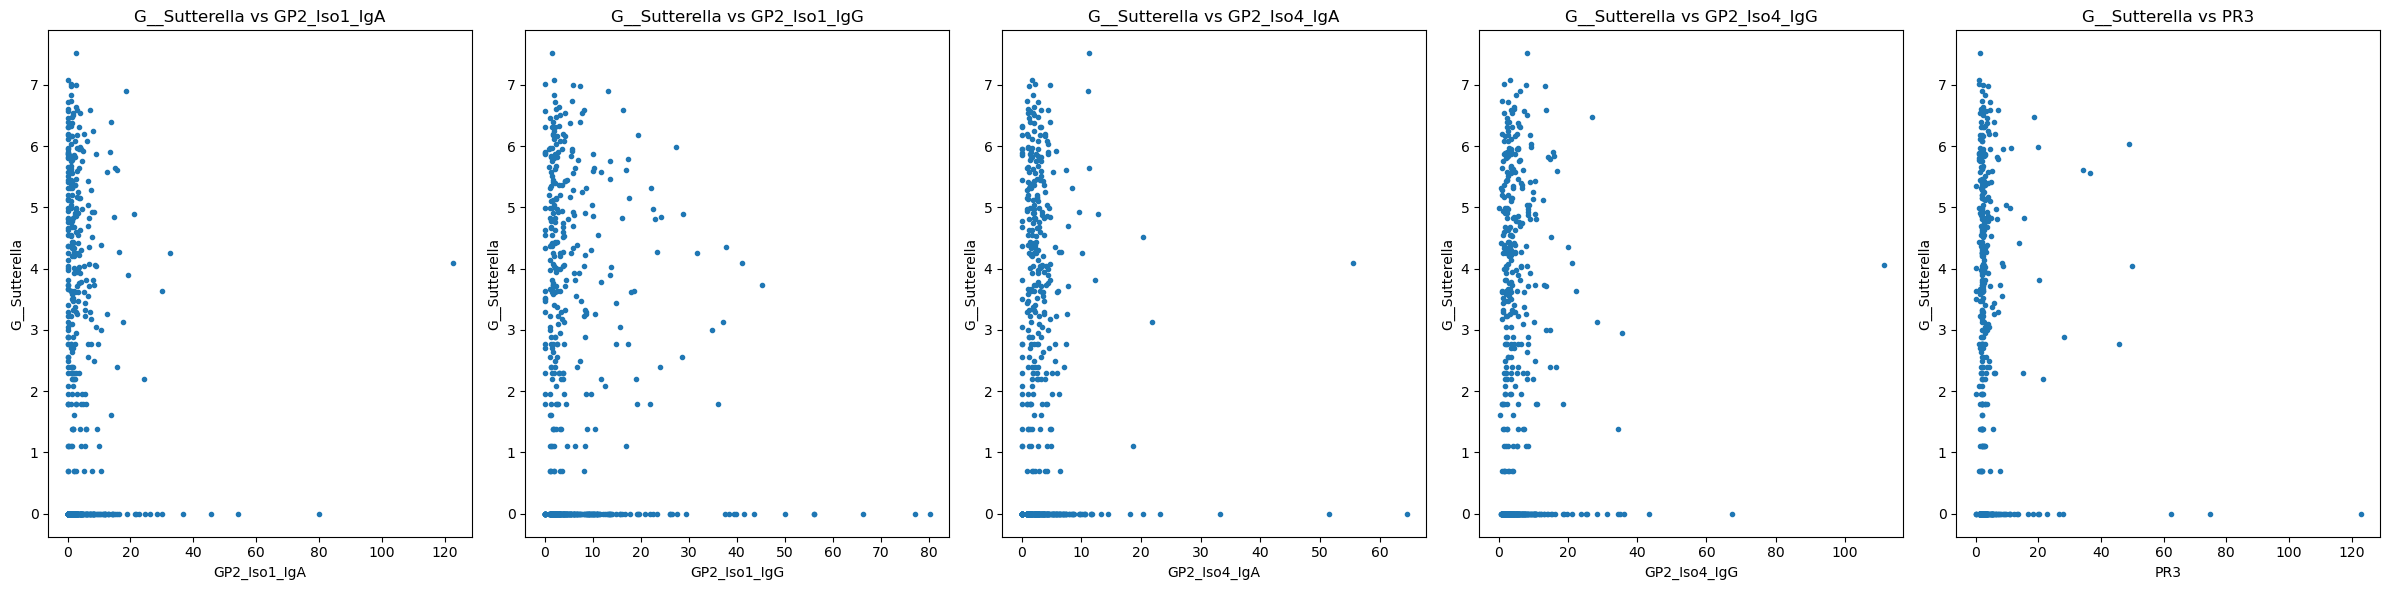

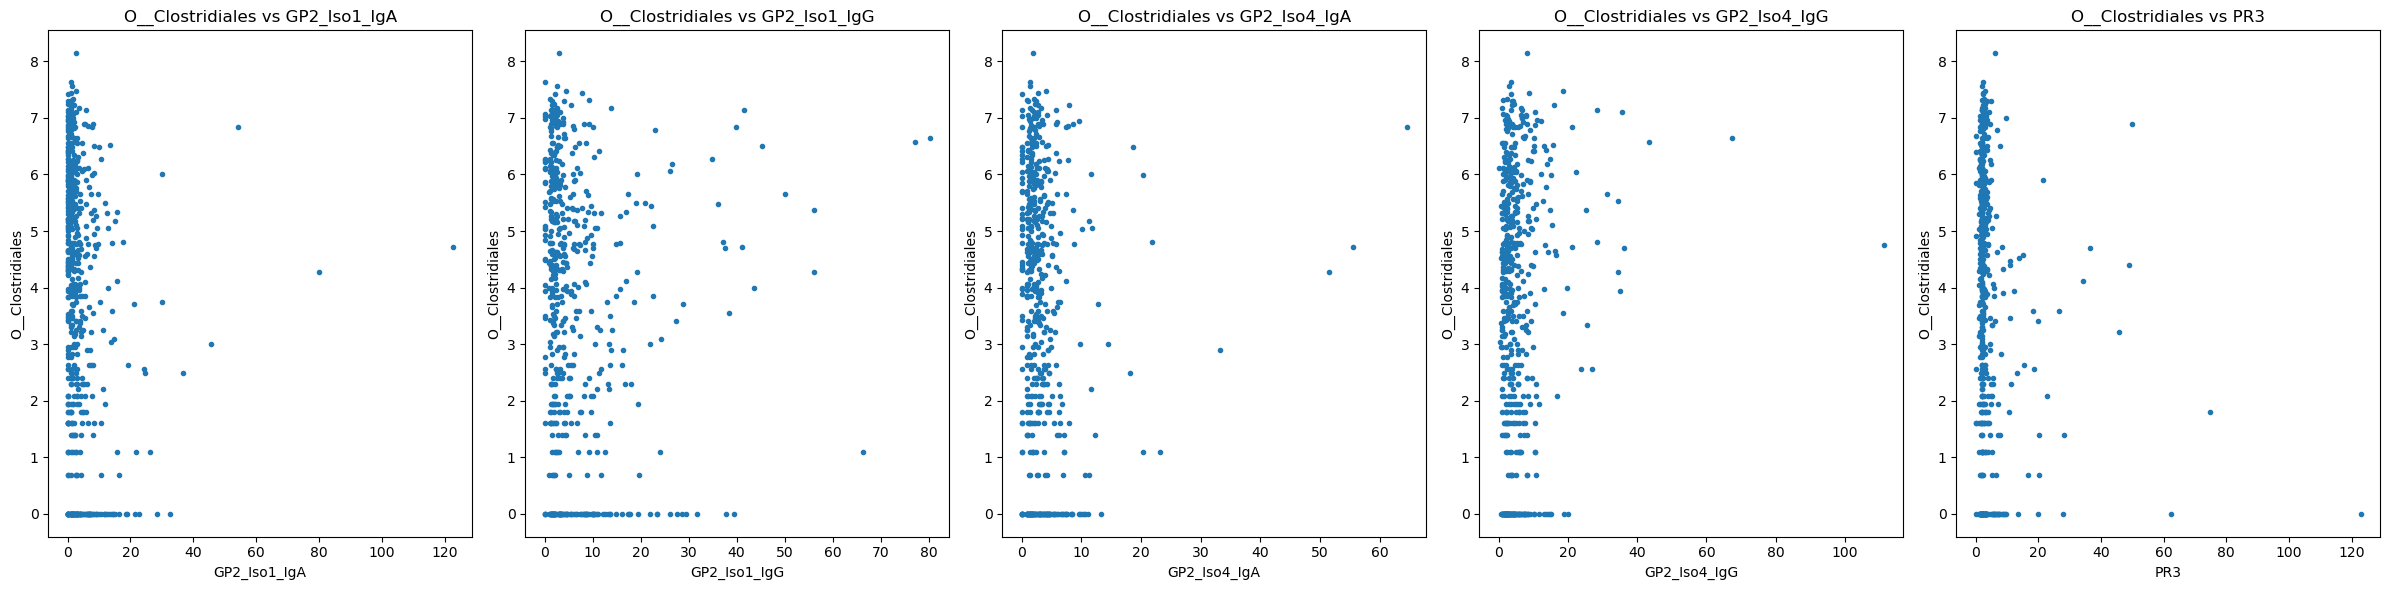

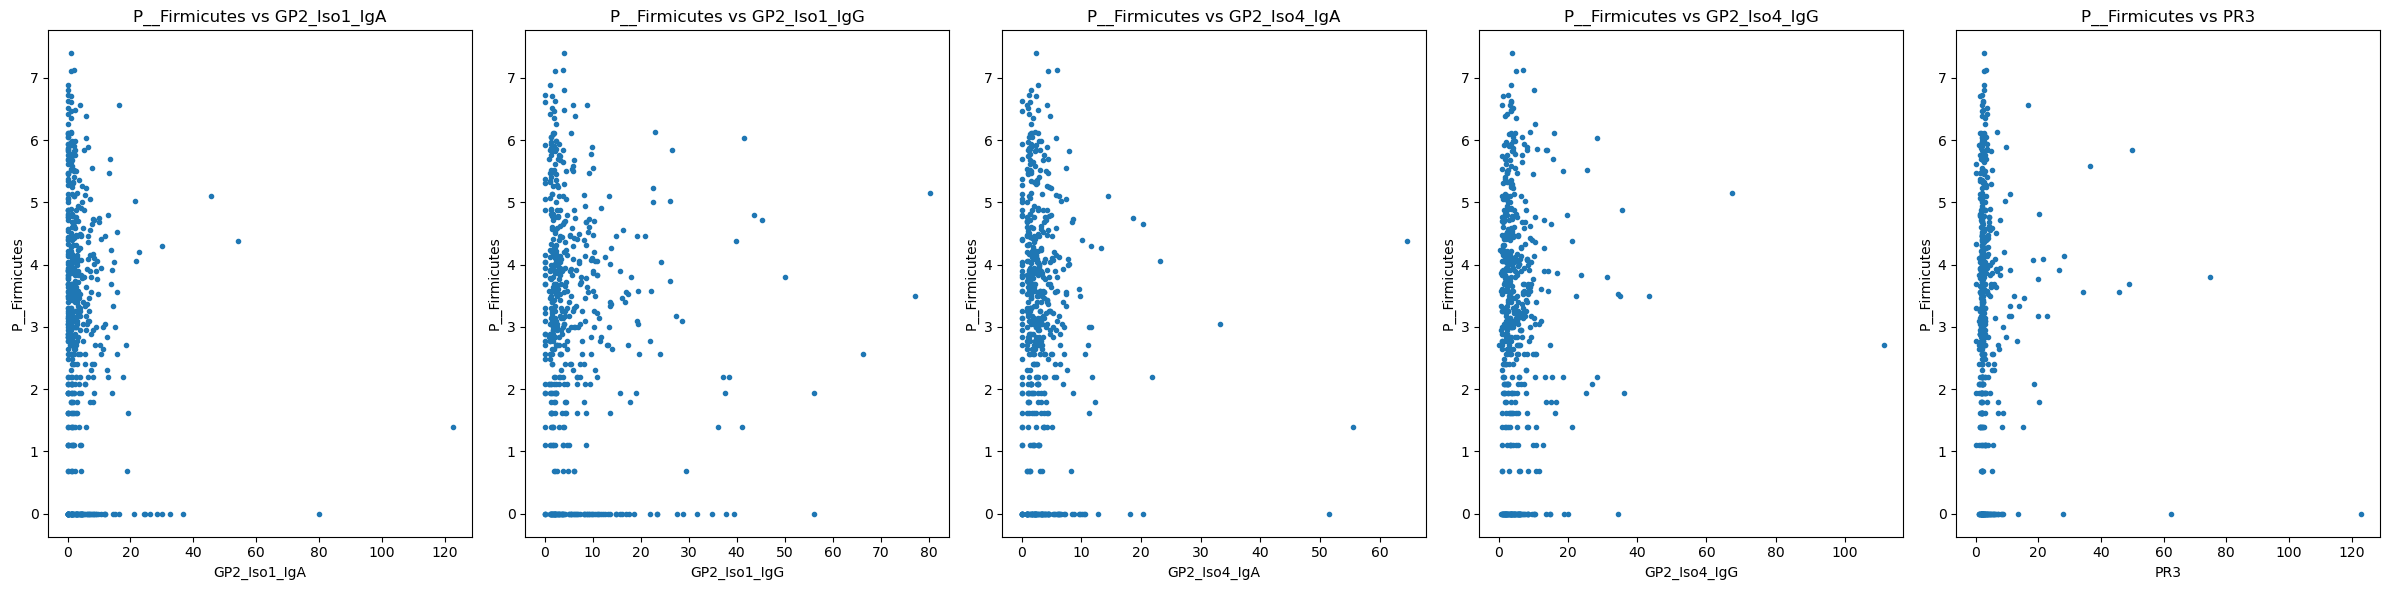

In [175]:
# Iterate over each column in subset_ab_stool
for taxon_column in subset_ab_stool.columns:
    # Set figure size
    plt.figure(figsize=(24, 6))
    
    # Iterate over each column in GP2_data_seren except 'Group'
    for i, column in enumerate(GP2_data_stool.columns.difference(['Group']), start=1):
        # Create a subplot for the current indicator
        plt.subplot(1, len(GP2_data_stool.columns) - 1, i)
        
        # Plot the current taxa against the indicator
        plt.plot(GP2_data_stool[column], subset_ab_stool[taxon_column], 'o', markersize=3)
        
        # Add labels and title
        plt.title(f"{taxon_column} vs {column}")
        plt.xlabel(column)
        plt.ylabel(taxon_column)
        plt.savefig(f'./results/{taxon_column}_GP2_assoc_stool.png', dpi=300, bbox_inches='tight')
    
    # Adjust layout and show plot for each taxa
    plt.tight_layout()
    plt.show()

# GP2 IgA and IgG positivity

In [44]:
GP2_data

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
new_id                                                                      
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0003         9.223         1.569         1.260         0.900   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0022         4.513         8.238         2.030        12.275   
2020-023_PSC_0024        10.978        12.949         5.973        11.817   
...                         ...           ...           ...           ...   
2020-023_SPC_0409         1.350         0.000         7.300         1.660   
2020-023_SPC_0480        10.380         1.950         8.160         2.930   
2020-023_SPC_0515        11.270         1.460        10.310         0.000   
2020-023_SPC_0726         2.600         1.470         4.800         3.970   
2020-023_SPC_0741         1.270         0.000         6.790         1.720   

                     PR3   Group  
new_id                            
2020-023_PSC_0001   2.20     PSC  
2020-023_PSC_0003   2.20     PSC  
2020-023_PSC_0010   2.20     PSC  
2020-023_PSC_0022  20.40     PSC  
2020-023_PSC_0024   2.20     PSC  
...                  ...     ...  
2020-023_SPC_0409   1.71  BSPSPC  
2020-023_SPC_0480   2.85  BSPSPC  
2020-023_SPC_0515   1.35  BSPSPC  
2020-023_SPC_0726   2.33  BSPSPC  
2020-023_SPC_0741   1.91  BSPSPC  

[784 rows x 6 columns]

In [45]:
# add new columns with the cut-offs for positivity
GP2_data['aGP2_IgA1'] = np.where(GP2_data['GP2_Iso1_IgA'] > 7, 1, 0)

In [46]:
GP2_data['aGP2_IgA4'] = np.where(GP2_data['GP2_Iso4_IgA'] > 9, 1, 0)

In [47]:
GP2_data['aGP2_IgG1'] = np.where(GP2_data['GP2_Iso1_IgG'] > 33, 1, 0)

In [48]:
GP2_data['aGP2_IgG4'] = np.where(GP2_data['GP2_Iso4_IgG'] > 23, 1, 0)

In [49]:
GP2_data['PR3_pos'] = np.where(GP2_data['PR3'] > 13, 1, 0)

In [50]:
GP2_data['aGP2_IgA'] = np.where((GP2_data['aGP2_IgA1'] == 1) | (GP2_data['aGP2_IgA4'] == 1), 1, 0)

In [51]:
GP2_data['aGP2_IgG'] = np.where((GP2_data['aGP2_IgG1'] == 1) | (GP2_data['aGP2_IgG4'] == 1), 1, 0)

In [53]:
GP2_data['double_pos'] = np.where((GP2_data['aGP2_IgA'] + GP2_data['aGP2_IgG'] + GP2_data['PR3_pos']) >= 2, 1, 0)

In [54]:
GP2_data['Group'] = (GP2_data['Group'] == 'BSPSPC').astype(int)

In [55]:
GP2_data

GP2_Iso1_IgG  GP2_Iso1_IgA  GP2_Iso4_IgG  GP2_Iso4_IgA  \
new_id                                                                      
2020-023_PSC_0001        13.565         8.394         6.012         7.953   
2020-023_PSC_0003         9.223         1.569         1.260         0.900   
2020-023_PSC_0010         2.960         1.600         0.749         0.915   
2020-023_PSC_0022         4.513         8.238         2.030        12.275   
2020-023_PSC_0024        10.978        12.949         5.973        11.817   
...                         ...           ...           ...           ...   
2020-023_SPC_0409         1.350         0.000         7.300         1.660   
2020-023_SPC_0480        10.380         1.950         8.160         2.930   
2020-023_SPC_0515        11.270         1.460        10.310         0.000   
2020-023_SPC_0726         2.600         1.470         4.800         3.970   
2020-023_SPC_0741         1.270         0.000         6.790         1.720   

                     PR3  Group  aGP2_IgA1  aGP2_IgA4  aGP2_IgG1  aGP2_IgG4  \
new_id                                                                        
2020-023_PSC_0001   2.20      0          1          0          0          0   
2020-023_PSC_0003   2.20      0          0          0          0          0   
2020-023_PSC_0010   2.20      0          0          0          0          0   
2020-023_PSC_0022  20.40      0          1          1          0          0   
2020-023_PSC_0024   2.20      0          1          1          0          0   
...                  ...    ...        ...        ...        ...        ...   
2020-023_SPC_0409   1.71      1          0          0          0          0   
2020-023_SPC_0480   2.85      1          0          0          0          0   
2020-023_SPC_0515   1.35      1          0          0          0          0   
2020-023_SPC_0726   2.33      1          0          0          0          0   
2020-023_SPC_0741   1.91      1          0          0          0          0   

                   PR3_pos  aGP2_IgA  aGP2_IgG  double_pos  
new_id                                                      
2020-023_PSC_0001        0         1         0           0  
2020-023_PSC_0003        0         0         0           0  
2020-023_PSC_0010        0         0         0           0  
2020-023_PSC_0022        1         1         0           1  
2020-023_PSC_0024        0         1         0           0  
...                    ...       ...       ...         ...  
2020-023_SPC_0409        0         0         0           0  
2020-023_SPC_0480        0         0         0           0  
2020-023_SPC_0515        0         0         0           0  
2020-023_SPC_0726        0         0         0           0  
2020-023_SPC_0741        0         0         0           0  

[784 rows x 14 columns]

In [56]:
GP2_data.to_csv('./results/GP2_data_positivity.csv', index = True)

# Select best predictors among positivity

In [57]:
np.random.seed(42)

In [58]:
# Define the features and target variable
X = GP2_data[['aGP2_IgA1', 'aGP2_IgA4', 'aGP2_IgG1', 'aGP2_IgG4', 'PR3_pos', 'aGP2_IgA', 'aGP2_IgG', 'double_pos']]
y = GP2_data['Group']

# Initialize SelectKBest with f_classif scoring
selector = SelectKBest(score_func=f_classif, k='all')

# Fit the selector to the data
selector.fit(X, y)

# Get the scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame to store the results
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores, 'P-Value': p_values})

# Sort the features by their scores in descending order
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

In [59]:
feature_scores

Feature     Score   P-Value
0   aGP2_IgA1  8.325290  0.004017
5    aGP2_IgA  6.890330  0.008836
4     PR3_pos  3.567518  0.059290
6    aGP2_IgG  1.977944  0.160004
7  double_pos  1.758549  0.185193
2   aGP2_IgG1  1.325282  0.249998
3   aGP2_IgG4  1.182471  0.277189
1   aGP2_IgA4  0.759218  0.383841

In [60]:
feature_scores.to_csv('./results/predictors_scores.csv', index = False)

# Select best predictors among bacteria

## for seren

In [172]:
# Prepare your data
X = ab_seren  # Features (taxa abundances)
y = GP2_data_seren['Group']  # Target variable (disease status)

In [173]:
# Define a range of values for k (number of features)
k_values = range(1, 75)  # For example, from 1 to 10

# Initialize lists to store the mean performance scores for each value of k
mean_accuracy_scores = []
mean_f1_scores = []

# Loop over each value of k
for k in k_values:
    # Apply SelectKBest with f_classif scoring
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    
    # Perform cross-validation and evaluate the model
    model = LogisticRegression()
    accuracy_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(model, X_selected, y, cv=5, scoring='f1')
    
    # Calculate the mean performance scores for each metric
    mean_accuracy = accuracy_scores.mean()
    mean_f1 = f1_scores.mean()
    
    # Append the mean scores to the lists
    mean_accuracy_scores.append(mean_accuracy)
    mean_f1_scores.append(mean_f1)

# Find the value of k with the best performance
best_k_accuracy = k_values[mean_accuracy_scores.index(max(mean_accuracy_scores))]
best_k_f1 = k_values[mean_f1_scores.index(max(mean_f1_scores))]

In [56]:
best_k_accuracy

19

In [57]:
best_k_f1

19

In [67]:
# Apply SelectKBest with f_classif scoring
selector = SelectKBest(score_func=f_classif, k=19)  # Select top 19 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_seren = X.columns[selected_feature_indices]

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Selected features:", selected_features)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Selected features: Index(['F__Cryptomonadaceae', 'F__Porphyromonadaceae', 'F__Ruminococcaceae',
       'G__Alistipes', 'G__Bacillus', 'G__Bacteroides', 'G__Blautia',
       'G__Escherichia_Shigella', 'G__Flavobacterium', 'G__Fluviicola',
       'G__Limnohabitans', 'G__Massilia', 'G__Microbacterium',
       'G__Odoribacter', 'G__Polynucleobacter', 'G__Pseudarcicella',
       'O__Bacteroidales', 'P__Parcubacteria', 'P__Proteobacteria'],
      dtype='object')


## for stool

In [61]:
# Prepare your data
X = ab_stool  # Features (taxa abundances)
y = GP2_data_stool['Group']  # Target variable (disease status)

In [85]:
np.random.seed(42)
# Define a range of values for k (number of features)
k_values = range(1, 75)  # For example, from 1 to 10

# Initialize lists to store the mean performance scores for each value of k
mean_accuracy_scores = []
mean_f1_scores = []

# Loop over each value of k
for k in k_values:
    # Apply SelectKBest with f_classif scoring
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X, y)
    
    # Perform cross-validation and evaluate the model
    model = LogisticRegression()
    accuracy_scores = cross_val_score(model, X_selected, y, cv=5, scoring='accuracy')
    f1_scores = cross_val_score(model, X_selected, y, cv=5, scoring='f1')
    
    # Calculate the mean performance scores for each metric
    mean_accuracy = accuracy_scores.mean()
    mean_f1 = f1_scores.mean()
    
    # Append the mean scores to the lists
    mean_accuracy_scores.append(mean_accuracy)
    mean_f1_scores.append(mean_f1)

# Find the value of k with the best performance
best_k_accuracy = k_values[mean_accuracy_scores.index(max(mean_accuracy_scores))]
best_k_f1 = k_values[mean_f1_scores.index(max(mean_f1_scores))]

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__


/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__


/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__


/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-202

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-202

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-202

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-202

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-202

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/envs/qiime2-amplicon-2

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/c

In [86]:
best_k_accuracy

8

In [87]:
best_k_f1

1

In [127]:
np.random.seed(42)
# Apply SelectKBest with f_classif scoring
selector = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features_stool = X.columns[selected_feature_indices]

/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 4 45] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/opt/conda/envs/qiime2-amplicon-2023.9/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [128]:
selected_features_stool

Index(['F__Coriobacteriaceae', 'G__Escherichia_Shigella', 'G__Flavonifractor',
       'G__Streptococcus', 'K__Bacteria', 'O__Clostridiales', 'P__Firmicutes',
       'P__Proteobacteria'],
      dtype='object')

# Intersect best predictors taxa with diff abundances result

In [110]:
#load results of differential abundance comparison
res_prim_stool = pd.read_csv( "./results/2020-023_res_prim_stool.csv", index_col=0)
res_prim_seren = pd.read_csv( "./results/2020-023_res_prim_seren.csv", index_col=0)

In [111]:
res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')

/tmp/ipykernel_491/301798902.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_stool['taxon']= res_prim_stool['taxon'].str.replace('.', '_')
/tmp/ipykernel_491/301798902.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  res_prim_seren['taxon']= res_prim_seren['taxon'].str.replace('.', '_')


In [112]:
#filter diff abund results
res_prim_seren_filt = res_prim_seren[(res_prim_seren['passed_ss_GroupPSC'] == True) & (res_prim_seren['q_GroupPSC'] < 0.1)]
res_prim_stool_filt = res_prim_stool[(res_prim_stool['passed_ss_GroupPSC'] == True) & (res_prim_stool['q_GroupPSC'] < 0.1)]

In [69]:
res_prim_seren_filt

taxon  lfc_(Intercept)  lfc_GroupPSC  se_(Intercept)  \
3      F__Cryptomonadaceae        -1.149031      1.546408             NaN   
4    F__Enterobacteriaceae         0.559654     -0.499901             NaN   
5   F__Erysipelotrichaceae        -0.633999      1.014818             NaN   
8       F__Ruminococcaceae         0.385406     -0.608060             NaN   
9             G__Alistipes         0.012755     -0.832957             NaN   
10         G__Anaerostipes        -0.256189      0.736013             NaN   
11             G__Bacillus        -2.167774      2.724516             NaN   
13          G__Barnesiella         0.408025     -0.427581             NaN   
15       G__Butyricicoccus         0.638680     -0.639426             NaN   
17     G__Clostridium_XlVa         0.546697     -0.882877             NaN   
19          G__Coprococcus         0.613551     -0.776315             NaN   
25       G__Flavobacterium        -2.300711      2.864714             NaN   
26     G__Fusicatenibacter         0.806189     -0.882191             NaN   
28        G__Limnohabitans        -0.903782      1.263989             NaN   
29             G__Massilia        -0.464719      0.856865             NaN   
35       G__Pseudarcicella        -1.222976      1.661051             NaN   
38        G__Ruminococcus2         0.899441     -0.778378             NaN   
39        G__Streptococcus         0.836182     -0.608809             NaN   
41             K__Bacteria        -1.269809      1.697157             NaN   
42        O__Bacteroidales        -0.015012     -1.499677             NaN   
46       P__Proteobacteria        -0.532720      0.874898             NaN   

    se_GroupPSC  W_(Intercept)  W_GroupPSC  p_(Intercept)    p_GroupPSC  \
3      0.130133            NaN   11.883315              1  5.462419e-20   
4      0.120436            NaN   -4.150754              1  4.175158e-04   
5      0.134051            NaN    7.570409              1  3.766817e-07   
8      0.204825            NaN   -2.968680              1  4.059424e-03   
9      0.153806            NaN   -5.415622              1  3.124346e-06   
10     0.115626            NaN    6.365448              1  6.885061e-07   
11     0.250165            NaN   10.890895              1  8.737129e-19   
13     0.108392            NaN   -3.944782              1  1.297234e-03   
15     0.107929            NaN   -5.924498              1  1.315944e-05   
17     0.105233            NaN   -8.389730              1  4.770164e-07   
19     0.124910            NaN   -6.215013              1  1.202950e-06   
25     0.171725            NaN   16.681956              1  1.077240e-33   
26     0.119261            NaN   -7.397137              1  2.113318e-07   
28     0.125203            NaN   10.095513              1  1.661168e-17   
29     0.169005            NaN    5.070065              1  2.182607e-06   
35     0.146518            NaN   11.336878              1  1.297190e-18   
38     0.131544            NaN   -5.917229              1  4.823829e-07   
39     0.124403            NaN   -4.893835              1  8.240382e-06   
41     0.198973            NaN    8.529573              1  1.288362e-14   
42     0.175377            NaN   -8.551171              1  1.532911e-09   
46     0.182057            NaN    4.805632              1  4.783684e-06   

    q_(Intercept)    q_GroupPSC  diff_(Intercept)  diff_GroupPSC  \
3               1  2.458089e-18             False           True   
4               1  1.043789e-02             False           True   
5               1  1.393722e-05             False           True   
8               1  7.712906e-02             False          False   
9               1  9.685472e-05             False           True   
10              1  2.340921e-05             False           True   
11              1  3.844337e-17             False           True   
13              1  2.853915e-02             False           True   
15              1  3.684644e-04             False           Tru

In [75]:
#find intersection between predictors and diff abundances taxa
common_taxa_seren = set(res_prim_seren_filt['taxon']).intersection(selected_features_seren)

NameError: name 'selected_features_seren' is not defined

In [81]:
common_taxa_seren

{'F__Cryptomonadaceae',
 'F__Ruminococcaceae',
 'G__Alistipes',
 'G__Bacillus',
 'G__Flavobacterium',
 'G__Limnohabitans',
 'G__Massilia',
 'G__Pseudarcicella',
 'O__Bacteroidales',
 'P__Proteobacteria'}

In [129]:
common_taxa_stool = set(res_prim_stool_filt['taxon']).intersection(selected_features_stool)

In [114]:
res_prim_stool_filt['taxon']

7        F__Porphyromonadaceae
8           F__Ruminococcaceae
11                G__Alistipes
33     G__Escherichia_Shigella
35           G__Flavonifractor
41              G__Oxalobacter
45    G__Phascolarctobacterium
46               G__Prevotella
56               G__Sutterella
60            O__Clostridiales
61               P__Firmicutes
Name: taxon, dtype: object

In [130]:
common_taxa_stool

{'G__Escherichia_Shigella',
 'G__Flavonifractor',
 'O__Clostridiales',
 'P__Firmicutes'}

# Correlation between best indicators and taxa

## for seren

In [32]:
GP2_data_seren = GP2_data.loc[ab_seren.index]

NameError: name 'ab_seren' is not defined

In [176]:
corr_df_seren = pd.concat([GP2_data_seren[['aGP2_IgA1', 'aGP2_IgA']], ab_seren[common_taxa_seren]], axis=1)

/tmp/ipykernel_491/1939683771.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_df_seren = pd.concat([GP2_data_seren[['aGP2_IgA1', 'aGP2_IgA', 'double_pos']], ab_seren[common_taxa_seren]], axis=1)


In [177]:
corr_df_seren

aGP2_IgA1  aGP2_IgA  double_pos  G__Flavobacterium  \
2020-023_PSC_0001          1         1           1           5.783825   
2020-023_PSC_0006          0         0           0           6.192362   
2020-023_PSC_0007          0         0           0           5.384495   
2020-023_PSC_0010          0         0           0           6.437752   
2020-023_PSC_0015          0         0           0           5.123964   
...                      ...       ...         ...                ...   
2020-023_SPC_0409          0         0           0           3.951244   
2020-023_SPC_0480          0         0           0           0.000000   
2020-023_SPC_0515          0         0           0           4.317488   
2020-023_SPC_0726          0         0           0           0.000000   
2020-023_SPC_0741          0         0           0           3.583519   

                   P__Proteobacteria  F__Cryptomonadaceae  O__Bacteroidales  \
2020-023_PSC_0001           4.317488             0.000000          0.000000   
2020-023_PSC_0006           3.332205             3.332205          0.000000   
2020-023_PSC_0007           2.397895             2.197225          0.000000   
2020-023_PSC_0010           0.000000             4.663439          0.000000   
2020-023_PSC_0015           3.401197             0.000000          0.000000   
...                              ...                  ...               ...   
2020-023_SPC_0409           0.000000             0.000000          5.673323   
2020-023_SPC_0480           5.468060             0.000000          0.000000   
2020-023_SPC_0515           4.983607             0.000000          5.093750   
2020-023_SPC_0726           0.000000             0.000000          0.000000   
2020-023_SPC_0741           0.000000             0.000000          2.772589   

                   F__Ruminococcaceae  G__Bacillus  G__Alistipes  \
2020-023_PSC_0001            4.204693     3.555348      0.000000   
2020-023_PSC_0006            0.000000     4.595120      0.000000   
2020-023_PSC_0007            0.693147     6.541030      0.000000   
2020-023_PSC_0010            0.000000     0.000000      0.000000   
2020-023_PSC_0015            0.000000     6.642487      0.000000   
...                               ...          ...           ...   
2020-023_SPC_0409            0.000000     0.000000      6.552508   
2020-023_SPC_0480            0.000000     2.772589      0.000000   
2020-023_SPC_0515            0.000000     1.098612      4.976734   
2020-023_SPC_0726            0.000000     0.000000      0.000000   
2020-023_SPC_0741            5.963579     0.000000      6.226537   

                   G__Limnohabitans  G__Massilia  G__Pseudarcicella  
2020-023_PSC_0001          3.761200     0.000000           0.000000  
2020-023_PSC_0006          2.639057     4.127134           3.806662  
2020-023_PSC_0007          3.496508     5.645447           1.945910  
2020-023_PSC_0010          5.690359     4.584967           4.158883  
2020-023_PSC_0015          4.543295     5.545177           1.098612  
...                             ...          ...                ...  
2020-023_SPC_0409          0.000000     0.000000           0.000000  
2020-023_SPC_0480          5.459586     0.000000           0.000000  
2020-023_SPC_0515          4.234107     0.000000           0.000000  
2020-023_SPC_0726          0.000000     0.000000           0.000000  
2020-023_SPC_0741          0.000000     0.000000           0.000000  

[161 rows x 13 columns]

In [178]:
# Calculate the correlation matrix
correlation_matrix_seren = corr_df_seren.corr()

In [179]:
correlation_matrix_seren

aGP2_IgA1  aGP2_IgA  double_pos  G__Flavobacterium  \
aGP2_IgA1             1.000000  0.908120    0.908120           0.151441   
aGP2_IgA              0.908120  1.000000    1.000000           0.127242   
double_pos            0.908120  1.000000    1.000000           0.127242   
G__Flavobacterium     0.151441  0.127242    0.127242           1.000000   
P__Proteobacteria     0.131298  0.094776    0.094776           0.482499   
F__Cryptomonadaceae   0.021962  0.011221    0.011221           0.582236   
O__Bacteroidales     -0.114946 -0.123933   -0.123933          -0.403196   
F__Ruminococcaceae   -0.003255  0.049089    0.049089          -0.413552   
G__Bacillus          -0.046365 -0.065225   -0.065225           0.378425   
G__Alistipes         -0.083806 -0.000657   -0.000657          -0.428121   
G__Limnohabitans      0.149606  0.093395    0.093395           0.758546   
G__Massilia          -0.008585 -0.025465   -0.025465           0.421552   
G__Pseudarcicella     0.106410  0.085617    0.085617           0.571201   

                     P__Proteobacteria  F__Cryptomonadaceae  O__Bacteroidales  \
aGP2_IgA1                     0.131298             0.021962         -0.114946   
aGP2_IgA                      0.094776             0.011221         -0.123933   
double_pos                    0.094776             0.011221         -0.123933   
G__Flavobacterium             0.482499             0.582236         -0.403196   
P__Proteobacteria             1.000000             0.400597         -0.243307   
F__Cryptomonadaceae           0.400597             1.000000         -0.409961   
O__Bacteroidales             -0.243307            -0.409961          1.000000   
F__Ruminococcaceae           -0.250321            -0.354915          0.298904   
G__Bacillus                   0.196870             0.262939         -0.337546   
G__Alistipes                 -0.356604            -0.383137          0.562063   
G__Limnohabitans              0.503581             0.600825         -0.416767   
G__Massilia                   0.166212             0.357791         -0.345849   
G__Pseudarcicella             0.287851             0.527844         -0.335760   

                     F__Ruminococcaceae  G__Bacillus  G__Alistipes  \
aGP2_IgA1                     -0.003255    -0.046365     -0.083806   
aGP2_IgA                       0.049089    -0.065225     -0.000657   
double_pos                     0.049089    -0.065225     -0.000657   
G__Flavobacterium             -0.413552     0.378425     -0.428121   
P__Proteobacteria             -0.250321     0.196870     -0.356604   
F__Cryptomonadaceae           -0.354915     0.262939     -0.383137   
O__Bacteroidales               0.298904    -0.337546      0.562063   
F__Ruminococcaceae             1.000000    -0.300428      0.441152   
G__Bacillus                   -0.300428     1.000000     -0.342594   
G__Alistipes                   0.441152    -0.342594      1.000000   
G__Limnohabitans              -0.448240     0.388112     -0.503978   
G__Massilia                   -0.323343     0.699407     -0.385994   
G__Pseudarcicella             -0.322385     0.303943     -0.420908   

                     G__Limnohabitans  G__Massilia  G__Pseudarcicella  
aGP2_IgA1                    0.149606    -0.008585           0.106410  
aGP2_IgA                     0.093395    -0.025465           0.085617  
double_pos                   0.093395    -0.025465           0.085617  
G__Flavobacterium            0.758546     0.421552           0.571201  
P__Proteobacteria            0.503581     0.166212           0.287851  
F__Cryptomonadaceae          0.600825     0.357791           0.527844  
O__Bacteroidales            -0.416767    -0.345849          -0.335760  
F__Ruminococcaceae          -0.448240    -0.323343          -0.322385  
G__Bacillus                  0.388112     0.699407           0.303943  
G__Alistipes                -0.503978    -0.385994          -0.420908  
G__Limnohabitans             1.000000     0.413454           0

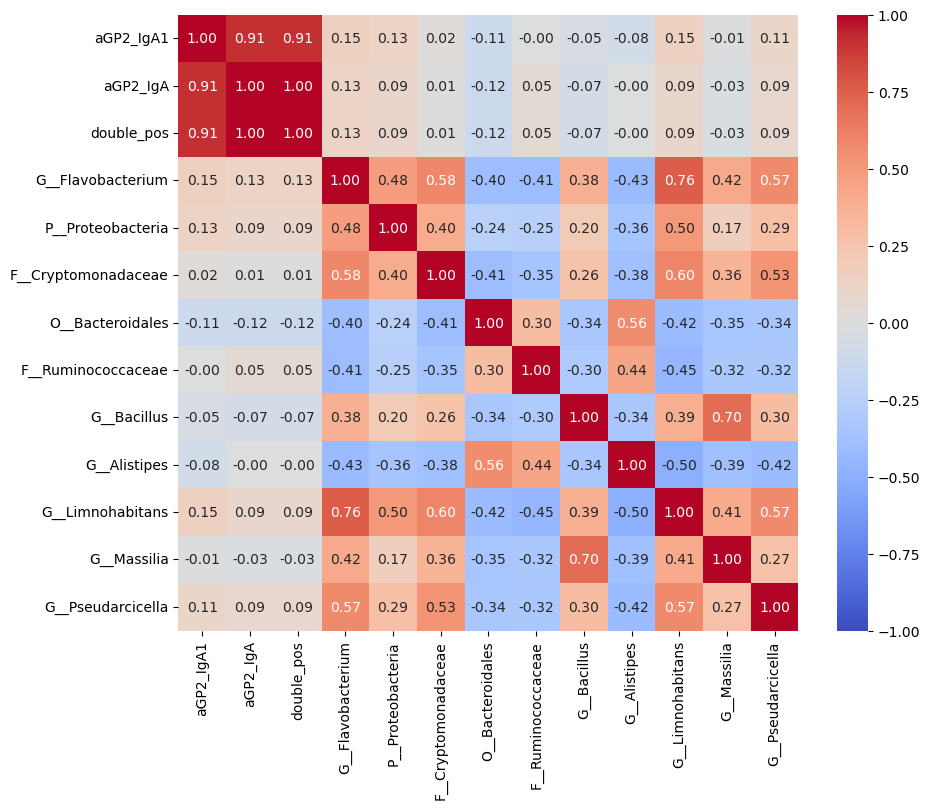

In [180]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix_seren, annot=True, cmap='coolwarm', fmt=".2f", vmax = 1, vmin = -1)
plt.savefig('./results/correlation_matrix_seren.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

## for stool

In [131]:
GP2_data_stool = GP2_data.loc[ab_stool.index]

In [132]:
common_taxa_stool

{'G__Escherichia_Shigella',
 'G__Flavonifractor',
 'O__Clostridiales',
 'P__Firmicutes'}

In [133]:
corr_df_stool = pd.concat([GP2_data_stool[['aGP2_IgA1', 'aGP2_IgA']], ab_stool[common_taxa_stool]], axis=1)

/tmp/ipykernel_491/1363650116.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  corr_df_stool = pd.concat([GP2_data_stool[['aGP2_IgA1', 'aGP2_IgA']], ab_stool[common_taxa_stool]], axis=1)


In [134]:
corr_df_stool

aGP2_IgA1  aGP2_IgA  G__Flavonifractor  \
2020-023_PSC_0001          1         1           3.784190   
2020-023_PSC_0002          1         1           0.000000   
2020-023_PSC_0003          0         0           1.791759   
2020-023_PSC_0005          0         0           1.609438   
2020-023_PSC_0006          0         0           3.688879   
...                      ...       ...                ...   
2020-023_SPC_0189          0         0           2.079442   
2020-023_SPC_0409          0         0           0.000000   
2020-023_SPC_0515          0         0           0.000000   
2020-023_SPC_0726          0         0           0.000000   
2020-023_SPC_0741          0         0           0.000000   

                   G__Escherichia_Shigella  O__Clostridiales  P__Firmicutes  
2020-023_PSC_0001                 0.000000          1.609438       4.007333  
2020-023_PSC_0002                 0.000000          0.000000       0.000000  
2020-023_PSC_0003                 0.000000          7.309881       4.605170  
2020-023_PSC_0005                 5.361292          5.420535       1.945910  
2020-023_PSC_0006                 7.031741          7.571474       0.693147  
...                                    ...               ...            ...  
2020-023_SPC_0189                 6.622736          7.433075       2.772589  
2020-023_SPC_0409                 0.000000          4.997212       5.929589  
2020-023_SPC_0515                 3.526361          6.408529       3.135494  
2020-023_SPC_0726                 2.484907          3.713572       4.094345  
2020-023_SPC_0741                 0.000000          7.135687       6.047372  

[560 rows x 6 columns]

In [135]:
corr_df_stool.columns = corr_df_stool.columns.str.replace('O__Clostridiales', 'O__Clostridiales_G__NA')
corr_df_stool.columns = corr_df_stool.columns.str.replace('P__Firmicutes', 'P__Firmicutes_G__NA')

In [136]:
# Calculate the correlation matrix
correlation_matrix_stool = corr_df_stool.corr()

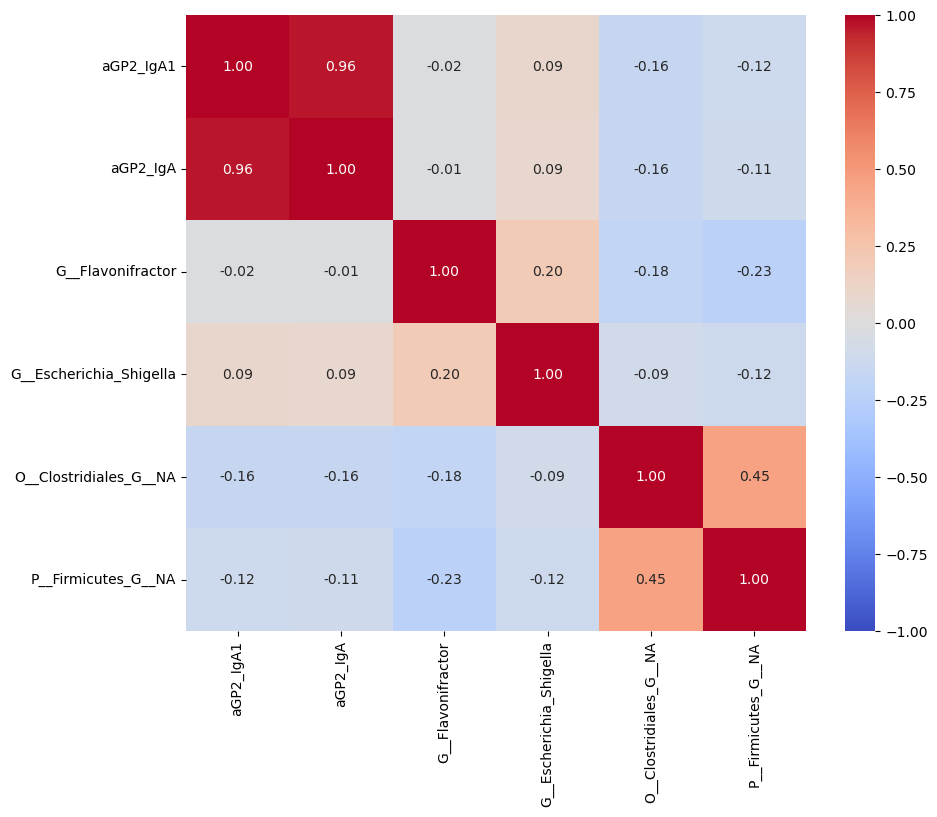

In [137]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix_stool, annot=True, cmap='coolwarm', fmt=".2f", vmax = 1, vmin = -1)
plt.savefig('./results/correlation_matrix_stool.png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

# ROC curves

## for seren

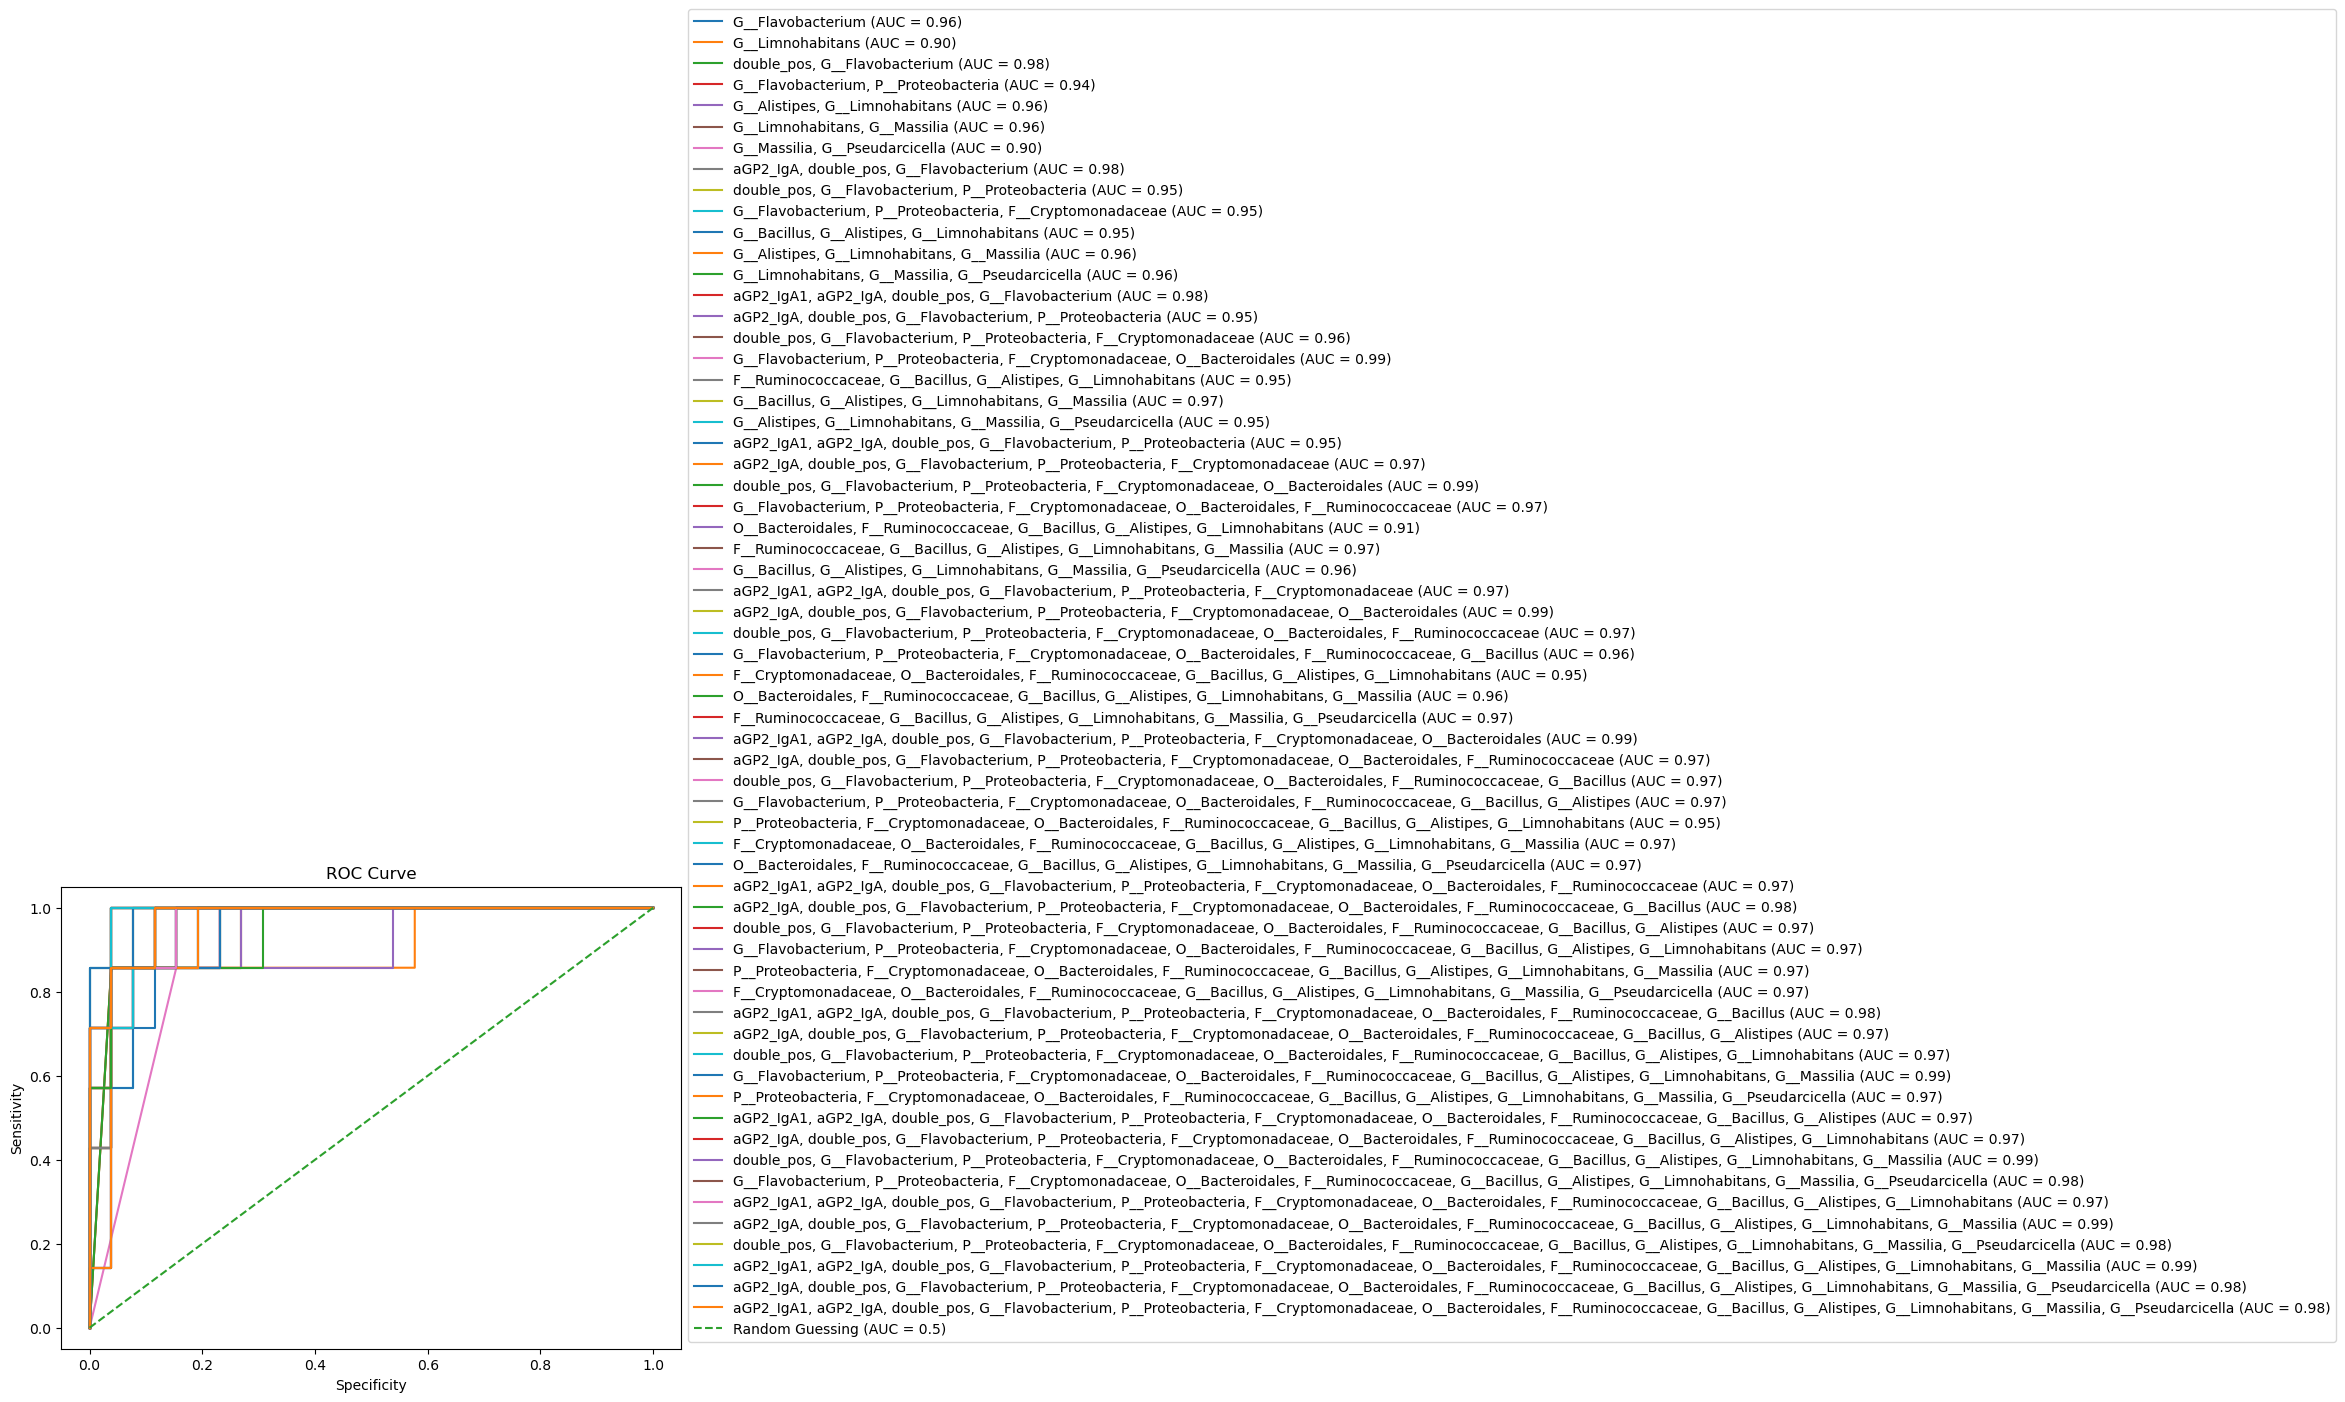

Best combination of predictors: Index(['G__Flavobacterium', 'P__Proteobacteria', 'F__Cryptomonadaceae',
       'O__Bacteroidales'],
      dtype='object')
Best AUC: 0.989010989010989


In [188]:
# Split the data into training and testing sets
predictors = corr_df_seren.columns
X_train, X_test, y_train, y_test = train_test_split(corr_df_seren, GP2_data_seren['Group'], test_size=0.2, random_state=42)

# Train logistic regression models using different combinations of predictors
best_model = None
best_auc = 0
plt.figure(figsize=(8, 6))

# Set a threshold for AUC values
threshold_auc = 0.90

for i in range(1, len(predictors) + 1):
    for j in range(len(predictors) - i + 1):
        subset_predictors = predictors[j:j+i]
        X_train_subset = X_train[subset_predictors]
        X_test_subset = X_test[subset_predictors]
        
        # Train logistic regression model
        model = LogisticRegression()
        model.fit(X_train_subset, y_train)
        
        # Calculate predicted probabilities for the positive class
        y_pred_proba = model.predict_proba(X_test_subset)[:, 1]
        
        # Calculate AUC
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Plot ROC curve only if AUC is above the threshold
        if auc >= threshold_auc:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f"{', '.join(subset_predictors)} (AUC = {auc:.2f})")
        
        # Update best model if current model has higher AUC
        if auc > best_auc:
            best_auc = auc
            best_model = model
            best_subset_predictors = subset_predictors

# Plot ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.savefig('./results/ROC_seren_selected90.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the best combination of predictors and its AUC
print("Best combination of predictors:", best_subset_predictors)
print("Best AUC:", best_auc)

## for stool

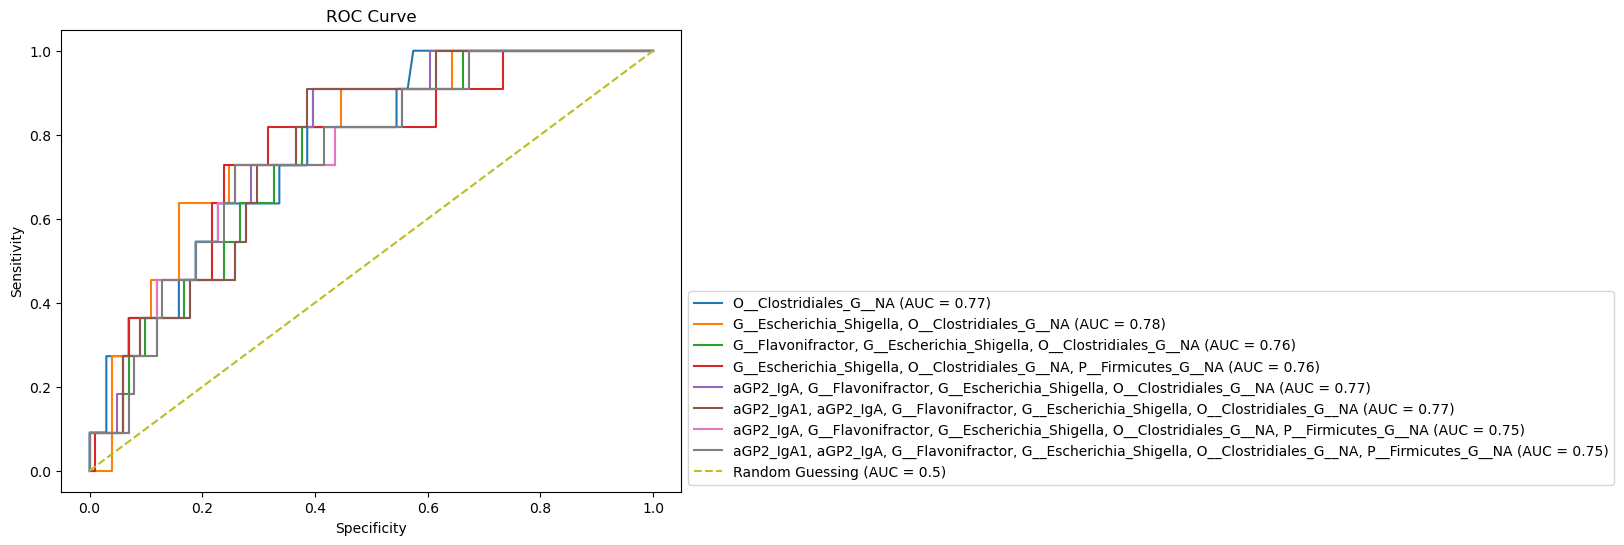

Best combination of predictors: Index(['G__Escherichia_Shigella', 'O__Clostridiales_G__NA'], dtype='object')
Best AUC: 0.783078307830783


In [138]:
np.random.seed(42)
# Split the data into training and testing sets
predictors = corr_df_stool.columns
X_train, X_test, y_train, y_test = train_test_split(corr_df_stool, GP2_data_stool['Group'], test_size=0.2, random_state=42)

# Scale the predictors using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression models using different combinations of predictors
best_model = None
best_auc = 0
plt.figure(figsize=(8, 6))

# Set a threshold for AUC values
threshold_auc = 0.75

for i in range(1, len(predictors) + 1):
    for j in range(len(predictors) - i + 1):
        subset_predictors = predictors[j:j+i]
        X_train_subset = X_train_scaled[:, j:j+i]
        X_test_subset = X_test_scaled[:, j:j+i]
        
        # Train logistic regression model
        model = LogisticRegression()
        model.fit(X_train_subset, y_train)
        
        # Calculate predicted probabilities for the positive class
        y_pred_proba = model.predict_proba(X_test_subset)[:, 1]
        
        # Calculate AUC
        auc = roc_auc_score(y_test, y_pred_proba)
        
        # Plot ROC curve only if AUC is above the threshold
        if auc >= threshold_auc:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f"{', '.join(subset_predictors)} (AUC = {auc:.2f})")
        
        # Update best model if current model has higher AUC
        if auc > best_auc:
            best_auc = auc
            best_model = model
            best_subset_predictors = subset_predictors

# Plot ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing (AUC = 0.5)')
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))
plt.savefig('./results/ROC_stool_selected75.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the best combination of predictors and its AUC
print("Best combination of predictors:", best_subset_predictors)
print("Best AUC:", best_auc)